A faire : 
- parcourir toutes les dates
- cliquer sur un jour 
- cliquer sur un tournoi
- aller dans l'onglet "grille" (s'il y en a) et lire les informations : 
- mettre dans un tableau, pour chaque joueur le nom du tournoi, le classement du joueur dans le tournoi, contre qui il a joué (avec le score) 

sous la forme d'un dictionnaire {'nom du joueur' : untel, 'elo': 2000, 'tournois' : [{'nom' : Tournoi du pin, 'date' : 15/04/2022, 'classement' : 13}, {'nom' : Tournoi du chêne, 'date' : 15/02/2021, 'classement' : 8}] , 'adversaires' : [{'nom' : untel, 'elo' : 1900, 'score' : perdu, 'couleur' : noirs, 'date' : 15/09/2020}, {'nom' : untel, 'elo' : 1500, 'score' : perdu, 'couleur' : noirs, 'tournoi' : Nationale 3, 'date' : 13/08/2021}]}

#indication : =/- : gagné, nul, perdu , 4 : chiffre de l’adversaire, B/N : blancs ou noirs 

In [26]:
import requests

#out = requests.get("http://echecs.asso.fr/FicheTournoi.aspx?Ref=55579")
#out = requests.get("http://echecs.asso.fr/Resultats.aspx?URL=Tournois/Id/55579/55579&Action=Ga")
out = requests.get("http://echecs.asso.fr/Resultats.aspx?URL=Tournois/Id/55605/55605&Action=Berger")
out.headers
print(out.content.decode())



<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Strict//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-strict.dtd">

<html xmlns="http://www.w3.org/1999/xhtml" >
<head id="ctl00_MasterHeader"><meta http-equiv="content-type" content="application/xhtml+xml; charset=utf-8" /><meta name="keywords" /><meta name="description" /><title>
	F&eacute;d&eacute;ration Fran&ccedil;aise des &Eacute;checs
</title><link type="text/css" rel="stylesheet" href="http://fonts.googleapis.com/css?family=Source+Sans+Pro:200,300,400,600" /><link href="http://fonts.googleapis.com/css?family=Oswald:300,400,700" rel="stylesheet" type="text/css" /><link type="text/css" rel="stylesheet" href="ffe.css?version=6" /><link type="text/css" rel="stylesheet" href="old.css?version=1" /><link rel="shortcut icon" type="image/x-icon" href="images/ffe16.ico" />
  <script>
    (function(i,s,o,g,r,a,m){i['GoogleAnalyticsObject']=r;i[r]=i[r]||function(){
    (i[r].q=i[r].q||[]).push(arguments)},i[r].l=1*new Date();a=s.createElement(o)

In [27]:
#RECUPERATION DES DONNES POUR UNE GRILLE BERGER

import requests
from bs4 import BeautifulSoup

def recup_berger(number):#number=numéro d'une grille berger
    link = f"http://echecs.asso.fr/Resultats.aspx?URL=Tournois/Id/{number}/{number}&Action=Berger"
    soup = BeautifulSoup(requests.get(link).text, 'html.parser')
    
    #récupération des joueurs
    j=[]
    for x in soup.find_all('td'):
        if x.has_attr("class") and x['class'][0] == "papi_border_l" :
            j.append(x.string.lower())
    joueur=j[1:]
    
    #récupération des elo
    e=[]
    i=0
    for x in soup.find_all('tr'):
        if x.has_attr("class") and x['class'][0] == "papi_liste_c":
            for k,y in enumerate(x.find_all('td')):
                if (k-3)%15==0 and i<len(joueur)+1:
                    e.append(y.string)
                    i+=1
    elo=dict()
    for i in range(len(joueur)):
        elo[joueur[i]]=e[1:][i]
    
    #récupération des scores relatifs sous forme de dictionnaire
    dic=dict()
    for i in range(len(joueur)):
        p=[]
        for x in soup.find_all('tr'):
            if x.has_attr("class") and x['class'][0] == "papi_liste_c":
                for k,y in enumerate(x.find_all('td')):
                    if (k-4-i)%15==0:
                        p.append(y.string)
        perf_colonne=p[1:len(joueur)+1]
        dic[joueur[i]]=perf_colonne
        #avant on a récupéré tous les modulos 15, ie on a les scores en colonne, on doit les présenter en ligne   
    dictionnaire=dict()
    for i in range(8):
        if len(joueur)>=8:
            dico_joueur=dictionnaire[joueur[i]]= dict()
            for j in range(8):
                if j!=i:
                    dico_joueur[joueur[j]]=dic[joueur[j]][i]
    return(joueur,elo,dictionnaire)       
     

recup_berger(55605)
recup_berger(29018)

#souvent des pb avec la cadence pour les tournois berger

(['manon bednarek',
  'lilia messaoudi',
  'manuela pires',
  'margaux fait',
  'meije vignant',
  'lucie taragnat',
  'oumaima ait saad'],
 {'manon bednarek': '1100\xa0N',
  'lilia messaoudi': '0',
  'manuela pires': '0',
  'margaux fait': '0',
  'meije vignant': '1',
  'lucie taragnat': '1',
  'oumaima ait saad': '0'},
 {})

In [61]:
#checker si la page est américaine 
def american(number):
    link = f"http://echecs.asso.fr/Resultats.aspx?URL=Tournois/Id/{number}/{number}&Action=Ga"
    soup = BeautifulSoup(requests.get(link).text, 'html.parser')
    for x in soup.find_all('span'):
        if x.string == "Désolé, le fichier n'existe pas...":
            print("berger")
            return False
        else :
            print("américain")
            return True 


#pour avoir la date, le nom, la cadence, et les rondes du tournoi
def infos_tournoi(number):  
    infos = dict()
    link_infos = f"http://echecs.asso.fr/FicheTournoi.aspx?Ref={number}"
    soup_infos = BeautifulSoup(requests.get(link_infos).text, 'html.parser')
    for x in soup_infos.find_all('span'):
        if x.has_attr("id") and x['id'] == "ctl00_ContentPlaceHolderMain_LabelDates":
            infos["date"] = x.string   
        if x.has_attr("id") and x['id'] == "ctl00_ContentPlaceHolderMain_LabelNom":
            infos["nom"] = x.string  
        if x.has_attr("id") and x['id'] == "ctl00_ContentPlaceHolderMain_LabelNbrRondes":
            infos["nb_rondes"] = x.string
        if x.has_attr("id") and x['id'] == "ctl00_ContentPlaceHolderMain_LabelCadence":
            infos["cadence"] = x.string 
    return infos



#dans la boucle, si la date c'est demain, on arrête la boucle 

from datetime import datetime

datetime(2021, 3, 14) #année, mois, jour 

months = {"janvier":1, "février":2, "mars":3, "avril":4,
       "mai":5, "juin":6, "juillet":7, "août":8,
       "septembre":9, "octobre":10, "novembre":11, "décembre":12}

def stop_boucle(date): #fonction qui renvoie true si on est après la date d'aujourd'hui
    liste_date = date.strip('-').split(' ')
    if liste_date[0]=='' and liste_date[1]=='-' and liste_date[2]=='':
        return False 
    jour = liste_date[1] #6
    mois = months[liste_date[2]] #7
    année = liste_date[3] #8
   
    jour_now, mois_now, année_now = datetime.today().day, datetime.today().month, datetime.today().year
    if int(année)>int(année_now):
        return True
    elif int(année)==int(année_now):
        if int(mois)>int(mois_now):
            return True
        elif int(mois)==int(mois_now):
            if int(jour)>int(jour_now):
                return True
    return False

def is_in_period(debut, fin, date): #renvoie True quand on est bien dans cette période là
    #debut et fin sont en format datetime
    liste_date = date.strip('-').split(' ')
    if liste_date[0]=='' and liste_date[1]=='-' and liste_date[2]=='':
        return True  
    jour_debut = liste_date[1]
    mois_debut = months[liste_date[2]]
    annee_debut = liste_date[3]
    jour_fin = liste_date[6]
    mois_fin = months[liste_date[7]]
    annee_fin = liste_date[8]
    if int(annee_fin)>int(fin.year) or int(annee_debut)<int(debut.year):
        return False
    elif int(annee_fin)==int(fin.year):
        if int(mois_fin)>int(fin.month):
            return False
        elif int(mois_fin)==int(fin.month):
            if int(jour_fin)>int(fin.day):
                return False
    elif int(année_debut)==int(debut.year):
        if int(mois_debut)<int(debut.month):
            return False
        elif int(mois_debut)==int(debut.month):
            if int(jour_debut)<int(debut.day):
                return False
    return True
        
#print(stop_boucle('mercredi 23 juin 2022 - samedi 8 juillet 2022'))

def date_debut(date): 
    liste_date = date.strip('-').split(' ')
    if liste_date[0]=='' and liste_date[1]=='-' and liste_date[2]=='':
        return None 
    jour_debut = liste_date[1]
    mois_debut = months[liste_date[2]]
    annee_debut = liste_date[3]
    return (jour_debut, mois_debut, liste_date[2], annee_debut)


In [29]:
period(datetime(2022, 6, 22), datetime(2022, 8, 7), 'mercredi 23 juin 2022 - samedi 8 juillet 2022' )

True

In [30]:
#marche à suivre
#faire une boucle sur les numéros de match
#while la date est encore à jour
#tester si la page est américaine ou berger 
#collecter les infos du tournoi et les mettre dans la table tournoi
#récupérer la liste des joueurs
#pour chaque player, tester s'il est déjà dans la base 
#récupérer les matchs et les mettre dans la base de donnée 

In [72]:
import sqlite3

#création de la base de données 
con = sqlite3.connect(":memory:")
con.executescript("""
create table player (id integer not NULL primary key autoincrement, name text not NULL); 
create table tournois (id integer not NULL primary key autoincrement, name text, date text, rondes integer, cadence string);
create table match (id integer primary key autoincrement, tournoi integer, black_player integer, elo_black string, white_player integer, elo_white string, winner integer);""")


#for row in con.execute("select name from player where name = 'philippea marchal'"):
    #print(row)


    
#print(list(con.execute("select name from player where name = 'philippe marchal'")))[0]

#winner : 0 pour les noirs, 3 pour les noirs au temps, 1 pour les blancs, 4 pour les blancs au temps, 2 pour ex aequo

In [32]:
#savoir lire ce genre de grille américaine
link = "http://echecs.asso.fr/Resultats.aspx?URL=Tournois/Id/30005/30005&Action=Ga"
soup = BeautifulSoup(requests.get(link).text, 'html.parser')


print(soup)



<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Strict//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-strict.dtd">

<html xmlns="http://www.w3.org/1999/xhtml">
<head id="ctl00_MasterHeader"><meta content="application/xhtml+xml; charset=utf-8" http-equiv="content-type"/><meta name="keywords"/><meta name="description"/><title>
	Fédération Française des Échecs
</title><link href="http://fonts.googleapis.com/css?family=Source+Sans+Pro:200,300,400,600" rel="stylesheet" type="text/css"/><link href="http://fonts.googleapis.com/css?family=Oswald:300,400,700" rel="stylesheet" type="text/css"/><link href="ffe.css?version=6" rel="stylesheet" type="text/css"/><link href="old.css?version=1" rel="stylesheet" type="text/css"/><link href="images/ffe16.ico" rel="shortcut icon" type="image/x-icon"/>
<script>
    (function(i,s,o,g,r,a,m){i['GoogleAnalyticsObject']=r;i[r]=i[r]||function(){
    (i[r].q=i[r].q||[]).push(arguments)},i[r].l=1*new Date();a=s.createElement(o),
    m=s.getElementsByTagName(o)[0];a.a

In [33]:
def players_ga(number):
    indicateur = 0
    res = []
    link = f"http://echecs.asso.fr/Resultats.aspx?URL=Tournois/Id/{number}/{number}&Action=Ga"
    soup = BeautifulSoup(requests.get(link).text, 'html.parser')
    for x in soup.find_all('div'):
        if x.has_attr("class") and x['class'][0] == "papi_joueur_box":
            res.append(x.b.string)
    indicateur = 1
    if res == []:
        for x in soup.find_all('td') :
            if x.has_attr("class") and x["class"][0]=="papi_l":
                res.append(x.string)
                
        res = res[1:]
        indicateur = 2
              
    return (res, indicateur)


def match_ga(number):
    symboles = ['+', '-', "=", ">", "<"]
    players, ind = players_ga(number)
    link = f"http://echecs.asso.fr/Resultats.aspx?URL=Tournois/Id/{number}/{number}&Action=Ga"
    soup = BeautifulSoup(requests.get(link).text, 'html.parser')
    
    res = []

    if ind== 1:
        adversaires = []
        elos = []
        couleurs = []
        résultats = []
        for x in soup.find_all('div'):
            if x.has_attr("class") and x.has_attr("align") and x['align'] == "center":
                joueur = []
                elo = []
                couleur = []
                résultat = []
                for k,y in enumerate(x.find_all('td')):
                    if (k-16)%13==0:
                        joueur.append(y.string)
                    if (k-17)%13==0:
                        z=str(y.string).split("\xa0")
                        elo.append(z)
                    if (k-12)%13==0:
                        couleur.append(y.string)
                    if k%13==0:
                        résultat.append(y.string)
                adversaires.append(joueur) 
                elos.append(elo)
                couleurs.append(couleur)
                résultats.append(résultat)
    if ind == 2:
        adversaires = []
        elos = []
        couleurs = []
        résultats = []
        for j,x in enumerate(soup.find_all('tr')):
            if j>2:
                joueur = [players[j-3]]
                elo = []
                couleur = []
                résultat = []
                for k,y in enumerate(x.find_all('td')):
                    if y.has_attr("class") and y['class'][0] == "papi_r":
                        if k==3:
                            z=str(y.string).split("\xa0")
                            elo.append(z)
                        if y.string!=None and y.string[0] in symboles and len(y.string)>4:
                            joueur.append(players[int(y.string[3])-1])
                            couleur.append(y.string[4])
                            résultat.append(y.string[0])
                adversaires.append(joueur) 
                elos.append(elo)
                couleurs.append(couleur)
                résultats.append(résultat)

    déjà_vus = set()
    if ind==1:
        for k in range (len(adversaires)):
            for i in range(1,len(adversaires[k])):
                match = []
                try:
                    match.append(adversaires[k][0])
                    déjà_vus.add(adversaires[k][0])
                    match.append(adversaires[k][i])
                    match.append(elos[k][0])
                    match.append(elos[k][i])
                    match.append(couleurs[k][i-1])
                    match.append(résultats[k][i])
                    if adversaires[k][i] not in déjà_vus:
                        res.append(match)
                except IndexError:
                    pass
    if ind ==2:
        for k in range (len(adversaires)):
            for i in range(1,len(adversaires[k])):
                match = []
                match.append(adversaires[k][0])
                déjà_vus.add(adversaires[k][0])
                match.append(adversaires[k][i])
                match.append(elos[k][0])
                match.append(elos[players.index(adversaires[k][i])][0])
                match.append(couleurs[k][i-1])
                match.append(résultats[k][i-1])
                if adversaires[k][i] not in déjà_vus:
                    res.append(match)
    return res
                      
match_ga(30012)   
#match_ga(55579)

[]

In [34]:
#on insère les infos d'un match américain dans les tables

def insere_ga(number):
    #inserer le tournoi
    date_tournoi = infos_tournoi(number)["date"]
    nom_tournoi = infos_tournoi(number)["nom"]
    nb_rondes_tournoi = infos_tournoi(number)["nb_rondes"]
    cadence_tournoi = infos_tournoi(number)["cadence"]
    con.execute("insert into tournois(id, name, date, rondes, cadence) values (?,?,?,?,?)", (number, nom_tournoi, date_tournoi, nb_rondes_tournoi, cadence_tournoi))
    
    #inserer les joueurs du tournoi
    players, ind = players_ga(number)
    for player in players:
        p = player.lower()
        recherche = list(con.execute("select name from player where name = ?", (p,)))
        if recherche == []:
            con.execute("insert into player(name) values (?)", (player.lower(),))
    
    #inserer les matchs du tournoi
    for element in match_ga(number):
        print(element)
        #id_tournoi = list(con.execute("select id from tournois where name = ?", (nom_tournoi,)))[0][0]
        if element[1]!= 'EXEMPT' and element[1]!=None and element[0]!='EXEMPT' and element[0]!=None:
            p_1 = list(con.execute("select id from player where name = ?", (element[0].lower(),)))
            p_2 = list(con.execute("select id from player where name = ?", (element[1].lower(),)))
            if p_1!=[] and p_2!=[]:
                player_1 = list(con.execute("select id from player where name = ?", (element[0].lower(),)))[0][0]
                player_2 = list(con.execute("select id from player where name = ?", (element[1].lower(),)))[0][0]
                if len(element[2])==2 :
                    elo_1 = element[2][0]+element[2][1]
                else :
                    elo_1 = element[2][0]
                if len(element[3])==2:
                    elo_2 = element[3][0]+element[3][1]
                else :
                    elo_2 = element[3][0]
                if element[4] == 'N':
                    black_player = player_1
                    elo_black = elo_1
                    white_player = player_2
                    elo_white = elo_2
                    if element[5]=='1' or element[5]=='+' :
                        winner = 0
                    elif element[5]=='½' or element[5]=="=":
                        winner = 2
                    elif element[5]=='0' or element[5]=='-':
                        winner = 1 
                    elif element[5]=='>':
                        winner = 3
                    elif element[5]=='<':
                        winner = 4
                else :
                    white_player = player_1
                    elo_white = elo_1
                    black_player = player_2
                    elo_black = elo_2
                    if element[5]=='1' or element[5]=='+' :
                        winner = 1
                    elif element[5]=='½' or element[5]=="=":
                        winner = 2
                    elif element[5]=='0' or element[5]=='-':
                        winner = 0
                    elif element[5]=='>':
                        winner = 4
                    elif element[5]=='<':
                        winner = 3
                con.execute("insert into match(tournoi, black_player, elo_black, white_player, elo_white, winner) values (?,?,?,?,?,?)", (number, black_player, elo_black, white_player, elo_white, winner))


In [35]:
#insertion pour berger 
#insertion de toutes les données relatives à un tournoi de type berger

#si pas de nom de tournoi ne pas ajouter le tournoi

def insertion_berger(number):#number=numéro du tournoi
    #insertion des joueurs du tournoi
    for player in recup_berger(number)[0]:
        recherche = list(con.execute("select name from player where name = ?", (player.lower(),)))
        if player not in recherche:
            con.execute("insert into player(name) values (?)",(player.lower(),))
    #insertion dans la table tournois 
    if "cadence" in infos_tournoi(number):
        con.execute("insert or replace into tournois(id, name, date, rondes, cadence) values(?,?,?,?,?)",(number, infos_tournoi(number)["nom"],infos_tournoi(number)["date"],infos_tournoi(number)["nb_rondes"],infos_tournoi(number)['cadence'], ))   
    else :
        con.execute("insert or replace into tournois(id, name, date, rondes, cadence) values(?,?,?,?,?)",(number, infos_tournoi(number)["nom"],infos_tournoi(number)["date"],infos_tournoi(number)["nb_rondes"],"aucun", ))
    
    #insertion des matchs d'un tournoi
    i=0
    for player in recup_berger(number)[0]:
        dicomatch=recup_berger(number)[2]
        dicojoueur=dicomatch[player]
        joueurrestant=list(dicojoueur.keys())[i:]
        for adversaire in joueurrestant:
            black_id = list(con.execute("select id from player where name = ?", (player.lower(),)))[0][0]
            white_id = list(con.execute("select id from player where name = ?", (adversaire.lower(),)))[0][0]
            elo_black=recup_berger(number)[1][player]
            elo_white=recup_berger(number)[1][adversaire]
            if dicojoueur[adversaire]=='1':
                winner=0
            if dicojoueur[adversaire]=='0':
                winner=1
            else:
                winner=2
            con.execute("insert or replace into match(tournoi,black_player,elo_black,white_player,elo_white,winner) values(?,?,?,?,?,?)",(number,black_id,elo_black,white_id,elo_white,winner,))    
        i+=1

In [70]:
for row in con.execute("select * from match"):
    print(row)
    
for row in con.execute("select * from player"):
    print(row)
    
for row in con.execute("select * from tournois"):
    print(row)

In [69]:
#cellule à exécuter pour vider la base de donnée
con.execute("delete from player");
con.execute("delete from sqlite_sequence where name='player'");
for row in con.execute("select * from player"):
    print(row)
    
con.execute("delete from match");
con.execute("delete from sqlite_sequence where name='match'");
for row in con.execute("select * from match"):
    print(row)
    
con.execute("delete from tournois");
con.execute("delete from sqlite_sequence where name='tournois'");
for row in con.execute("select * from tournois"):
    print(row)

In [48]:
#ce qui pose problème 
#29018
#30001
#28816
#split les elo
#28613
#28411 les joueurs ne se mettent pas dans la table ni les match
#27918
#18911 en grille américaine est bizarre
#pouvoir mettre la date qu'on veut
#problème car pas trop de chronologie : il faut tester à chaque fois si la date est bonne

In [73]:
#Le premier match du site est le 18324
number = 55341
#while not stop_boucle(infos_tournoi(number)['date']):
while number<55700:
    number+=1
    print(number)
    if american(number):
        insere_ga(number)
    else :
        try :
            insertion_berger(number)
        except KeyError :
            pass
        
        
for row in con.execute("select * from match"):
    print(row)
    
for row in con.execute("select * from player"):
    print(row)
    
for row in con.execute("select * from tournois"):
    print(row)

55342
berger
55343
berger
55344
américain
['BELGOUZIA Emir', 'COIFFE Armand', ['1827', 'F'], ['1199', 'E'], 'N', '1']
['BELGOUZIA Emir', 'MIMIAGUE Vasco', ['1827', 'F'], ['1209', 'F'], 'B', '1']
['BELGOUZIA Emir', 'BENKORTBI Fateh', ['1827', 'F'], ['1062', 'F'], 'N', '1']
['BELGOUZIA Emir', 'POUSSET Raphael', ['1827', 'F'], ['1300', 'F'], 'B', '1']
['BELGOUZIA Emir', 'ANSEAUME Mathias', ['1827', 'F'], ['1699', 'F'], 'N', '1']
['BELGOUZIA Emir', 'ILIES Emanuel-Alexandru', ['1827', 'F'], ['1509', 'F'], 'B', '1']
['BELGOUZIA Emir', 'FAURE Leandre', ['1827', 'F'], ['1199', 'E'], 'N', '1']
['ILIES Emanuel-Alexandru', 'FAURE Leandre', ['1509', 'F'], ['1199', 'E'], 'N', '1']
['ILIES Emanuel-Alexandru', 'CAMPET Emma', ['1509', 'F'], ['1149', 'F'], 'B', '1']
['ILIES Emanuel-Alexandru', 'ANSEAUME Mathias', ['1509', 'F'], ['1699', 'F'], 'N', '0']
['ILIES Emanuel-Alexandru', 'TAUPIN-DARNAUDPEYS Aymeric', ['1509', 'F'], ['1199', 'E'], 'B', '1']
['ILIES Emanuel-Alexandru', 'POUSSET Raphael', ['1509'

américain
55347
américain
['TRAN Camille', 'JEOFFROY Fabienne', ['1226', 'F'], ['1023', 'F'], 'B', '1']
['TRAN Camille', 'BLAZY Celine', ['1226', 'F'], ['1127', 'F'], 'N', '1']
['TRAN Camille', 'BEN HAMOUDA Catherine', ['1226', 'F'], ['1074', 'F'], 'B', '1']
['TRAN Camille', 'RICHECOEUR Clemence', ['1226', 'F'], ['1410', 'N'], 'N', '0']
['TRAN Camille', 'ROY Suvrojita', ['1226', 'F'], ['1174', 'F'], 'N', '1']
['TRAN Camille', 'DE NAVE Margaux', ['1226', 'F'], ['1072', 'F'], 'B', '1']
['TRAN Camille', 'COLLARD Isabelle', ['1226', 'F'], ['1136', 'F'], 'B', '1']
['RICHECOEUR Clemence', 'DE NAVE Margaux', ['1410', 'N'], ['1072', 'F'], 'N', '1']
['RICHECOEUR Clemence', 'ROY Suvrojita', ['1410', 'N'], ['1174', 'F'], 'B', '0']
['RICHECOEUR Clemence', 'LESNIAK Brigitte', ['1410', 'N'], ['1000', 'N'], 'N', '1']
['RICHECOEUR Clemence', 'BEN HAMOUDA Catherine', ['1410', 'N'], ['1074', 'F'], 'N', '1']
['RICHECOEUR Clemence', 'BLAZY Celine', ['1410', 'N'], ['1127', 'F'], 'B', '1']
['RICHECOEUR Clem

américain
['HANSZ Jules', 'AYAN Kazim', ['1280', 'N'], ['None'], 'B', '1']
['HANSZ Jules', 'GRANGE Niels', ['1280', 'N'], ['1040', 'N'], 'N', '1']
['HANSZ Jules', 'JENNY Isaac', ['1280', 'N'], ['None'], 'B', '1']
['HANSZ Jules', 'WIEDENHOFF Edouard', ['1280', 'N'], ['None'], 'N', '1']
['HANSZ Jules', 'BOURAYA Amir', ['1280', 'N'], ['None'], 'B', '1']
['HANSZ Jules', 'WEN Bohao', ['1280', 'N'], ['None'], 'B', '1']
['HANSZ Jules', 'BAQILI Dalil', ['1280', 'N'], ['None'], 'N', '1']
['HANSZ Jules', 'BIROLINI Adrien', ['1280', 'N'], ['None'], 'N', '1']
['HANSZ Jules', 'SEIBERT Benjamin', ['1280', 'N'], ['1230', 'N'], 'B', '1']
['WEN Bohao', 'SPECHT Maxandre', ['None'], ['None'], 'N', '1']
['WEN Bohao', 'SEIBERT Laura', ['None'], ['1050', 'N'], 'B', '1']
['WEN Bohao', 'BIROLINI Adrien', ['None'], ['None'], 'N', '1']
['WEN Bohao', 'GREDER Paul', ['None'], ['1210', 'N'], 'B', '1']
['WEN Bohao', 'ROUABHIA Wassim', ['None'], ['None'], 'B', '1']
['WEN Bohao', 'MARRA Baptiste', ['None'], ['None'],

américain
['BERELOWITCH Leon', 'MONCHY Maxime', ['1007', 'F'], ['820', 'N'], 'N', '1']
['BERELOWITCH Leon', 'MENG Hayden-Jayce', ['1007', 'F'], ['1200', 'N'], 'B', '1']
['BERELOWITCH Leon', 'GASTAMBIDE Jonathan', ['1007', 'F'], ['1220', 'N'], 'B', '1']
['BERELOWITCH Leon', 'TRENTSEAUX Tristan', ['1007', 'F'], ['1199', 'N'], 'N', '1']
['BERELOWITCH Leon', 'PLAS Victor', ['1007', 'F'], ['880', 'N'], 'B', '1']
['BERELOWITCH Leon', 'MBAREK Meysam', ['1007', 'F'], ['890', 'N'], 'N', '1']
['PLAS Victor', 'VERSERON Alan', ['880', 'N'], ['1020', 'N'], 'N', '1']
['PLAS Victor', 'DANZAS Valentin', ['880', 'N'], ['1040', 'N'], 'B', '1']
['PLAS Victor', 'TRENTSEAUX Tristan', ['880', 'N'], ['1199', 'N'], 'B', '1']
['PLAS Victor', 'TLETI Firas', ['880', 'N'], ['999', 'N'], 'N', '1']
['PLAS Victor', 'GASTAMBIDE Jonathan', ['880', 'N'], ['1220', 'N'], 'B', '1']
['GASTAMBIDE Jonathan', 'DUNAND Nollea', ['1220', 'N'], ['999', 'N'], 'N', '1']
['GASTAMBIDE Jonathan', 'DE SEREVILLE Theo', ['1220', 'N'], ['

américain
['CHALAMPUENTE Victor', 'EL HOURI Rayan', ['1160', 'N'], ['799', 'E'], 'N', '1']
['CHALAMPUENTE Victor', 'DESFOSSES Jean', ['1160', 'N'], ['799', 'N'], 'B', '1']
['CHALAMPUENTE Victor', 'WATANABE-VERMOREL Gabriel', ['1160', 'N'], ['799', 'N'], 'N', '1']
['CHALAMPUENTE Victor', 'GAUTIER Sacha', ['1160', 'N'], ['1051', 'F'], 'B', '1']
['CHALAMPUENTE Victor', 'MENAGER Jules', ['1160', 'N'], ['940', 'N'], 'N', '1']
['CHALAMPUENTE Victor', 'VAGER Eliott', ['1160', 'N'], ['799', 'N'], 'B', '1']
['GAUTIER Sacha', 'HAMAOUI Aylan', ['1051', 'F'], ['799', 'N'], 'B', '1']
['GAUTIER Sacha', 'LESCUYER Clement', ['1051', 'F'], ['799', 'N'], 'N', '1']
['GAUTIER Sacha', 'COURY Quentin', ['1051', 'F'], ['799', 'N'], 'B', '1']
['GAUTIER Sacha', 'PENNEL GRACIA Charlie', ['1051', 'F'], ['799', 'N'], 'B', '1']
['GAUTIER Sacha', 'MENAGER Jules', ['1051', 'F'], ['940', 'N'], 'N', '1']
['DESFOSSES Jean', 'VAGER Eliott', ['799', 'N'], ['799', 'N'], 'B', '1']
['DESFOSSES Jean', 'KATZ Ben', ['799', 'N'

['LUCAS Elie', 'PAPE Hugo', ['1183', 'F'], ['1409', 'F'], 'N', '1']
['LUCAS Elie', 'BENDAHAN Isaac', ['1183', 'F'], ['1624', 'F'], 'B', '½']
['LUCAS Elie', 'LISSILLOUR Agathe', ['1183', 'F'], ['1291', 'F'], 'N', '1']
['LUCAS Elie', 'GAUTIER Yanis', ['1183', 'F'], ['1079', 'F'], 'B', '1']
['LUCAS Elie', 'ABIVEN Pierre-Louis', ['1183', 'F'], ['1298', 'F'], 'B', '1']
['LUCAS Elie', 'PRIEUR Oren', ['1183', 'F'], ['1050', 'F'], 'N', '1']
['ABIVEN Pierre-Louis', 'MENAGER Steven', ['1298', 'F'], ['1107', 'F'], 'N', '1']
['ABIVEN Pierre-Louis', 'GAUTIER Yanis', ['1298', 'F'], ['1079', 'F'], 'B', '1']
['ABIVEN Pierre-Louis', 'FRADIN Clement', ['1298', 'F'], ['1161', 'F'], 'N', '1']
['ABIVEN Pierre-Louis', 'BENDAHAN Isaac', ['1298', 'F'], ['1624', 'F'], 'B', '1']
['ABIVEN Pierre-Louis', 'PAPE Hugo', ['1298', 'F'], ['1409', 'F'], 'B', '½']
['PAPE Hugo', 'VILLERET Alexandre', ['1409', 'F'], ['1210', 'N'], 'N', '1']
['PAPE Hugo', 'ROSSET Sandro', ['1409', 'F'], ['1165', 'F'], 'B', '1']
['PAPE Hugo'

berger
55358
américain
['WENDEL Yoan', 'LECLERE Louis', ['1199', 'E'], ['1009', 'E'], 'N', '1']
['WENDEL Yoan', 'MONTALVAN ROMERO Diego', ['1199', 'E'], ['1009', 'E'], 'N', '1']
['WENDEL Yoan', 'DAHAOUI Adam', ['1199', 'E'], ['1009', 'E'], 'B', '1']
['COINTEPAS Baptiste', 'GILLE Gabriel', ['1199', 'E'], ['1099', 'E'], 'B', '1']
['COINTEPAS Baptiste', 'ANSEEUW Emma', ['1199', 'E'], ['1085', 'F'], 'B', '1']
['COINTEPAS Baptiste', 'STEVENS Charles', ['1199', 'E'], ['1009', 'E'], 'N', '1']
['JARRY Eliot', 'FORTIN Guilhem', ['1016', 'F'], ['1009', 'E'], 'N', '½']
['JARRY Eliot', 'LALOUETTE Enzo', ['1016', 'F'], ['1076', 'F'], 'N', '1']
['JARRY Eliot', 'LAIGNEL Amandine', ['1016', 'F'], ['1099', 'E'], 'B', '1']
['DEMIRCI Noe', 'BOUALIT Michael', ['1307', 'F'], ['1616', 'F'], 'N', '1']
['DEMIRCI Noe', 'TRIBOUT Marius', ['1307', 'F'], ['1147', 'F'], 'N', '½']
['DEMIRCI Noe', 'REYNAUD Francois', ['1307', 'F'], ['1249', 'F'], 'B', '1']
['DAHAOUI Adam', 'MONTALVAN ROMERO Diego', ['1009', 'E'], ['

['FAMEL Diane', 'BUET Patrice', ['1524', 'F'], ['1376', 'F'], 'B', '1']
['FAMEL Diane', 'KNEIB Bernard', ['1524', 'F'], ['1327', 'F'], 'N', '1']
['FAMEL Diane', 'AVRIL Simon', ['1524', 'F'], ['1520', 'F'], 'N', '½']
['AVRIL Simon', 'DESCAMPS Serge', ['1520', 'F'], ['1351', 'F'], 'N', '1']
['AVRIL Simon', 'DURAND Marcel', ['1520', 'F'], ['1582', 'F'], 'N', '1']
['KNEIB Bernard', 'TAQUET Alain', ['1327', 'F'], ['1388', 'F'], 'N', '1']
['KNEIB Bernard', 'GAUDIN Roger', ['1327', 'F'], ['1378', 'F'], 'N', '1']
['TAQUET Alain', 'BUET Patrice', ['1388', 'F'], ['1376', 'F'], 'N', '½']
['TAQUET Alain', 'DURAND Marcel', ['1388', 'F'], ['1582', 'F'], 'B', '1']
['DURAND Marcel', 'GAUDIN Roger', ['1582', 'F'], ['1378', 'F'], 'N', '1']
['DESCAMPS Serge', 'GAUDIN Roger', ['1351', 'F'], ['1378', 'F'], 'B', '0']
['DESCAMPS Serge', 'BUET Patrice', ['1351', 'F'], ['1376', 'F'], 'N', '1']
55361
américain
['CHRETIEN STANUS Liam', 'FAMEL Stephane', ['1009', 'E'], ['1117', 'F'], 'N', '½']
['CHRETIEN STANUS L

55365
berger
55366
berger
55367
américain
['HUDE Hugo', "BAUD'HUIN Hans", ['1099', 'E'], ['1099', 'E'], 'N', '1']
['HUDE Hugo', 'SUAREZ Leandro', ['1099', 'E'], ['1199', 'E'], 'B', '1']
['HUDE Hugo', 'ANIASHVILI Tsotne', ['1099', 'E'], ['1200', 'N'], 'N', '1']
['HUDE Hugo', 'SINGLIT Nathan', ['1099', 'E'], ['1199', 'E'], 'N', '1']
['HUDE Hugo', 'BALFIN Maxence', ['1099', 'E'], ['1099', 'E'], 'B', '1']
['SINGLIT Nathan', 'DEPRET Ewan', ['1199', 'E'], ['1099', 'E'], 'N', '1']
['SINGLIT Nathan', 'CLASSE Roman', ['1199', 'E'], ['1099', 'E'], 'B', '1']
['SINGLIT Nathan', 'BALFIN Maxence', ['1199', 'E'], ['1099', 'E'], 'N', '1']
['SINGLIT Nathan', 'SUAREZ Leandro', ['1199', 'E'], ['1199', 'E'], 'N', '1']
['BALFIN Maxence', 'HABOURDIN Simon', ['1099', 'E'], ['1099', 'E'], 'N', '1']
['BALFIN Maxence', 'JARRY Clara', ['1099', 'E'], ['1099', 'E'], 'B', '1']
['BALFIN Maxence', 'CLASSE Roman', ['1099', 'E'], ['1099', 'E'], 'N', '1']
['SUAREZ Leandro', 'FILLAU Hugo', ['1199', 'E'], ['1099', 'E'], '

américain
['GIRAL BENSON Ambroise', 'SALMON Briseis', ['799', 'E'], ['799', 'E'], 'B', '1']
['GIRAL BENSON Ambroise', 'POISSONNIER Lisea', ['799', 'E'], ['799', 'E'], 'N', '1']
['GIRAL BENSON Ambroise', 'MEPHON Stanis', ['799', 'E'], ['799', 'E'], 'B', '1']
['GIRAL BENSON Ambroise', 'NIEULLET Leo', ['799', 'E'], ['1070', 'N'], 'N', '1']
['GIRAL BENSON Ambroise', 'RESSEGUIER Samuel', ['799', 'E'], ['799', 'E'], 'B', '1']
['OFFORT Louis Alyster', 'CAMILLO-JACQUEZ Sacha', ['1260', 'N'], ['1210', 'N'], 'N', '1']
['OFFORT Louis Alyster', 'GASMI-CABARROT Enzo', ['1260', 'N'], ['799', 'E'], 'B', '1']
['OFFORT Louis Alyster', 'LAGARDE Alexis', ['1260', 'N'], ['799', 'E'], 'N', '1']
['OFFORT Louis Alyster', 'MICHON Samuel', ['1260', 'N'], ['1270', 'N'], 'B', '1']
['OFFORT Louis Alyster', 'DE PEMBROKE Thomas', ['1260', 'N'], ['799', 'E'], 'N', '1']
['GASMI-CABARROT Theo', 'SAID Mayra', ['799', 'E'], ['799', 'E'], 'N', '½']
['GASMI-CABARROT Theo', 'OGIER DE BAULNY Gemma', ['799', 'E'], ['799', 'E

américain
['CHIEZE Theodore', 'MONTAROU Ambre', ['799', 'E'], ['799', 'E'], 'N', '1']
['CHIEZE Theodore', 'LAVINAL Marius', ['799', 'E'], ['799', 'E'], 'B', '1']
['CHIEZE Theodore', 'KRIM Jad', ['799', 'E'], ['900', 'N'], 'N', '1']
['CHIEZE Theodore', 'ITIER Adrien', ['799', 'E'], ['1040', 'N'], 'B', '1']
['CHIEZE Theodore', 'CUBAYNES Andre', ['799', 'E'], ['799', 'E'], 'N', '1']
['VILLA Lucas', 'ASTOUL Robin', ['799', 'E'], ['799', 'E'], 'B', '1']
['VILLA Lucas', 'LASCAUX Gabriel', ['799', 'E'], ['799', 'E'], 'N', '1']
['VILLA Lucas', 'ITIER Adrien', ['799', 'E'], ['1040', 'N'], 'B', '0']
['VILLA Lucas', 'NIEULLET Noe', ['799', 'E'], ['799', 'E'], 'N', '1']
['VILLA Lucas', 'KRIM Jad', ['799', 'E'], ['900', 'N'], 'B', '1']
['CUBAYNES Andre', 'POISSONNIER Noelie', ['799', 'E'], ['799', 'E'], 'N', '1']
['CUBAYNES Andre', 'MARLAS Alicia', ['799', 'E'], ['799', 'E'], 'B', '1']
['CUBAYNES Andre', 'USERO Ana', ['799', 'E'], ['799', 'E'], 'N', '1']
['CUBAYNES Andre', 'MELLOUK Rayan', ['799', 

['SONET Kelly', 'BERTHELOT Francine', ['1749', 'F'], ['1199', 'E'], 'B', '1']
['SONET Kelly', 'CAPILLON Isabelle', ['1749', 'F'], ['1249', 'F'], 'N', '1']
['SONET Kelly', 'LAYADI Noha', ['1749', 'F'], ['1280', 'N'], 'B', '1']
['SONET Kelly', 'FREDERIC Christine', ['1749', 'F'], ['1420', 'F'], 'N', '1']
['SONET Kelly', 'COLARICI-MARTIN Jasmina', ['1749', 'F'], ['1234', 'F'], 'B', '1']
['SONET Kelly', 'BERTHELOT Julie', ['1749', 'F'], ['799', 'E'], 'N', '1']
['SONET Kelly', 'LAYADI Yasmine', ['1749', 'F'], ['1180', 'N'], 'N', '1']
['LAYADI Noha', 'LAYADI Yasmine', ['1280', 'N'], ['1180', 'N'], 'B', '1']
['LAYADI Noha', 'BERTHELOT Julie', ['1280', 'N'], ['799', 'E'], 'N', '1']
['LAYADI Noha', 'BERTHELOT Francine', ['1280', 'N'], ['1199', 'E'], 'B', '1']
['LAYADI Noha', 'CAPILLON Isabelle', ['1280', 'N'], ['1249', 'F'], 'B', '1']
['LAYADI Noha', 'FREDERIC Christine', ['1280', 'N'], ['1420', 'F'], 'N', '1']
['LAYADI Noha', 'COLARICI-MARTIN Jasmina', ['1280', 'N'], ['1234', 'F'], 'B', '0']
[

américain
['PHILIPPE Guillaume', 'NDIAYE Mael', ['2342', 'F'], ['1212', 'F'], 'B', '1']
['PHILIPPE Guillaume', 'CIARLETTA Ulysse', ['2342', 'F'], ['1676', 'F'], 'N', '1']
['PHILIPPE Guillaume', 'RAVELOMANANA Sabine', ['2342', 'F'], ['1750', 'F'], 'B', '1']
['PHILIPPE Guillaume', 'VU DINH Adrien', ['2342', 'F'], ['1869', 'F'], 'N', '1']
['PHILIPPE Guillaume', 'VIDAL Llewellyn', ['2342', 'F'], ['2242', 'F'], 'B', '1']
['PHILIPPE Guillaume', 'BAROYAN Davit', ['2342', 'F'], ['2072', 'F'], 'N', '1']
['PHILIPPE Guillaume', 'FLEAR Glenn C', ['2342', 'F'], ['2368', 'F'], 'B', '½']
['BAROYAN Davit', 'BUONO Bruno', ['2072', 'F'], ['1199', 'N'], 'B', '1']
['BAROYAN Davit', 'PEROLINI Cedric', ['2072', 'F'], ['1635', 'F'], 'N', '1']
['BAROYAN Davit', 'BOUYER Nikita', ['2072', 'F'], ['1710', 'N'], 'B', '1']
['BAROYAN Davit', 'CIARLETTA Iris', ['2072', 'F'], ['1571', 'F'], 'N', '1']
['BAROYAN Davit', 'FLEAR Glenn C', ['2072', 'F'], ['2368', 'F'], 'B', '1']
['BAROYAN Davit', 'VU DINH Adrien', ['2072',

55377
berger
55378
berger
55379
américain
['PIONA Leane', 'DE REINACH Paul', ['1040', 'N'], ['799', 'N'], 'N', '1']
['PIONA Leane', 'LEPETZ Renan', ['1040', 'N'], ['799', 'N'], 'B', '1']
['PIONA Leane', 'SCHURRLE Jules', ['1040', 'N'], ['799', 'N'], 'N', '1']
['PIONA Leane', 'AK Zehra', ['1040', 'N'], ['930', 'N'], 'B', '1']
['PIONA Leane', 'CRAVE Victor', ['1040', 'N'], ['799', 'N'], 'N', '1']
['LEPETZ Renan', 'HANSZ Guillaume', ['799', 'N'], ['890', 'N'], 'N', '1']
['LEPETZ Renan', 'SMOUNI Haya', ['799', 'N'], ['800', 'N'], 'B', '1']
['LEPETZ Renan', 'BOURBIA Omar', ['799', 'N'], ['799', 'N'], 'N', '1']
['LEPETZ Renan', 'SCHURRLE Jules', ['799', 'N'], ['799', 'N'], 'B', '1']
['QAZZI Imran', 'CHAKOUR Raid-Saad', ['799', 'N'], ['799', 'N'], 'N', '1']
['QAZZI Imran', 'AK Esra', ['799', 'N'], ['900', 'N'], 'N', '0']
['QAZZI Imran', 'DE REINACH Paul', ['799', 'N'], ['799', 'N'], 'B', '1']
['QAZZI Imran', 'HANSZ Guillaume', ['799', 'N'], ['890', 'N'], 'B', '1']
['QAZZI Imran', 'AK Zehra', 

américain
['AKBAR Nilah', 'HUPFEL Gustave', ['1360', 'N'], ['999', 'N'], 'B', '1']
['AKBAR Nilah', 'SAADI Marwa-Louiza', ['1360', 'N'], ['1110', 'N'], 'N', '1']
['AKBAR Nilah', 'JENNY Isaac', ['1360', 'N'], ['1170', 'N'], 'B', '1']
['AKBAR Nilah', 'BIROLINI Adrien', ['1360', 'N'], ['999', 'N'], 'B', '1']
['AKBAR Nilah', 'HAMWI Assem', ['1360', 'N'], ['800', 'N'], 'N', '1']
['HAMWI Assem', 'HEITZ Romain', ['800', 'N'], ['999', 'N'], 'B', '1']
['HAMWI Assem', 'BERG Erwann', ['800', 'N'], ['1130', 'N'], 'B', '1']
['HAMWI Assem', 'GREDER Baptiste', ['800', 'N'], ['1230', 'N'], 'N', '1']
['HAMWI Assem', 'SMOUNI Wail', ['800', 'N'], ['1340', 'N'], 'N', '1']
['BIROLINI Adrien', 'SAY Baptiste', ['999', 'N'], ['980', 'N'], 'N', '1']
['BIROLINI Adrien', 'HANEN Eliott', ['999', 'N'], ['1300', 'N'], 'B', '1']
['BIROLINI Adrien', 'TURKEL Ali Osman', ['999', 'N'], ['1270', 'N'], 'B', '1']
['BIROLINI Adrien', 'SMOUNI Wail', ['999', 'N'], ['1340', 'N'], 'B', '1']
['DANG Luca', 'SPINDLER Enoa', ['1100'

américain
['MEDGHOUL Sherif', 'DAUMAIN Philippe', ['2026', 'F'], ['1495', 'F'], 'B', '1']
['MEDGHOUL Sherif', 'CASTAN Norbert', ['2026', 'F'], ['1610', 'N'], 'N', '1']
['MEDGHOUL Sherif', 'ANDRIEU Philippe', ['2026', 'F'], ['1736', 'F'], 'B', '1']
['MEDGHOUL Sherif', 'MESLI Maurice', ['2026', 'F'], ['1767', 'F'], 'N', '½']
['MEDGHOUL Sherif', 'BLEUZEN Cedric', ['2026', 'F'], ['2048', 'F'], 'B', '1']
['MEDGHOUL Sherif', 'CAPRON Daniel', ['2026', 'F'], ['2069', 'F'], 'N', '½']
['MEDGHOUL Sherif', 'LEGASTELOIS Julien', ['2026', 'F'], ['1699', 'F'], 'B', '1']
['CAPRON Daniel', 'CHATENET Jose', ['2069', 'F'], ['1546', 'F'], 'B', '1']
['CAPRON Daniel', 'LEGASTELOIS Julien', ['2069', 'F'], ['1699', 'F'], 'N', '1']
['CAPRON Daniel', 'MESLI Maurice', ['2069', 'F'], ['1767', 'F'], 'B', '½']
['CAPRON Daniel', 'BLEUZEN Cedric', ['2069', 'F'], ['2048', 'F'], 'N', '½']
['CAPRON Daniel', 'ANDRIEU Philippe', ['2069', 'F'], ['1736', 'F'], 'B', '1']
['CAPRON Daniel', 'SEVILLA Lionel', ['2069', 'F'], ['1

['LEMOINE Sylvain', 'SABAROTS Antoine', ['1548', 'F'], ['1009', 'N'], 'B', '1']
['LEMOINE Sylvain', 'JACQUART Sylvain', ['1548', 'F'], ['1194', 'F'], 'N', '1']
['LEMOINE Sylvain', 'GIBERT Tristan', ['1548', 'F'], ['1070', 'N'], 'B', '1']
['LEMOINE Sylvain', 'FOUREL Jeremy', ['1548', 'F'], ['1625', 'F'], 'B', '½']
['FOUREL Jeremy', 'LE ROUX Roland', ['1625', 'F'], ['1199', 'N'], 'B', '1']
['FOUREL Jeremy', 'DEBROISE Esteban', ['1625', 'F'], ['1275', 'F'], 'N', '1']
['FOUREL Jeremy', 'VASSAUX Jean-Pierre', ['1625', 'F'], ['1299', 'F'], 'B', '1']
['SCHELDEMAN Didier', 'CATHERINOT Laetitia', ['1199', 'N'], ['1491', 'F'], 'B', '1']
['SCHELDEMAN Didier', 'BOISYVON Eric', ['1199', 'N'], ['1418', 'F'], 'N', '1']
['SCHELDEMAN Didier', 'DEBROISE Esteban', ['1199', 'N'], ['1275', 'F'], 'B', '½']
['SCHELDEMAN Didier', 'VASSAUX Jean-Pierre', ['1199', 'N'], ['1299', 'F'], 'N', '1']
['BOISYVON Eric', 'BERTRU Jean', ['1418', 'F'], ['1127', 'F'], 'N', '1']
['BOISYVON Eric', 'LE ROUX Roland', ['1418', '

55393
berger
55394
américain
['LAGARDE Maxime', 'BAUER Pierre', ['2672', 'F'], ['1373', 'F'], 'B', '1']
['LAGARDE Maxime', 'MALART Jacques', ['2672', 'F'], ['1713', 'F'], 'N', '1']
['LAGARDE Maxime', 'JOIN Etienne', ['2672', 'F'], ['1852', 'F'], 'B', '1']
['LAGARDE Maxime', 'TOULZAC Pierre-Yves', ['2672', 'F'], ['2185', 'F'], 'N', '1']
['LAGARDE Maxime', 'BAUER Christian', ['2672', 'F'], ['2604', 'F'], 'B', '1']
['LAGARDE Maxime', 'PRIE Eric', ['2672', 'F'], ['2448', 'F'], 'N', '1']
['LAGARDE Maxime', 'ROQUES Pascal', ['2672', 'F'], ['1966', 'F'], 'B', '1']
['BAUER Christian', 'CARTERON Olivier', ['2604', 'F'], ['1331', 'F'], 'N', '1']
['BAUER Christian', 'MAZUE Frederic', ['2604', 'F'], ['1632', 'F'], 'B', '1']
['BAUER Christian', 'FOURNIER Camille', ['2604', 'F'], ['1782', 'F'], 'N', '1']
['BAUER Christian', 'CHAPPEY Edouard', ['2604', 'F'], ['1880', 'F'], 'B', '1']
['BAUER Christian', 'GILLIS Stephane', ['2604', 'F'], ['1787', 'F'], 'B', '1']
['BAUER Christian', 'PRIE Eric', ['2604'

américain
['TULLIEZ Andre', 'GOUJON Antoine', ['1859', 'F'], ['1733', 'F'], 'B', '1']
['TULLIEZ Andre', 'FOUGERAT Emma', ['1859', 'F'], ['1480', 'F'], 'N', '1']
['TULLIEZ Andre', 'PAI LIU Paul', ['1859', 'F'], ['1748', 'F'], 'B', '1']
['TULLIEZ Andre', 'SANSONE Adam', ['1859', 'F'], ['1769', 'F'], 'N', '½']
['TULLIEZ Andre', 'MAILLOT Gregory', ['1859', 'F'], ['1814', 'F'], 'B', '1']
['PAI LIU Paul', 'BOUTHIER Alexis', ['1748', 'F'], ['1490', 'F'], 'N', '1']
['PAI LIU Paul', 'DENEVERT Michel', ['1748', 'F'], ['1692', 'F'], 'B', '1']
['PAI LIU Paul', 'CHAUVIN Antoine', ['1748', 'F'], ['1743', 'F'], 'B', '1']
['PAI LIU Paul', 'BOURNIQUE Bruno', ['1748', 'F'], ['1747', 'F'], 'N', '1']
['RAHNAMA Matin', 'MAILLOT Gregory', ['1805', 'F'], ['1814', 'F'], 'B', '0']
['RAHNAMA Matin', 'GOUJON Antoine', ['1805', 'F'], ['1733', 'F'], 'N', '1']
['RAHNAMA Matin', 'DENEVERT Michel', ['1805', 'F'], ['1692', 'F'], 'B', '1']
['RAHNAMA Matin', 'GUALDARONI Richard', ['1805', 'F'], ['1517', 'F'], 'N', '1']


américain
['FROIDEVAUX Loic', 'HUYNH Angelina', ['1210', 'F'], ['1099', 'E'], 'N', '1']
['FROIDEVAUX Loic', 'LICCIARDELLO Lucas', ['1210', 'F'], ['1199', 'E'], 'B', '1']
['FROIDEVAUX Loic', 'HAMDAOUI Samran', ['1210', 'F'], ['1199', 'E'], 'N', '1']
['FROIDEVAUX Loic', 'LAUER Adam', ['1210', 'F'], ['1205', 'F'], 'B', '1']
['FROIDEVAUX Loic', 'CHAMBARD Lionel', ['1210', 'F'], ['1199', 'E'], 'N', '1']
['LAUER Adam', 'VIGNESWARAN Aksaran', ['1205', 'F'], ['1099', 'E'], 'B', '1']
['LAUER Adam', 'SANDOLO Renzo', ['1205', 'F'], ['1199', 'E'], 'N', '1']
['LAUER Adam', 'RAKOTOMAMONJY Axelle', ['1205', 'F'], ['1009', 'E'], 'B', '1']
['LAUER Adam', 'RONJAT Arthur', ['1205', 'F'], ['1009', 'E'], 'B', '1']
['SANSONE Alessio', 'HAMDAOUI Samran', ['1070', 'F'], ['1199', 'E'], 'B', '0']
['SANSONE Alessio', 'VIGNESWARAN Aksayan', ['1070', 'F'], ['1199', 'E'], 'B', '1']
['SANSONE Alessio', 'HUYNH Angelina', ['1070', 'F'], ['1099', 'E'], 'N', '1']
['SANSONE Alessio', 'WOJCIK Michal', ['1070', 'F'], ['109

berger
55400
berger
55401
berger
55402
berger
55403
berger
55404
berger
55405
américain
['EL ZEIN Zayne-Eddine', 'CALLEJA Eric', ['1740', 'F'], ['1476', 'F'], 'N', '1']
['EL ZEIN Zayne-Eddine', 'ROGER Nicolas', ['1740', 'F'], ['1576', 'F'], 'B', '1']
['EL ZEIN Zayne-Eddine', 'TOMOS Casiana-Maria', ['1740', 'F'], ['999', 'N'], 'N', '1']
['EL ZEIN Zayne-Eddine', 'LE BRECH Cyril', ['1740', 'F'], ['1981', 'F'], 'B', '1']
['EL ZEIN Zayne-Eddine', 'FANCELLI Sophie', ['1740', 'F'], ['1714', 'F'], 'N', '½']
['EL ZEIN Zayne-Eddine', 'MATAIGNE Jean-Michel', ['1740', 'F'], ['1899', 'F'], 'B', '1']
['LE BRECH Cyril', 'GARCIA Diego', ['1981', 'F'], ['1521', 'F'], 'B', '1']
['LE BRECH Cyril', 'MENARD Daniel', ['1981', 'F'], ['1626', 'F'], 'N', '1']
['LE BRECH Cyril', 'IAALI Abdelrahman', ['1981', 'F'], ['1705', 'F'], 'B', '1']
['LE BRECH Cyril', 'QUINIOU Jean', ['1981', 'F'], ['1575', 'F'], 'B', '1']
['LE BRECH Cyril', 'STRAUB Velten', ['1981', 'F'], ['1236', 'F'], 'N', '1']
['IAALI Abdelrahman', 'D

américain
['GEROTHWOHL Tristan', 'BOURGEOIS Liam', ['1704', 'F'], ['1199', 'E'], 'B', '1']
['GEROTHWOHL Tristan', 'CHARTIER Gilles', ['1704', 'F'], ['1786', 'F'], 'N', '1']
['GEROTHWOHL Tristan', 'LADEVEZE Noe', ['1704', 'F'], ['999', 'E'], 'B', '1']
['GEROTHWOHL Tristan', 'BUSSACCHINI Michel', ['1704', 'F'], ['1737', 'F'], 'N', '½']
['GEROTHWOHL Tristan', 'GHIGO Jean-Marc', ['1704', 'F'], ['1530', 'F'], 'B', '½']
['GEROTHWOHL Tristan', 'THAMIER Stephan', ['1704', 'F'], ['1717', 'F'], 'N', '1']
['GEROTHWOHL Tristan', 'QUOIRIN Roger', ['1704', 'F'], ['1722', 'F'], 'B', '1']
['GALON Sascha', 'TELLERIA Kelian', ['1955', 'F'], ['1447', 'F'], 'B', '1']
['GALON Sascha', 'THAMIER Stephan', ['1955', 'F'], ['1717', 'F'], 'N', '0']
['GALON Sascha', 'DENIS Karine', ['1955', 'F'], ['1036', 'F'], 'B', '1']
['GALON Sascha', 'BOURGEOIS Liam', ['1955', 'F'], ['1199', 'E'], 'N', '1']
['GALON Sascha', 'ITIER Zacharie', ['1955', 'F'], ['1110', 'N'], 'B', '1']
['GALON Sascha', 'PECHARMAN Theo', ['1955', '

['PEUGEOT CRUYPENYNCK Martin', 'DE CRIGNIS BOUREE Vadim', ['1200', 'N'], ['900', 'N'], 'N', '1']
['PEUGEOT CRUYPENYNCK Martin', 'AUBERT Pierre', ['1200', 'N'], ['799', 'N'], 'B', '1']
['PEUGEOT CRUYPENYNCK Martin', 'DANIEL Baptiste', ['1200', 'N'], ['1220', 'N'], 'N', '1']
['PEUGEOT CRUYPENYNCK Martin', 'CHEVALIER Aubin', ['1200', 'N'], ['1040', 'N'], 'B', '1']
['DANIEL Baptiste', 'ETIENNE Arthur', ['1220', 'N'], ['940', 'N'], 'B', '1']
['DANIEL Baptiste', 'XIA Chloe', ['1220', 'N'], ['999', 'N'], 'N', '1']
['DANIEL Baptiste', 'MARTIN Samuel', ['1220', 'N'], ['970', 'N'], 'N', '1']
['XIA Chloe', 'GACON Isia', ['999', 'N'], ['799', 'N'], 'B', '1']
['XIA Chloe', 'CHEVALIER Aubin', ['999', 'N'], ['1040', 'N'], 'N', '1']
['XIA Chloe', 'DE CRIGNIS BOUREE Vadim', ['999', 'N'], ['900', 'N'], 'B', '1']
['XIA Manon', 'MARTIN Samuel', ['799', 'N'], ['970', 'N'], 'B', '0']
['XIA Manon', 'ETIENNE Arthur', ['799', 'N'], ['940', 'N'], 'N', '1']
['XIA Manon', 'WENDLING Lucie', ['799', 'N'], ['1000', 

américain
['PETER Samuel', 'HAKOBIAN Movses', ['1160', 'N'], ['799', 'N'], 'N', '1']
['PETER Samuel', 'AVA HIAN Sargis', ['1160', 'N'], ['799', 'N'], 'B', '1']
['PETER Samuel', 'BAUER Lou', ['1160', 'N'], ['1300', 'N'], 'N', '½']
['PETER Samuel', 'PHILIPPE Paul', ['1160', 'N'], ['1170', 'N'], 'B', '1']
['PETER Samuel', 'CURIEN Gabriel', ['1160', 'N'], ['1000', 'N'], 'N', '1']
['PETER Samuel', 'RAPHENNE-DITER Adam', ['1160', 'N'], ['799', 'N'], 'B', '1']
['PETER Samuel', 'CHIAPPINELLI Baptiste', ['1160', 'N'], ['900', 'N'], 'B', '1']
['PHILIPPE Paul', 'HAKOBIAN Mikayel', ['1170', 'N'], ['799', 'N'], 'B', '1']
['PHILIPPE Paul', 'LEMAIRE Guillaume', ['1170', 'N'], ['999', 'N'], 'N', '1']
['PHILIPPE Paul', 'PIONA Leane', ['1170', 'N'], ['1040', 'N'], 'B', '1']
['PHILIPPE Paul', 'BAUER Lou', ['1170', 'N'], ['1300', 'N'], 'N', '1']
['PHILIPPE Paul', 'CURIEN Gabriel', ['1170', 'N'], ['1000', 'N'], 'B', '1']
['PHILIPPE Paul', 'SKOTAREK Charline', ['1170', 'N'], ['799', 'N'], 'N', '1']
['BAUER 

américain
['LEFRANCOIS Jean', 'MERABTENE Syphax', ['1481', 'F'], ['1210', 'N'], 'N', '1']
['LEFRANCOIS Jean', 'VIANDIER TIRILLY Marius', ['1481', 'F'], ['1086', 'F'], 'B', '1']
['LEFRANCOIS Jean', 'FRECHON Cyrille', ['1481', 'F'], ['1180', 'N'], 'N', '1']
['LEFRANCOIS Jean', 'PUSSIAU Ferreol', ['1481', 'F'], ['1240', 'N'], 'B', '1']
['LEFRANCOIS Jean', 'PACE Jules', ['1481', 'F'], ['1300', 'N'], 'N', '1']
['LEFRANCOIS Jean', 'BURDET Remi', ['1481', 'F'], ['1131', 'F'], 'B', '1']
['LEFRANCOIS Jean', 'LIPUZCOA Come', ['1481', 'F'], ['999', 'E'], 'N', '1']
['LEFRANCOIS Jean', 'MONTAROU Thiago', ['1481', 'F'], ['1050', 'N'], 'B', '1']
['LEFRANCOIS Jean', 'PACE Charles', ['1481', 'F'], ['1170', 'N'], 'B', '1']
['LEFRANCOIS Jean', 'PRIEMER Lukas', ['1481', 'F'], ['1050', 'N'], 'N', '1']
['VIANDIER TIRILLY Marius', 'ES SAKHI Adam', ['1086', 'F'], ['960', 'N'], 'B', '1']
['VIANDIER TIRILLY Marius', 'MARTIN Clement', ['1086', 'F'], ['1030', 'N'], 'B', '1']
['VIANDIER TIRILLY Marius', 'FRECHON C

américain
55413
berger
55414
américain
['ROMERO Alexandre', 'EXEMPT', ['1134', 'F'], ['None'], 'B', '>']
['ROMERO Alexandre', 'MIKOLAJCZAK Claude', ['1134', 'F'], ['1199', 'E'], 'B', '1']
['FANCELLI Luc', 'MIKOLAJCZAK Claude', ['1424', 'F'], ['1199', 'E'], 'N', '1']
['FANCELLI Luc', 'UVETEAU Marie', ['1424', 'F'], ['1443', 'F'], 'N', '½']
['UVETEAU Marie', 'GIBERT Dominique', ['1443', 'F'], ['1110', 'N'], 'N', '1']
['GIBERT Dominique', 'EXEMPT', ['1110', 'N'], ['None'], 'B', '>']
55415
américain
['PHILIPPE Christophe', 'GUMUSTAS Claire', ['2310', 'F'], ['1199', 'N'], 'B', '1']
['PHILIPPE Christophe', 'CHEVALLEY Nicolas', ['2310', 'F'], ['1399', 'E'], 'N', '1']
['PHILIPPE Christophe', 'DEMANGE Pascal', ['2310', 'F'], ['1580', 'N'], 'B', '1']
['PHILIPPE Christophe', 'MEYER Henri-Michel', ['2310', 'F'], ['1869', 'F'], 'N', '1']
['PHILIPPE Christophe', 'BAUER Laurent', ['2310', 'F'], ['2063', 'F'], 'B', '1']
['PHILIPPE Christophe', 'MEYER Marc', ['2310', 'F'], ['1642', 'F'], 'N', '1']
['PH

américain
55417
berger
55418
américain
['PERROUIN Alexian', 'VIRY-BABEL Gaston', ['1542', 'F'], ['1010', 'N'], 'N', '1']
['PERROUIN Alexian', 'MORALES Maxime', ['1542', 'F'], ['1137', 'F'], 'B', '1']
['PERROUIN Alexian', 'KARKOS Mathieu', ['1542', 'F'], ['1183', 'F'], 'N', '1']
['PERROUIN Alexian', 'CONTIE Lilio', ['1542', 'F'], ['1200', 'F'], 'B', '1']
['PERROUIN Alexian', 'DUCES-DAYDE Gabriel', ['1542', 'F'], ['1481', 'F'], 'N', '1']
['PERROUIN Alexian', 'LORIN Ethan', ['1542', 'F'], ['1077', 'F'], 'B', '1']
['PERROUIN Alexian', 'FLEUTIAUX Bertrand', ['1542', 'F'], ['1062', 'F'], 'N', '1']
['DUCES-DAYDE Gabriel', 'GUALINO Apolline', ['1481', 'F'], ['799', 'E'], 'B', '1']
['DUCES-DAYDE Gabriel', 'DAUVERGNE Armand', ['1481', 'F'], ['1102', 'F'], 'N', '1']
['DUCES-DAYDE Gabriel', 'CLAVERIE Paul', ['1481', 'F'], ['1137', 'F'], 'B', '1']
['DUCES-DAYDE Gabriel', 'DURKA-VINCENDET Yan', ['1481', 'F'], ['1161', 'F'], 'N', '1']
['DUCES-DAYDE Gabriel', 'CHOC-AVENTIN Silas', ['1481', 'F'], ['128

berger
55420
américain
['ALBEROLA Raphael', 'BERTHELEMOT Marc', ['1890', 'N'], ['1199', 'N'], 'B', '1']
['ALBEROLA Raphael', 'TRZCIONKOWSKI Raymond', ['1890', 'N'], ['1340', 'N'], 'N', '1']
['ALBEROLA Raphael', 'BELGANI Chakib', ['1890', 'N'], ['1492', 'F'], 'B', '1']
['ALBEROLA Raphael', 'MAXIME Philippe', ['1890', 'N'], ['1790', 'N'], 'N', '0']
['ALBEROLA Raphael', 'AL KASSAR Feras', ['1890', 'N'], ['1199', 'N'], 'B', '1']
['ALBEROLA Raphael', 'BARRIERE Clement', ['1890', 'N'], ['1199', 'N'], 'B', '1']
['ALBEROLA Raphael', 'ASTASIO SANCHEZ Antonio', ['1890', 'N'], ['1384', 'N'], 'N', '1']
['BERTHELEMOT Marc', 'ASTASIO Diego', ['1199', 'N'], ['799', 'N'], 'B', '1']
['BERTHELEMOT Marc', 'SAIDI Yassine', ['1199', 'N'], ['1020', 'N'], 'N', '1']
['BERTHELEMOT Marc', 'MARTIN Alexandre', ['1199', 'N'], ['1150', 'N'], 'B', '1']
['BERTHELEMOT Marc', 'KULCZYCKI Robert', ['1199', 'N'], ['1528', 'F'], 'N', '1']
['BERTHELEMOT Marc', 'MAXIME Philippe', ['1199', 'N'], ['1790', 'N'], 'N', '1']
['BER

américain
['LAMOTHE Hugo', 'LOSEILLE Raphael', ['1472', 'F'], ['1119', 'F'], 'N', '1']
['LAMOTHE Hugo', 'DELCAMBRE Arthur', ['1472', 'F'], ['1210', 'N'], 'B', '1']
['LAMOTHE Hugo', 'VENDEUIL-RICHARD Maelan', ['1472', 'F'], ['1331', 'F'], 'N', '1']
['LAMOTHE Hugo', 'FAVAUGE Elias', ['1472', 'F'], ['1313', 'F'], 'B', '1']
['LAMOTHE Hugo', 'ROCHE Virgile', ['1472', 'F'], ['1360', 'F'], 'N', '1']
['LAMOTHE Hugo', 'PLANTIN Roland', ['1472', 'F'], ['1199', 'E'], 'B', '1']
['ROCHE Virgile', 'DARMENDRAIL Victor', ['1360', 'F'], ['1111', 'F'], 'B', '1']
['ROCHE Virgile', 'CHEVREAU Thomas', ['1360', 'F'], ['1256', 'F'], 'N', '1']
['ROCHE Virgile', 'POTEAU Jeremy', ['1360', 'F'], ['1343', 'F'], 'B', '1']
['ROCHE Virgile', 'CHERRIERE Cristal', ['1360', 'F'], ['1199', 'E'], 'N', '1']
['ROCHE Virgile', 'VENDEUIL-RICHARD Maelan', ['1360', 'F'], ['1331', 'F'], 'N', '1']
['TOMAS Titouan', 'VENDEUIL-RICHARD Maelan', ['1110', 'N'], ['1331', 'F'], 'N', '0']
['TOMAS Titouan', 'MESZAROS Louis', ['1110', 'N'

55427
berger
55428
américain
['DEBRAY Christopher', 'FLAMAND Arthur', ['2434', 'F'], ['1610', 'F'], 'B', '1']
['DEBRAY Christopher', 'GACOGNE Charlie', ['2434', 'F'], ['1992', 'F'], 'N', '1']
['DEBRAY Christopher', 'VILLEGAS Pierre', ['2434', 'F'], ['2354', 'F'], 'B', '½']
['DEBRAY Christopher', 'GIAUFER-SAUBERT Corentin', ['2434', 'F'], ['1700', 'N'], 'N', '1']
['DEBRAY Christopher', 'BES Stephane', ['2434', 'F'], ['2066', 'F'], 'B', '1']
['VILLEGAS Pierre', 'LEPROUX Tristan', ['2354', 'F'], ['1532', 'F'], 'N', '1']
['VILLEGAS Pierre', 'PACCHIONI Fabien', ['2354', 'F'], ['1708', 'F'], 'B', '1']
['VILLEGAS Pierre', 'BES Stephane', ['2354', 'F'], ['2066', 'F'], 'B', '1']
['VILLEGAS Pierre', 'FLAMAND Arthur', ['2354', 'F'], ['1610', 'F'], 'N', '1']
['GACOGNE Charlie', 'CARVENNEC Dillan', ['1992', 'F'], ['1370', 'N'], 'N', '1']
['GACOGNE Charlie', 'BES Stephane', ['1992', 'F'], ['2066', 'F'], 'N', '1']
['GACOGNE Charlie', 'HILLEBRANDS Jerome', ['1992', 'F'], ['1482', 'F'], 'B', '1']
['GAC

américain
['SCHIPPKE Manon', 'POIREL Marie-France', ['1971', 'F'], ['1150', 'F'], 'N', '1']
['SCHIPPKE Manon', 'DAVIDOU Delphine', ['1971', 'F'], ['1363', 'F'], 'B', '1']
['SCHIPPKE Manon', 'HOCH Anna', ['1971', 'F'], ['1476', 'F'], 'N', '1']
['SCHIPPKE Manon', 'THOMAS Anysia', ['1971', 'F'], ['2028', 'F'], 'B', '1']
['SCHIPPKE Manon', 'THOMAS Amaryllis', ['1971', 'F'], ['1633', 'F'], 'N', '1']
['SCHIPPKE Manon', 'ALSAIED Zeina', ['1971', 'F'], ['1111', 'F'], 'B', '1']
['SCHIPPKE Manon', 'FROMHERZ Audrey', ['1971', 'F'], ['1525', 'F'], 'N', '1']
['THOMAS Anysia', 'KOUAM Maelis', ['2028', 'F'], ['1153', 'F'], 'B', '1']
['THOMAS Anysia', 'LUPFER Anny', ['2028', 'F'], ['1399', 'F'], 'N', '1']
['THOMAS Anysia', 'CIARLETTA Iris', ['2028', 'F'], ['1567', 'F'], 'B', '1']
['THOMAS Anysia', 'LUCAS Cassandre', ['2028', 'F'], ['1282', 'F'], 'B', '1']
['THOMAS Anysia', 'HOCH Anna', ['2028', 'F'], ['1476', 'F'], 'B', '1']
['THOMAS Anysia', 'DAVIDOU Delphine', ['2028', 'F'], ['1363', 'F'], 'N', '1']

américain
55436
américain
55437
américain
55438
américain
55439
américain
55440
américain
['PROBST Mateo', 'DIAZ Daniel', ['1023', 'F'], ['920', 'N'], 'B', '1']
['PROBST Mateo', 'PERRIN Leonie', ['1023', 'F'], ['1200', 'N'], 'N', '1']
['PROBST Mateo', 'HUBERT Dominique', ['1023', 'F'], ['1080', 'N'], 'B', '1']
['PROBST Mateo', 'JENVOIS TERKI Marceau', ['1023', 'F'], ['799', 'N'], 'N', '1']
['PROBST Mateo', 'BALAS Celestin', ['1023', 'F'], ['1060', 'N'], 'B', '1']
['PROBST Mateo', 'MARSEILLE Alex', ['1023', 'F'], ['1199', 'N'], 'N', '1']
['HUBERT Dominique', 'TERRISSE Thibaud', ['1080', 'N'], ['999', 'N'], 'N', '1']
['HUBERT Dominique', 'FEZARD Gabriel', ['1080', 'N'], ['799', 'N'], 'B', '1']
['HUBERT Dominique', 'LAPERROUZAT Edgar', ['1080', 'N'], ['799', 'N'], 'B', '1']
['HUBERT Dominique', 'RODRIGUEZ Samuel', ['1080', 'N'], ['1000', 'N'], 'N', '1']
['HUBERT Dominique', 'SAINT Laura', ['1080', 'N'], ['1199', 'N'], 'B', '1']
['BALAS Celestin', 'HORN Matthias', ['1060', 'N'], ['930', 'N

55443
berger
55444
américain
['CAILLE Hugo', 'COUPECHOUX Odilon', ['2130', 'F'], ['1280', 'N'], 'B', '1']
['CAILLE Hugo', 'POIRIER Luc', ['2130', 'F'], ['1530', 'F'], 'N', '1']
['CAILLE Hugo', 'DIA Hussein', ['2130', 'F'], ['1774', 'F'], 'B', '½']
['CAILLE Hugo', 'DELPLANQUE Guillaume', ['2130', 'F'], ['1984', 'F'], 'N', '1']
['CAILLE Hugo', 'ANTIPAS Arnaud', ['2130', 'F'], ['1678', 'F'], 'B', '1']
['CAILLE Hugo', 'JARRETON Herve', ['2130', 'F'], ['1887', 'F'], 'N', '½']
['CAILLE Hugo', 'LE ROUX Yann-Erle', ['2130', 'F'], ['1822', 'F'], 'B', '1']
['CAILLE Hugo', 'THINOT Aurele', ['2130', 'F'], ['1500', 'F'], 'N', '1']
['CAILLE Hugo', 'BOUCHERON Mathieu', ['2130', 'F'], ['1432', 'F'], 'B', '1']
['DELPLANQUE Guillaume', 'DENIS PEROL Sacha', ['1984', 'F'], ['1270', 'N'], 'N', '1']
['DELPLANQUE Guillaume', 'BELLEGO Antoine', ['1984', 'F'], ['1526', 'F'], 'B', '1']
['DELPLANQUE Guillaume', 'LE ROUX Yann-Erle', ['1984', 'F'], ['1822', 'F'], 'N', '½']
['DELPLANQUE Guillaume', "L'YVONNET Jean"

américain
['VALLIN Guillaume', 'NOEL Stephane', ['2373', 'F'], ['1318', 'F'], 'B', '1']
['VALLIN Guillaume', 'NORMAND Franck', ['2373', 'F'], ['1557', 'F'], 'N', '1']
['VALLIN Guillaume', 'SERANO Vincent', ['2373', 'F'], ['1644', 'F'], 'B', '1']
['VALLIN Guillaume', 'MEDGHOUL Sherif', ['2373', 'F'], ['2026', 'F'], 'N', '1']
['VALLIN Guillaume', 'SALAUN Nicolas', ['2373', 'F'], ['2310', 'N'], 'B', '1']
['VALLIN Guillaume', 'BAT Bilguun', ['2373', 'F'], ['2082', 'F'], 'N', '1']
['VALLIN Guillaume', 'VENIAT Nicolas', ['2373', 'F'], ['1912', 'F'], 'B', '½']
['VALLIN Guillaume', 'LEBRUN Elias', ['2373', 'F'], ['1767', 'F'], 'N', '1']
['VALLIN Guillaume', 'LEFRANCOIS Jean', ['2373', 'F'], ['1481', 'F'], 'B', '1']
['MEDGHOUL Sherif', 'LARIVIERE Xavier', ['2026', 'F'], ['1283', 'F'], 'N', '1']
['MEDGHOUL Sherif', 'AHMED DJIBABA Mounir', ['2026', 'F'], ['1540', 'N'], 'B', '1']
['MEDGHOUL Sherif', 'BAT Anu', ['2026', 'F'], ['1475', 'F'], 'N', '1']
['MEDGHOUL Sherif', 'ZINOUN Said', ['2026', 'F']

américain
['BASSO-RITLOP Timeo', 'ANDRONE Sebastian', ['1059', 'F'], ['840', 'N'], 'B', '1']
['BASSO-RITLOP Timeo', 'ROYET Aliocha', ['1059', 'F'], ['999', 'E'], 'N', '1']
['BASSO-RITLOP Timeo', 'VILARD-CLERC Alban', ['1059', 'F'], ['999', 'E'], 'B', '1']
['BASSO-RITLOP Timeo', 'LAINE OLLIVIER Tom', ['1059', 'F'], ['1100', 'N'], 'N', '1']
['BASSO-RITLOP Timeo', 'ZHANG Mathis', ['1059', 'F'], ['1160', 'N'], 'B', '1']
['VILARD-CLERC Alban', 'ZHANG Mathis', ['999', 'E'], ['1160', 'N'], 'N', '1']
['VILARD-CLERC Alban', 'ZHANG Matheo', ['999', 'E'], ['930', 'N'], 'B', '1']
['VILARD-CLERC Alban', 'BORG-MONICI Lucas', ['999', 'E'], ['999', 'E'], 'B', '1']
['VILARD-CLERC Alban', 'MURATET Gabriel', ['999', 'E'], ['1010', 'N'], 'N', '1']
['ROYET Aliocha', 'GOUIRAND-LACAM Aina', ['999', 'E'], ['799', 'E'], 'N', '1']
['ROYET Aliocha', 'REDELSPERGER Tristan', ['999', 'E'], ['800', 'N'], 'N', '1']
['ROYET Aliocha', 'FLEURQUIN Terence', ['999', 'E'], ['799', 'E'], 'B', '1']
['ROYET Aliocha', 'LAINE O

américain
['GARRIDO Mihai', 'KANOUNI Abdel', ['2073', 'F'], ['1485', 'F'], 'N', '½']
['GARRIDO Mihai', 'CARDON Damien', ['2073', 'F'], ['1748', 'F'], 'B', '1']
['GARRIDO Mihai', 'CAZEAUX Didier', ['2073', 'F'], ['1811', 'F'], 'B', '1']
['GARRIDO Mihai', 'LACOMBE Martin', ['2073', 'F'], ['1910', 'N'], 'N', '1']
['GARRIDO Mihai', 'RODRIGUEZ Luis', ['2073', 'F'], ['1715', 'F'], 'B', '1']
['GARRIDO Mihai', 'RODRIGUEZ Augustin', ['2073', 'F'], ['1675', 'F'], 'N', '½']
['GARRIDO Mihai', 'VOLLE Florent', ['2073', 'F'], ['1446', 'F'], 'B', '1']
['LACOMBE Martin', 'BORDAS Laurent', ['1910', 'N'], ['1452', 'F'], 'B', '1']
['LACOMBE Martin', 'RODRIGUEZ Luis', ['1910', 'N'], ['1715', 'F'], 'N', '1']
['LACOMBE Martin', 'RODRIGUEZ Antoine', ['1910', 'N'], ['1270', 'F'], 'B', '1']
['LACOMBE Martin', 'CAZEAUX Didier', ['1910', 'N'], ['1811', 'F'], 'N', '½']
['LACOMBE Martin', 'KANOUNI Abdel', ['1910', 'N'], ['1485', 'F'], 'N', '1']
['LACOMBE Martin', 'RODRIGUEZ Augustin', ['1910', 'N'], ['1675', 'F'],

américain
['CAZEAUX Didier', 'KANOUNI Abdel', ['1811', 'F'], ['1485', 'F'], 'B', '1']
['CAZEAUX Didier', 'VOLLE Florent', ['1811', 'F'], ['1446', 'F'], 'N', '½']
['CAZEAUX Didier', 'GARRIDO Mihai', ['1811', 'F'], ['2073', 'F'], 'B', '1']
['CAZEAUX Didier', 'ROCHE Philippe', ['1811', 'F'], ['1683', 'F'], 'N', '1']
['CAZEAUX Didier', 'CHAUMONT Jules', ['1811', 'F'], ['1534', 'F'], 'N', '1']
['CAZEAUX Didier', 'BASTIDE Nicolas', ['1811', 'F'], ['1241', 'F'], 'B', '1']
['CAZEAUX Didier', 'CHELHOD Victor', ['1811', 'F'], ['1703', 'F'], 'N', '½']
['GARRIDO Mihai', 'CHAUMONT Jules', ['2073', 'F'], ['1534', 'F'], 'N', '1']
['GARRIDO Mihai', 'ROCHE Philippe', ['2073', 'F'], ['1683', 'F'], 'B', '1']
['GARRIDO Mihai', 'KANOUNI Abdel', ['2073', 'F'], ['1485', 'F'], 'B', '1']
['GARRIDO Mihai', 'BASTIDE Nicolas', ['2073', 'F'], ['1241', 'F'], 'N', '1']
['GARRIDO Mihai', 'CHELHOD Victor', ['2073', 'F'], ['1703', 'F'], 'B', '1']
['GARRIDO Mihai', 'EXEMPT', ['2073', 'F'], ['None'], 'B', '>']
['ROCHE Ph

américain
['POTIER Eloan', 'PERVENT Louis', ['1226', 'F'], ['1038', 'F'], 'B', '1']
['POTIER Eloan', 'TROTET Matteo', ['1226', 'F'], ['1122', 'F'], 'N', '1']
['POTIER Eloan', 'VALLADIER Arthur', ['1226', 'F'], ['1146', 'F'], 'N', '1']
['POTIER Eloan', 'KRIBA Emna', ['1226', 'F'], ['1133', 'F'], 'B', '1']
['POTIER Eloan', 'MOLDOVAN IVAN Andrei', ['1226', 'F'], ['1111', 'F'], 'B', '0']
['POTIER Eloan', 'PARA Margaux', ['1226', 'F'], ['1060', 'N'], 'N', '0']
['POTIER Eloan', 'BAGHDASARIAN Ruben', ['1226', 'F'], ['1131', 'F'], 'B', '1']
['POTIER Eloan', 'ROI Paris', ['1226', 'F'], ['990', 'N'], 'N', '1']
['MOLDOVAN IVAN Andrei', 'PARA Margaux', ['1111', 'F'], ['1060', 'N'], 'B', '0']
['MOLDOVAN IVAN Andrei', 'KRIBA Emna', ['1111', 'F'], ['1133', 'F'], 'N', '½']
['MOLDOVAN IVAN Andrei', 'ROI Paris', ['1111', 'F'], ['990', 'N'], 'B', '1']
['MOLDOVAN IVAN Andrei', 'KRIBA Liyana', ['1111', 'F'], ['1128', 'F'], 'B', '1']
['MOLDOVAN IVAN Andrei', 'BAGHDASARIAN Ruben', ['1111', 'F'], ['1131', 'F'

américain
['HALEGUA Dani', 'LUCCHESI Matthieu', ['1952', 'F'], ['1400', 'N'], 'B', '1']
['HALEGUA Dani', 'BACHKAT Ali', ['1952', 'F'], ['1480', 'F'], 'N', '1']
['HALEGUA Dani', 'LASSABE Nicolas', ['1952', 'F'], ['1678', 'F'], 'B', '1']
['HALEGUA Dani', 'ISKANDARLI Ilkiz', ['1952', 'F'], ['1767', 'F'], 'N', '½']
['HALEGUA Dani', 'CABARCOS BAULINA Manuel', ['1952', 'F'], ['1684', 'F'], 'B', '1']
['HALEGUA Dani', 'BENAYOUN David', ['1952', 'F'], ['1646', 'F'], 'N', '1']
['HALEGUA Dani', 'MITREVITCH Nicolas', ['1952', 'F'], ['1199', 'E'], 'B', '1']
['HALEGUA Dani', 'BRANCO Lucas', ['1952', 'F'], ['1199', 'E'], 'N', '1']
['HALEGUA Dani', 'ZOUAOUI Mohamed', ['1952', 'F'], ['1604', 'F'], 'N', '1']
['ISKANDARLI Ilkiz', 'CORDEIRO MADEIRA Louis-Alexandre', ['1767', 'F'], ['1348', 'F'], 'N', '1']
['ISKANDARLI Ilkiz', 'BENAYOUN David', ['1767', 'F'], ['1646', 'F'], 'B', '1']
['ISKANDARLI Ilkiz', 'MITREVITCH Nicolas', ['1767', 'F'], ['1199', 'E'], 'N', '1']
['ISKANDARLI Ilkiz', 'LASSABE Nicolas', [

américain
['LASSABE Nicolas', 'SERIEYS Philippe', ['1573', 'F'], ['1290', 'F'], 'N', '1']
['LASSABE Nicolas', 'CLEMENT Benoit', ['1573', 'F'], ['1390', 'F'], 'B', '1']
['LASSABE Nicolas', 'COLFORT Arthur', ['1573', 'F'], ['1399', 'F'], 'N', '1']
['LASSABE Nicolas', 'COHEN Loic', ['1573', 'F'], ['1780', 'F'], 'N', '1']
['LASSABE Nicolas', 'LE GAC Florent', ['1573', 'F'], ['1431', 'F'], 'B', '1']
['COHEN Loic', 'TREMBLAY William', ['1780', 'F'], ['1353', 'F'], 'N', '1']
['COHEN Loic', 'BACHKAT Ali', ['1780', 'F'], ['1452', 'F'], 'B', '1']
['COHEN Loic', 'DUCES-DAYDE Gabriel', ['1780', 'F'], ['1477', 'F'], 'N', '1']
['COHEN Loic', 'LINGUEGLIA Romeo', ['1780', 'F'], ['1447', 'F'], 'N', '1']
['LE GAC Florent', 'TONON Veronique', ['1431', 'F'], ['1199', 'N'], 'N', '1']
['LE GAC Florent', 'RADANIELINA Rudy', ['1431', 'F'], ['1660', 'N'], 'B', '1']
['LE GAC Florent', 'JOANEN Jean-Marc', ['1431', 'F'], ['1186', 'F'], 'N', '1']
['LE GAC Florent', 'OUQABOU Mustapha', ['1431', 'F'], ['1617', 'F'],

55461
américain
['SAMOUELIAN Solal', 'ZHAO Yiyuan', ['1479', 'F'], ['1162', 'F'], 'N', '1']
['SAMOUELIAN Solal', 'RODIONOV Vadim', ['1479', 'F'], ['1385', 'F'], 'B', '1']
['SAMOUELIAN Solal', 'RABETTE Paul', ['1479', 'F'], ['1432', 'F'], 'N', '1']
['SAMOUELIAN Solal', 'MIGUS Ethan', ['1479', 'F'], ['1260', 'F'], 'B', '1']
['SAMOUELIAN Solal', 'PROKHOROV Makar', ['1479', 'F'], ['1209', 'F'], 'N', '1']
['RABETTE Paul', 'DOAN Hoang Minh', ['1432', 'F'], ['1135', 'F'], 'B', '1']
['RABETTE Paul', 'NGUYEN Gaspar', ['1432', 'F'], ['1350', 'F'], 'N', '1']
['RABETTE Paul', 'PETRICHENKO Maxim', ['1432', 'F'], ['1426', 'F'], 'N', '1']
['RABETTE Paul', 'ZHAO Yiyuan', ['1432', 'F'], ['1162', 'F'], 'B', '1']
['PETRICHENKO Maxim', 'GLON TOMBI AMBASSA Hermione', ['1426', 'F'], ['1101', 'F'], 'N', '1']
['PETRICHENKO Maxim', 'MIGUS Ethan', ['1426', 'F'], ['1260', 'F'], 'B', '½']
['PETRICHENKO Maxim', 'PERRINE Victor', ['1426', 'F'], ['1416', 'F'], 'N', '1']
['PETRICHENKO Maxim', 'RODIONOV Vadim', ['1426

berger
55466
américain
['RUDIANO Nicolas', 'LORETTE Ludovic', ['2027', 'F'], ['1477', 'F'], 'B', '1']
['RUDIANO Nicolas', 'GIBLIN Martin', ['2027', 'F'], ['1490', 'F'], 'N', '1']
['RUDIANO Nicolas', 'GUEDIRA Aimen', ['2027', 'F'], ['1862', 'F'], 'B', '1']
['RUDIANO Nicolas', 'DREYFUS Jacques', ['2027', 'F'], ['1944', 'F'], 'N', '½']
['RUDIANO Nicolas', 'DAVY Bruno', ['2027', 'F'], ['1697', 'F'], 'B', '1']
['DREYFUS Jacques', 'DESTREGUIL Jean-Charles', ['1944', 'F'], ['1423', 'F'], 'N', '1']
['DREYFUS Jacques', 'HAMDACHE Ayoub', ['1944', 'F'], ['1504', 'F'], 'B', '1']
['DREYFUS Jacques', 'LIN Jacky', ['1944', 'F'], ['1318', 'F'], 'N', '1']
['DREYFUS Jacques', 'BRUN Philippe', ['1944', 'F'], ['1880', 'N'], 'N', '1']
['DAVY Bruno', 'CHAMPARNAUD Fabienne', ['1697', 'F'], ['1199', 'E'], 'N', '1']
['DAVY Bruno', 'AVRILLON Chloe', ['1697', 'F'], ['1486', 'F'], 'B', '1']
['DAVY Bruno', 'JARRETON Herve', ['1697', 'F'], ['1909', 'F'], 'N', '1']
['DAVY Bruno', 'ESNAULT Jean-Loup', ['1697', 'F'], 

américain
['DELAPORTE Victor', 'FRASCA Michele', ['1180', 'N'], ['799', 'E'], 'B', '1']
['DELAPORTE Victor', 'FARUPIN Mikhail', ['1180', 'N'], ['799', 'E'], 'N', '1']
['DELAPORTE Victor', 'SOUIDI Mehdi', ['1180', 'N'], ['799', 'E'], 'B', '1']
['DELAPORTE Victor', 'GERMAIN Baptiste', ['1180', 'N'], ['999', 'E'], 'N', '1']
['DELAPORTE Victor', 'THOMAS Titouan', ['1180', 'N'], ['799', 'E'], 'B', '1']
['FARUPIN Mikhail', 'WANG Emma', ['799', 'E'], ['799', 'E'], 'N', '1']
['FARUPIN Mikhail', 'PAGES Erwan', ['799', 'E'], ['799', 'E'], 'N', '1']
['FARUPIN Mikhail', 'DUMONT Marc', ['799', 'E'], ['1160', 'N'], 'N', '1']
['FARUPIN Mikhail', 'ZINS HUFFENUS Emile', ['799', 'E'], ['799', 'E'], 'B', '1']
['THOMAS Titouan', 'DE LIMA CABON Theo', ['799', 'E'], ['799', 'E'], 'B', '1']
['THOMAS Titouan', 'CORTES Maelic', ['799', 'E'], ['800', 'N'], 'N', '1']
['THOMAS Titouan', 'SERVIER Nathan', ['799', 'E'], ['1040', 'N'], 'B', '1']
['THOMAS Titouan', 'LARHRIQ Meriam', ['799', 'E'], ['1160', 'N'], 'B', 

américain
['LECONTE Maria', 'CARNET Anaelle', ['2186', 'F'], ['1340', 'N'], 'B', '1']
['LECONTE Maria', 'TOULEMONT Anouk', ['2186', 'F'], ['1516', 'F'], 'N', '1']
['LECONTE Maria', 'COURJAL Pauline', ['2186', 'F'], ['1748', 'F'], 'B', '1']
['LECONTE Maria', 'SABA Nathalie', ['2186', 'F'], ['1669', 'F'], 'N', '½']
['LECONTE Maria', 'MARTSYNOVSKAYA Marina', ['2186', 'F'], ['2036', 'F'], 'B', '1']
['LECONTE Maria', 'OSMAK Yuliia', ['2186', 'F'], ['2273', 'F'], 'N', '1']
['LECONTE Maria', 'TOMASI Elise', ['2186', 'F'], ['1849', 'F'], 'B', '1']
['LECONTE Maria', 'AFRAOUI Solenn', ['2186', 'F'], ['1775', 'F'], 'N', '1']
['LECONTE Maria', 'FONTE SANCHEZ Paula', ['2186', 'F'], ['1839', 'F'], 'B', '½']
['OSMAK Yuliia', 'BARTH Adele', ['2273', 'F'], ['1343', 'F'], 'N', '1']
['OSMAK Yuliia', 'VANTET Pascale', ['2273', 'F'], ['1537', 'F'], 'B', '1']
['OSMAK Yuliia', 'AFRAOUI Solenn', ['2273', 'F'], ['1775', 'F'], 'N', '1']
['OSMAK Yuliia', 'LUDWICZAK Virginie', ['2273', 'F'], ['1838', 'F'], 'B', '

américain
['BAT Bilguun', 'THERY Arthus', ['2160', 'F'], ['1772', 'F'], 'N', '1']
['BAT Bilguun', 'LELONG Eric', ['2160', 'F'], ['1952', 'F'], 'B', '1']
['BAT Bilguun', 'GRANCHER Etienne', ['2160', 'F'], ['1998', 'F'], 'N', '1']
['BAT Bilguun', 'BAILLY Thierry', ['2160', 'F'], ['1932', 'F'], 'B', '1']
['BAT Bilguun', 'THEON Pierre', ['2160', 'F'], ['2115', 'F'], 'N', '1']
['BAT Bilguun', 'GROMOVS Sergejs', ['2160', 'F'], ['2104', 'F'], 'B', '½']
['MARIE Maxime', 'BOHAER Xavier', ['2168', 'F'], ['1793', 'F'], 'B', '1']
['MARIE Maxime', 'DEREGNAUCOURT Lucas', ['2168', 'F'], ['1974', 'F'], 'N', '0']
['MARIE Maxime', 'SAGER Arthur', ['2168', 'F'], ['1796', 'F'], 'B', '1']
['MARIE Maxime', 'CAPTON Rafael', ['2168', 'F'], ['1878', 'F'], 'N', '1']
['MARIE Maxime', 'SAGER Thomas', ['2168', 'F'], ['2013', 'F'], 'B', '1']
['MARIE Maxime', 'HOUHOU Alexandre', ['2168', 'F'], ['2140', 'F'], 'N', '1']
['GROMOVS Sergejs', 'PINEAU Jean-Jacques', ['2104', 'F'], ['1704', 'F'], 'N', '1']
['GROMOVS Sergej

américain
['AUVRAY Hadrien', 'THAUVEL Fabrice', ['1594', 'F'], ['1199', 'E'], 'N', '1']
['AUVRAY Hadrien', 'BIDOIS Nicolas', ['1594', 'F'], ['1199', 'E'], 'B', '1']
['AUVRAY Hadrien', 'EL ZEIN Bassam', ['1594', 'F'], ['1341', 'F'], 'N', '½']
['AUVRAY Hadrien', 'SIX Robert', ['1594', 'F'], ['1481', 'F'], 'B', '1']
['AUVRAY Hadrien', 'GUERRIER Sebastien', ['1594', 'F'], ['1310', 'F'], 'B', '1']
['AUVRAY Hadrien', 'BAT Anu', ['1594', 'F'], ['1427', 'F'], 'N', '1']
['ZANIN Clement', 'NICLOT Matthias', ['1385', 'F'], ['1123', 'F'], 'B', '1']
['ZANIN Clement', 'GUIGNEU Camille', ['1385', 'F'], ['1199', 'E'], 'N', '1']
['ZANIN Clement', 'GOURIOU Patrice', ['1385', 'F'], ['1317', 'F'], 'B', '1']
['ZANIN Clement', 'GUERRIER Sebastien', ['1385', 'F'], ['1310', 'F'], 'N', '0']
['ZANIN Clement', 'BOTTIAU Mathis', ['1385', 'F'], ['1199', 'E'], 'B', '1']
['ZANIN Clement', 'JONQUAY Timothee', ['1385', 'F'], ['1362', 'F'], 'N', '1']
['VASSET Francois', 'NEGRE Maxime', ['1487', 'F'], ['1187', 'F'], 'N'

américain
['DURAND-LE LUDEC Brendan-Budok', 'NGUYEN-QUANG Thao', ['2143', 'F'], ['1357', 'F'], 'B', '1']
['DURAND-LE LUDEC Brendan-Budok', 'MALRY Celia', ['2143', 'F'], ['1535', 'F'], 'N', '1']
['DURAND-LE LUDEC Brendan-Budok', 'LE CORRE Patrick', ['2143', 'F'], ['1800', 'F'], 'B', '1']
['DURAND-LE LUDEC Brendan-Budok', 'LANDAIS Romain', ['2143', 'F'], ['1925', 'F'], 'N', '1']
['DURAND-LE LUDEC Brendan-Budok', 'LE BORGNE Pierre', ['2143', 'F'], ['2293', 'F'], 'B', '1']
['DURAND-LE LUDEC Brendan-Budok', 'TRIPOTEAU Nicolas', ['2143', 'F'], ['2490', 'N'], 'N', '1']
['DURAND-LE LUDEC Brendan-Budok', 'NORMAND Victor', ['2143', 'F'], ['1972', 'F'], 'B', '1']
['NORMAND Victor', 'CHENEAU Lionel', ['1972', 'F'], ['1332', 'F'], 'B', '1']
['NORMAND Victor', 'LAURENT Patrice', ['1972', 'F'], ['1497', 'F'], 'N', '1']
['NORMAND Victor', 'CRAHAN Alan', ['1972', 'F'], ['1733', 'F'], 'B', '1']
['NORMAND Victor', 'GUEGAN Michel', ['1972', 'F'], ['1652', 'F'], 'N', '1']
['NORMAND Victor', 'DESURMONT Sylv

['CARAMELLI Remi', 'RUMEUR Glenn', ['1200', 'E'], ['1080', 'N'], 'B', '1']
['LEVEUGLE Titouan', 'CARLE Alexandre', ['1199', 'E'], ['1434', 'F'], 'B', '1']
['LEVEUGLE Titouan', 'LOOSE Christian', ['1199', 'E'], ['1199', 'E'], 'N', '1']
['LEVEUGLE Titouan', 'LE BORGNE Julien', ['1199', 'E'], ['1231', 'F'], 'B', '1']
['WLODARCZYK Patrice', 'SAUVE Jean-Roch', ['1199', 'E'], ['1463', 'F'], 'B', '0']
['WLODARCZYK Patrice', 'EXEMPT', ['1199', 'E'], ['None'], 'B', '>']
['WLODARCZYK Patrice', 'PANON Xavier', ['1199', 'E'], ['1257', 'F'], 'B', '1']
['WLODARCZYK Patrice', 'CAILLEUX Daniel', ['1199', 'E'], ['1230', 'N'], 'B', '1']
['CARLIER Arnaud', 'CAILLEUX Daniel', ['1106', 'F'], ['1230', 'N'], 'N', '1']
['CARLIER Arnaud', 'BENOITON Yann', ['1106', 'F'], ['1199', 'E'], 'N', '1']
['CARLIER Arnaud', 'MENEZ Jean-Pierre', ['1106', 'F'], ['1236', 'F'], 'B', '0']
['CARLIER Arnaud', 'CHABAUD Michel', ['1106', 'F'], ['1199', 'E'], 'B', '1']
['MENEZ Jean-Pierre', 'PICHON Jean Luc', ['1236', 'F'], ['1199

berger
55477
américain
['NAVROTESCU Andreea', 'MATERIA Marco', ['2318', 'F'], ['2398', 'F'], 'B', '1']
['NAVROTESCU Andreea', 'EDEN James', ['2318', 'F'], ['2273', 'F'], 'N', '1']
['DAULYTE-CORNETTE Deimante', 'FLOM Gabriel', ['2372', 'F'], ['2442', 'F'], 'B', '1']
['DAULYTE-CORNETTE Deimante', 'DOURERASSOU Jonathan', ['2372', 'F'], ['2446', 'F'], 'N', '1']
['MATERIA Marco', 'ALEXIEVA Silvia', ['2398', 'F'], ['2219', 'F'], 'B', '1']
['ALEXIEVA Silvia', 'EDEN James', ['2219', 'F'], ['2273', 'F'], 'B', '1']
['DOURERASSOU Jonathan', 'MILLIET Sophie', ['2446', 'F'], ['2410', 'F'], 'N', '1']
['FLOM Gabriel', 'MILLIET Sophie', ['2442', 'F'], ['2410', 'F'], 'B', '1']
55478
américain
['MASSIANI Xavier', 'HORISZNY Frederic', ['1978', 'F'], ['1342', 'F'], 'B', '1']
['MASSIANI Xavier', 'REI-ROSA Jean-Jacques', ['1978', 'F'], ['1624', 'F'], 'N', '1']
['MASSIANI Xavier', 'HENNETEAU Jeremy', ['1978', 'F'], ['2119', 'F'], 'B', '1']
['MASSIANI Xavier', 'BASSO Fabrice', ['1978', 'F'], ['2095', 'F'], 'B

américain
['PERLES Eva', 'AMSELLEM Lucas', ['1304', 'F'], ['1040', 'N'], 'B', '1']
['PERLES Eva', 'ALBOT Matteo', ['1304', 'F'], ['1130', 'N'], 'N', '1']
['PERLES Eva', 'MAZARD Theophile', ['1304', 'F'], ['1133', 'F'], 'B', '1']
['PERLES Eva', 'HEEM Alice', ['1304', 'F'], ['1139', 'F'], 'N', '1']
['PERLES Eva', 'LE Yoann Son', ['1304', 'F'], ['1240', 'F'], 'B', '1']
['PERLES Eva', 'BASSO-RITLOP Timeo', ['1304', 'F'], ['1114', 'F'], 'N', '1']
['PERLES Eva', 'DE LABACA Julia', ['1304', 'F'], ['1129', 'F'], 'B', '1']
['PERLES Eva', 'KRIBA Riyad', ['1304', 'F'], ['1033', 'F'], 'N', '1']
['LE Yoann Son', 'FRANCHITTI Alexis', ['1240', 'F'], ['1030', 'N'], 'B', '1']
['LE Yoann Son', 'DE LABACA Julia', ['1240', 'F'], ['1129', 'F'], 'N', '1']
['LE Yoann Son', 'MAZARD Alexandre', ['1240', 'F'], ['1048', 'F'], 'B', '1']
['LE Yoann Son', 'BASSO-RITLOP Timeo', ['1240', 'F'], ['1114', 'F'], 'N', '1']
['LE Yoann Son', 'KRIBA Emna', ['1240', 'F'], ['1179', 'F'], 'B', '1']
['LE Yoann Son', 'MAZARD Theo

55482
américain
['LE HINGRAT Envel', 'EVANNO Titouan', ['1550', 'N'], ['1160', 'N'], 'B', '1']
['LE HINGRAT Envel', 'BARTEBIN Olivier', ['1550', 'N'], ['1270', 'N'], 'N', '0']
['LE HINGRAT Envel', 'LE DANTEC Titouan', ['1550', 'N'], ['1090', 'N'], 'B', '1']
['LE HINGRAT Envel', 'TREHOREL Sibylle', ['1550', 'N'], ['1200', 'N'], 'B', '1']
['LE HINGRAT Envel', 'LE LOSTEC Soan', ['1550', 'N'], ['1360', 'N'], 'N', '1']
['LE HINGRAT Envel', 'HYBOIS Thomas', ['1550', 'N'], ['1280', 'N'], 'B', '1']
['LE HINGRAT Envel', 'UZEL Erika', ['1550', 'N'], ['799', 'N'], 'N', '1']
['BARTEBIN Olivier', 'PICARD ROMAN Leo', ['1270', 'N'], ['799', 'E'], 'B', '1']
['BARTEBIN Olivier', 'LE LOSTEC Soan', ['1270', 'N'], ['1360', 'N'], 'N', '½']
['BARTEBIN Olivier', 'BENOITON Pape Iba', ['1270', 'N'], ['1340', 'N'], 'B', '1']
['BARTEBIN Olivier', 'HYBOIS Thomas', ['1270', 'N'], ['1280', 'N'], 'N', '0']
['BARTEBIN Olivier', 'TREHOREL Sibylle', ['1270', 'N'], ['1200', 'N'], 'N', '1']
['BARTEBIN Olivier', 'CAMBIE N

américain
['MALTEZEANU Stefan', 'PAPERINI Robert', ['2111', 'F'], ['1397', 'F'], 'N', '1']
['MALTEZEANU Stefan', 'BRANCOLINI Come', ['2111', 'F'], ['1649', 'F'], 'B', '1']
['MALTEZEANU Stefan', 'VIJUPS Dans', ['2111', 'F'], ['1800', 'F'], 'N', '1']
['MALTEZEANU Stefan', 'BONAFEDE Jerome', ['2111', 'F'], ['2017', 'F'], 'B', '1']
['MALTEZEANU Stefan', 'CERASI Umberto', ['2111', 'F'], ['2033', 'F'], 'N', '½']
['MALTEZEANU Stefan', 'STOLL Thomas', ['2111', 'F'], ['1954', 'F'], 'B', '1']
['MALTEZEANU Stefan', 'CAHEN Alexis', ['2111', 'F'], ['2004', 'F'], 'B', '1']
['CAHEN Alexis', 'SIVASHANKAR Samyukta', ['2004', 'F'], ['1314', 'F'], 'N', '1']
['CAHEN Alexis', 'HUIBAN Arnaud', ['2004', 'F'], ['1557', 'F'], 'B', '1']
['CAHEN Alexis', 'NONNENMACHER Daniel', ['2004', 'F'], ['1684', 'F'], 'N', '1']
['CAHEN Alexis', 'POUCHON Joffrey', ['2004', 'F'], ['2094', 'F'], 'B', '1']
['CAHEN Alexis', 'KROB Laurent', ['2004', 'F'], ['2064', 'F'], 'N', '1']
['CAHEN Alexis', 'CERASI Umberto', ['2004', 'F'], 

['MORVRANGE Lilian', 'TEIXEIRA Elisa', ['1128', 'F'], ['1199', 'N'], 'N', '1']
['POESY Camille', 'TEIXEIRA Elisa', ['1026', 'F'], ['1199', 'N'], 'N', '0']
['POESY Camille', 'EXEMPT', ['1026', 'F'], ['None'], 'B', '>']
['POESY Camille', 'MERRANT Herve', ['1026', 'F'], ['1199', 'E'], 'B', '½']
['POESY Camille', 'ROLAND Maximilien', ['1026', 'F'], ['1020', 'N'], 'B', '1']
['MONTAIGU Christopher', 'LECLERC Julian', ['1199', 'N'], ['1376', 'F'], 'N', '1']
['LECLERC Julian', 'LETELLIER Romain', ['1376', 'F'], ['1199', 'N'], 'B', '1']
['DUBAJIC Mirko', 'ROLAND Maximilien', ['1199', 'E'], ['1020', 'N'], 'N', '1']
['DUBAJIC Mirko', 'LAMOTTE Julien', ['1199', 'E'], ['1161', 'F'], 'N', '1']
['LETELLIER Romain', 'MORVRANGE Fabienne', ['1199', 'N'], ['1079', 'F'], 'B', '1']
['LETELLIER Romain', 'LAMOTTE Julien', ['1199', 'N'], ['1161', 'F'], 'B', '1']
['BARTOLOMUCCI Lucien', 'RAULIN-DIETTE Nicolas', ['1190', 'N'], ['990', 'N'], 'N', '1']
['BARTOLOMUCCI Lucien', 'MORVRANGE Fabienne', ['1190', 'N'], 

['STOLL Elias', 'ZINS Raphael', ['1207', 'F'], ['1004', 'F'], 'N', '1']
['STOLL Elias', 'BAILLET Antoine', ['1207', 'F'], ['1153', 'F'], 'B', '1']
['STOLL Elias', 'MARGARYAN Narek', ['1207', 'F'], ['1230', 'N'], 'N', '1']
['STOLL Elias', 'SATYANARAYAN Shraddha', ['1207', 'F'], ['999', 'E'], 'B', '1']
['STOLL Elias', 'MEYER Anne', ['1207', 'F'], ['1080', 'N'], 'N', '1']
['STOLL Elias', 'KLUSKA Gabin', ['1207', 'F'], ['1140', 'N'], 'B', '1']
['STOLL Elias', 'LAMOTTE MOCA Enzo', ['1207', 'F'], ['950', 'N'], 'N', '1']
['BAILLET Antoine', 'POESY Valentine', ['1153', 'F'], ['1000', 'N'], 'B', '1']
['BAILLET Antoine', 'KLUSKA Gabin', ['1153', 'F'], ['1140', 'N'], 'B', '1']
['BAILLET Antoine', 'LAMOTTE MOCA Enzo', ['1153', 'F'], ['950', 'N'], 'N', '1']
['BAILLET Antoine', 'KACZMAREK Valentino', ['1153', 'F'], ['1160', 'N'], 'B', '1']
['BAILLET Antoine', 'MARGARYAN Narek', ['1153', 'F'], ['1230', 'N'], 'B', '1']
['BAILLET Antoine', 'SATYANARAYAN Shraddha', ['1153', 'F'], ['999', 'E'], 'N', '1']

55491
berger
55492
américain
['MANGIN Antonin', 'EXEMPT', ['1110', 'N'], ['None'], 'B', '>']
['MANGIN Antonin', 'LAMIELLE Matteo', ['1110', 'N'], ['1540', 'N'], 'N', '1']
['MANGIN Antonin', 'THIERY Marine', ['1110', 'N'], ['1190', 'N'], 'B', '1']
['MANGIN Antonin', 'MOUROMTSEV Valentin', ['1110', 'N'], ['1100', 'N'], 'N', '1']
['MANGIN Antonin', 'BAUER Lou', ['1110', 'N'], ['1130', 'N'], 'B', '1']
['MANGIN Antonin', 'PICARD Antoine', ['1110', 'N'], ['1370', 'N'], 'B', '1']
['MANGIN Antonin', 'TUTAKOV Abdoul-Malik', ['1110', 'N'], ['1210', 'N'], 'N', '0']
['TUTAKOV Abdoul-Malik', 'FRECHIN Quentin', ['1210', 'N'], ['950', 'N'], 'B', '0']
['TUTAKOV Abdoul-Malik', 'LAMBOLEZ Charly', ['1210', 'N'], ['880', 'N'], 'N', '1']
['TUTAKOV Abdoul-Malik', 'JULIAN Solene', ['1210', 'N'], ['980', 'N'], 'B', '1']
['TUTAKOV Abdoul-Malik', 'ES SALMANY Ilyes', ['1210', 'N'], ['799', 'N'], 'N', '1']
['TUTAKOV Abdoul-Malik', 'MOUROMTSEV Valentin', ['1210', 'N'], ['1100', 'N'], 'B', '1']
['TUTAKOV Abdoul-Mal

américain
['DOURERASSOU Cynthia', 'BENADDOU Nadine', ['1865', 'F'], ['1134', 'F'], 'N', '1']
['DOURERASSOU Cynthia', 'GELIN Helene', ['1865', 'F'], ['1079', 'F'], 'B', '1']
['DOURERASSOU Cynthia', 'VALENTE Beatrice', ['1865', 'F'], ['1199', 'N'], 'N', '1']
['DOURERASSOU Cynthia', 'TAIBI Radia', ['1865', 'F'], ['1090', 'N'], 'B', '1']
['DOURERASSOU Cynthia', 'BASSING Cassandre', ['1865', 'F'], ['1208', 'F'], 'N', '1']
['TAIBI Radia', 'BASSING Cassandre', ['1090', 'N'], ['1208', 'F'], 'N', '1']
['TAIBI Radia', 'HENNO Sylvie', ['1090', 'N'], ['1490', 'N'], 'B', '1']
['TAIBI Radia', 'PETROSSIAN Vardouhi', ['1090', 'N'], ['1205', 'F'], 'B', '1']
['TAIBI Radia', 'KHICHANE Selena', ['1090', 'N'], ['990', 'N'], 'B', '1']
['HENNO Sylvie', 'KHICHANE Selena', ['1490', 'N'], ['990', 'N'], 'B', '1']
['HENNO Sylvie', 'CHEN Sophie', ['1490', 'N'], ['1000', 'N'], 'B', '1']
['HENNO Sylvie', 'LABEAU RANGLALL Mayla', ['1490', 'N'], ['1070', 'N'], 'N', '1']
['HENNO Sylvie', 'BORISOV Diana', ['1490', 'N'],

américain
['SZTENDERA Tom', 'LEPAYSANT Camille', ['1220', 'N'], ['999', 'E'], 'B', '1']
['SZTENDERA Tom', 'THOMAS Flore', ['1220', 'N'], ['999', 'E'], 'N', '1']
['SZTENDERA Tom', 'POREE Thibault', ['1220', 'N'], ['1520', 'N'], 'B', '1']
['SZTENDERA Tom', 'LEBIEZ Marius', ['1220', 'N'], ['799', 'N'], 'N', '1']
['SZTENDERA Tom', 'DUCLOS Jules', ['1220', 'N'], ['1530', 'N'], 'N', '1']
['MARIE Oriane', 'DESMARET Jose', ['1490', 'N'], ['999', 'E'], 'B', '1']
['MARIE Oriane', 'LEBLOND Lina', ['1490', 'N'], ['999', 'E'], 'N', '1']
['MARIE Oriane', 'LOURDEL Paul', ['1490', 'N'], ['1240', 'N'], 'B', '1']
['MARIE Oriane', 'DUCLOS Jules', ['1490', 'N'], ['1530', 'N'], 'B', '0']
['MARIE Oriane', 'MOREAU Corentin', ['1490', 'N'], ['1250', 'N'], 'N', '1']
['DUCLOS Jules', 'CHRISTY Kylian', ['1530', 'N'], ['999', 'E'], 'B', '1']
['DUCLOS Jules', 'ALBESSARD Alicia', ['1530', 'N'], ['999', 'E'], 'N', '1']
['DUCLOS Jules', 'MOREAU Corentin', ['1530', 'N'], ['1250', 'N'], 'B', '1']
['POREE Thibault', 'DE

['CHILLON Danilo', 'MIHAI Andrei', ['1169', 'F'], ['1270', 'N'], 'B', '1']
['BARON Arthur', 'SIMONY Noe', ['1210', 'N'], ['1000', 'N'], 'B', '1']
['BARON Arthur', 'ROBLIN Alban', ['1210', 'N'], ['1080', 'N'], 'B', '1']
['BARON Arthur', 'GASC Adrien', ['1210', 'N'], ['999', 'E'], 'N', '1']
['BARON Arthur', 'AMALOT Quentin', ['1210', 'N'], ['1101', 'F'], 'B', '1']
['MIKHAILOV Alexiy', 'HELMI VALLEE Clara', ['1110', 'N'], ['840', 'N'], 'B', '1']
['MIKHAILOV Alexiy', 'FOURNIER AIRAUD Victor', ['1110', 'N'], ['950', 'N'], 'B', '1']
['MIKHAILOV Alexiy', 'YU Shuhan', ['1110', 'N'], ['1280', 'N'], 'N', '0']
['MIKHAILOV Alexiy', 'BIGNON Louis', ['1110', 'N'], ['999', 'E'], 'B', '1']
['MIKHAILOV Alexiy', 'MIHAI Andrei', ['1110', 'N'], ['1270', 'N'], 'N', '1']
['TEA Leonard', 'COUDERT Sami', ['1270', 'N'], ['1040', 'N'], 'B', '1']
['TEA Leonard', 'ROUDIER Cassiel', ['1270', 'N'], ['1120', 'N'], 'N', '1']
['TEA Leonard', 'KRACKER BOULDAY William', ['1270', 'N'], ['1093', 'F'], 'N', '1']
['TEA Leon

['DJABALI Maissane', 'GRAU Jacques', ['990', 'N'], ['1199', 'E'], 'N', '0']
['DJABALI Maissane', 'JUSSELME Marguerite', ['990', 'N'], ['799', 'E'], 'B', '1']
['DJABALI Maissane', 'LARRIBEAU Ines', ['990', 'N'], ['799', 'E'], 'N', '1']
['ANTUNES VOROBEVA Eva', 'KONTEYE Sacha', ['999', 'E'], ['799', 'E'], 'N', '1']
['ANTUNES VOROBEVA Eva', 'GU Mathis', ['999', 'E'], ['799', 'E'], 'B', '1']
['MEYNIEUX Jade', 'MRIT Imrane', ['1150', 'N'], ['799', 'E'], 'N', '1']
['MEYNIEUX Jade', 'HELMI VALLEE Clara', ['1150', 'N'], ['840', 'N'], 'B', '1']
['SEPAHPOUR Abtine', 'LARRIBEAU Ines', ['1100', 'N'], ['799', 'E'], 'N', '1']
['ROUSSILLON Alain', 'GU Mathis', ['850', 'N'], ['799', 'E'], 'B', '0']
['ROUSSILLON Alain', 'SEYNHAEVE Liselotte', ['850', 'N'], ['799', 'E'], 'N', '1']
['ROUSSILLON Alain', 'KORDESTANI Daniel', ['850', 'N'], ['1399', 'E'], 'B', '1']
['THOUMIE Maya', 'SEYNHAEVE Liselotte', ['800', 'N'], ['799', 'E'], 'B', '1']
['THOUMIE Maya', 'FONT BONNARDEL Mahe', ['800', 'N'], ['1080', 'N']

américain
['BOUR Theo', 'ALBERT Jordan', ['1157', 'F'], ['1199', 'N'], 'B', '½']
['BOUR Theo', 'BOUR Sylvain', ['1157', 'F'], ['1060', 'N'], 'N', '1']
['BOUR Theo', 'FANSI Maxime', ['1157', 'F'], ['1199', 'N'], 'B', '1']
['BOUR Theo', 'MANCHIO Franck', ['1157', 'F'], ['1199', 'N'], 'N', '1']
['BOUR Theo', 'BONFILS Guillaume', ['1157', 'F'], ['1199', 'N'], 'N', '1']
['BOUR Theo', 'NEVIERE Wladimir', ['1157', 'F'], ['1199', 'N'], 'B', '1']
['BOUR Theo', 'PASSCHIER Marie France', ['1157', 'F'], ['1011', 'F'], 'N', '1']
['NEVIERE Wladimir', 'HIDALGO-CUESTAS Leona', ['1199', 'N'], ['799', 'N'], 'N', '1']
['NEVIERE Wladimir', 'LECLERCQ Arnaud', ['1199', 'N'], ['1017', 'F'], 'B', '1']
['NEVIERE Wladimir', 'BONFILS Guillaume', ['1199', 'N'], ['1199', 'N'], 'N', '½']
['NEVIERE Wladimir', 'HRYCHANIUK Denys', ['1199', 'N'], ['999', 'N'], 'B', '1']
['NEVIERE Wladimir', 'PRADAL Stephane', ['1199', 'N'], ['1199', 'N'], 'N', '1']
['NEVIERE Wladimir', 'PRADAL Thomas', ['1199', 'N'], ['1340', 'N'], 'B'

américain
['TARIN Elouen', 'KERBOUL Noa', ['1280', 'N'], ['999', 'E'], 'B', '1']
['TARIN Elouen', 'GELEOC Mathieu', ['1280', 'N'], ['999', 'E'], 'N', '1']
['TARIN Elouen', 'BENAY Jules', ['1280', 'N'], ['999', 'E'], 'B', '½']
['TARIN Elouen', 'HASCOET Mathieu', ['1280', 'N'], ['1150', 'N'], 'N', '1']
['TARIN Elouen', 'KA-HERROUX Martin', ['1280', 'N'], ['1280', 'N'], 'B', '1']
['DELAGE Hugo', 'GBEHOUN Shade', ['900', 'N'], ['999', 'E'], 'N', '1']
['DELAGE Hugo', 'APPERE Etienne', ['900', 'N'], ['999', 'E'], 'B', '1']
['DELAGE Hugo', 'CORRE Elouan', ['900', 'N'], ['1040', 'N'], 'N', '1']
['DELAGE Hugo', 'JULLIEN-CEVAER Eliot', ['900', 'N'], ['1090', 'N'], 'B', '½']
['DELAGE Hugo', 'MOAL Lisa', ['900', 'N'], ['999', 'E'], 'N', '1']
['KA-HERROUX Martin', 'JORAND Noemie', ['1280', 'N'], ['999', 'E'], 'N', '1']
['KA-HERROUX Martin', 'DARDANI Ilyes', ['1280', 'N'], ['999', 'E'], 'B', '1']
['KA-HERROUX Martin', 'VELLY Nora', ['1280', 'N'], ['1010', 'N'], 'N', '1']
['KA-HERROUX Martin', 'LE PE

américain
['SOBREIRA Jerome', 'CAPTIER Marie', ['1200', 'N'], ['799', 'E'], 'N', '1']
['SOBREIRA Jerome', 'COUDOUGNES Theo', ['1200', 'N'], ['999', 'E'], 'B', '1']
['SOBREIRA Jerome', 'BURON Ethan', ['1200', 'N'], ['999', 'E'], 'N', '1']
['SOBREIRA Jerome', 'CAYROU Benoit', ['1200', 'N'], ['999', 'E'], 'B', '1']
['SOBREIRA Jerome', 'HODEE Michael', ['1200', 'N'], ['999', 'E'], 'N', '1']
['FERIGO Stephane', 'MOURISSOUX Leon', ['1199', 'E'], ['799', 'E'], 'N', '1']
['FERIGO Stephane', 'GRANOVSKY Gerard', ['1199', 'E'], ['1199', 'E'], 'N', '1']
['FERIGO Stephane', 'HOURTHOUAT BENACQ Sacha', ['1199', 'E'], ['1080', 'N'], 'B', '1']
['FERIGO Stephane', 'MASSEIN Lilian', ['1199', 'E'], ['1199', 'E'], 'B', '1']
['FERIGO Stephane', 'BURON Ethan', ['1199', 'E'], ['999', 'E'], 'N', '1']
['AIT CHAOUCHE Caissa', 'CAETANO Sacha', ['1450', 'N'], ['799', 'E'], 'B', '1']
['AIT CHAOUCHE Caissa', 'CHEJJAR Tarik', ['1450', 'N'], ['999', 'E'], 'N', '1']
['AIT CHAOUCHE Caissa', 'BURON Glen', ['1450', 'N'], 

américain
['BERT Lisa', 'PIERVILLE Noemie', ['1192', 'F'], ['999', 'E'], 'B', '1']
['BERT Lisa', 'CHASSANY Oihan', ['1192', 'F'], ['1610', 'N'], 'N', '1']
['BERT Lisa', 'STEYER Mathis', ['1192', 'F'], ['1310', 'N'], 'B', '1']
['BERT Lisa', 'CARAZZAI Kelia', ['1192', 'F'], ['799', 'E'], 'N', '1']
['BERT Lisa', 'LEGAGNOA Evan', ['1192', 'F'], ['999', 'E'], 'B', '1']
['CHASSANY Iraultz', 'LEGAGNOA Emma', ['1199', 'E'], ['999', 'E'], 'B', '1']
['CHASSANY Iraultz', 'POEYDOMENGE Robin', ['1199', 'E'], ['999', 'E'], 'N', '1']
['CHASSANY Iraultz', 'BEAUMONT-DARRODES Maxime', ['1199', 'E'], ['1150', 'N'], 'B', '1']
['CHASSANY Iraultz', 'REGENT Timothee', ['1199', 'E'], ['999', 'E'], 'N', '1']
['CHASSANY Iraultz', 'CASAUBIEILH Paul', ['1199', 'E'], ['1450', 'N'], 'B', '1']
['LEGAGNOA Evan', 'COSSARD Eddy', ['999', 'E'], ['1199', 'E'], 'B', '1']
['LEGAGNOA Evan', 'LIEBART Celine', ['999', 'E'], ['1280', 'N'], 'N', '1']
['LEGAGNOA Evan', 'LAMARQUE ILADOY Quentin', ['999', 'E'], ['799', 'E'], 'B', 

berger
55506
américain
['KHACHATRYAN Samvel S.', 'MANTEL Noe', ['1977', 'F'], ['1316', 'F'], 'B', '1']
['KHACHATRYAN Samvel S.', 'BARCZYK Corentin', ['1977', 'F'], ['1557', 'F'], 'N', '1']
['KHACHATRYAN Samvel S.', 'GENTET Willy', ['1977', 'F'], ['1487', 'F'], 'B', '1']
['KHACHATRYAN Samvel S.', 'LALECHERE Jean-Baptiste', ['1977', 'F'], ['1940', 'F'], 'N', '1']
['KHACHATRYAN Samvel S.', 'CACINSCHI Alexandru', ['1977', 'F'], ['2135', 'F'], 'B', '1']
['KHACHATRYAN Samvel S.', 'ZANIN Dario', ['1977', 'F'], ['1917', 'F'], 'N', '1']
['KHACHATRYAN Samvel S.', 'AJETI Remzi', ['1977', 'F'], ['2011', 'F'], 'B', '1']
['KHACHATRYAN Samvel S.', 'GUILLOU Ronan', ['1977', 'F'], ['1757', 'F'], 'N', '1']
['KHACHATRYAN Samvel S.', 'ABSALON Ruddy', ['1977', 'F'], ['1517', 'F'], 'N', '1']
['KHACHATRYAN Samvel S.', 'BAILLEUL Adrien', ['1977', 'F'], ['1918', 'F'], 'B', '1']
['KHACHATRYAN Samvel S.', 'MERCIER Jean-Pierre', ['1977', 'F'], ['2120', 'N'], 'N', '1']
['AJETI Remzi', 'LORENZINI Odile', ['2011', '

['BILLOD-LAILLET Camille', 'RICHEL Marie-Pierre', ['930', 'N'], ['1199', 'N'], 'B', '0']
['BILLOD-LAILLET Camille', 'EXEMPT', ['930', 'N'], ['1399', 'E'], 'B', '>']
['BILLOD-LAILLET Camille', 'LORENZINI Odile', ['930', 'N'], ['1374', 'F'], 'B', '1']
['BILLOD-LAILLET Camille', 'LARGEAULT Dorian', ['930', 'N'], ['799', 'N'], 'B', '1']
['BILLOD-LAILLET Camille', 'POGODIN Anton', ['930', 'N'], ['999', 'N'], 'N', '1']
['POMMATEAU Eric', 'ABSALON Soan', ['1490', 'N'], ['799', 'N'], 'B', '0']
['POMMATEAU Eric', 'RICHEL Marie-Pierre', ['1490', 'N'], ['1199', 'N'], 'N', '1']
['POMMATEAU Eric', 'POGODIN Anton', ['1490', 'N'], ['999', 'N'], 'N', '1']
['POMMATEAU Eric', 'GODART Olivier', ['1490', 'N'], ['1199', 'N'], 'N', '1']
['POMMATEAU Eric', 'CODANDAMOURTY Maguendra', ['1490', 'N'], ['1239', 'N'], 'B', '0']
['POMMATEAU Eric', 'LARGEAULT Dorian', ['1490', 'N'], ['799', 'N'], 'N', '1']
['POGODIN Anton', 'MICHAUD Elouan', ['999', 'N'], ['799', 'N'], 'N', '1']
['POGODIN Anton', 'PORCHERON Valentin

américain
['TIERES Cristiano', 'GRYPSON Franck', ['2005', 'F'], ['1199', 'N'], 'N', '1']
['TIERES Cristiano', 'NGUYEN Khoe', ['2005', 'F'], ['1260', 'N'], 'B', '1']
['TIERES Cristiano', 'HAMDACHE Ayoub', ['2005', 'F'], ['1581', 'F'], 'N', '1']
['TIERES Cristiano', 'AMMOR Hicham', ['2005', 'F'], ['1958', 'F'], 'B', '1']
['TIERES Cristiano', 'DUFRAISSE Matteo', ['2005', 'F'], ['1305', 'F'], 'N', '1']
['TIERES Cristiano', 'YOUSSEF Mohamed Khairi', ['2005', 'F'], ['1709', 'F'], 'B', '0']
['TIERES Cristiano', 'MYLVAGANAM Vithuson', ['2005', 'F'], ['1484', 'F'], 'N', '1']
['TIERES Cristiano', 'LAGNIEZ Louis', ['2005', 'F'], ['1240', 'N'], 'B', '1']
['TIERES Cristiano', 'SAUNIER Augustin', ['2005', 'F'], ['980', 'N'], 'N', '1']
['HAMDACHE Ayoub', 'YANG Axel', ['1581', 'F'], ['999', 'N'], 'B', '1']
['HAMDACHE Ayoub', 'SAUNIER Augustin', ['1581', 'F'], ['980', 'N'], 'N', '1']
['HAMDACHE Ayoub', 'YOUSSEF Mohamed Khairi', ['1581', 'F'], ['1709', 'F'], 'N', '1']
['HAMDACHE Ayoub', 'MYLVAGANAM Vith

américain
['LAGARDE Maxime', 'DUHAL Thierry', ['2622', 'F'], ['1548', 'E'], 'N', '1']
['LAGARDE Maxime', 'LE DUIGOU Goulven', ['2622', 'F'], ['1876', 'E'], 'B', '1']
['LAGARDE Maxime', 'VALLEE Louis', ['2622', 'F'], ['2062', 'F'], 'N', '1']
['LAGARDE Maxime', 'STRUGNELL Carl', ['2622', 'F'], ['2208', 'F'], 'B', '1']
['LAGARDE Maxime', 'FANTINEL Thibault', ['2622', 'F'], ['2349', 'F'], 'N', '1']
['LAGARDE Maxime', 'RIFF Vincent', ['2622', 'F'], ['2377', 'F'], 'B', '1']
['LAGARDE Maxime', 'SOCHACKI Christophe', ['2622', 'F'], ['2480', 'F'], 'N', '1']
['LAGARDE Maxime', 'GULIYEV Namig', ['2622', 'F'], ['2487', 'F'], 'B', '0']
['LAGARDE Maxime', 'MIRIMANIAN Hayk', ['2622', 'F'], ['2247', 'F'], 'N', '1']
['LAGARDE Maxime', 'SHCHEKACHEV Andrei', ['2622', 'F'], ['2500', 'F'], 'B', '0']
['LAGARDE Maxime', 'VLACHOS Anatole', ['2622', 'F'], ['2361', 'F'], 'N', '1']
['LAGARDE Maxime', 'BOYER Mahel', ['2622', 'F'], ['2328', 'F'], 'N', '1']
['LAGARDE Maxime', 'MATERIA Marco', ['2622', 'F'], ['2071'

['MIRIMANIAN Hayk', 'BRIARD Valentin', ['2247', 'F'], ['1470', 'E'], 'B', '1']
['MIRIMANIAN Hayk', 'EL ZEIN Zayne-Eddine', ['2247', 'F'], ['1780', 'E'], 'N', '1']
['MIRIMANIAN Hayk', 'GADARINIAN Caroline', ['2247', 'F'], ['1938', 'F'], 'B', '1']
['MIRIMANIAN Hayk', 'LAMAZE Simon', ['2247', 'F'], ['1999', 'F'], 'N', '0']
['MIRIMANIAN Hayk', 'GLOD Philippe', ['2247', 'F'], ['1895', 'F'], 'B', '1']
['MIRIMANIAN Hayk', 'STEINLE Thibaud', ['2247', 'F'], ['2039', 'F'], 'N', '1']
['MIRIMANIAN Hayk', 'FISCHER Arnaud', ['2247', 'F'], ['1947', 'F'], 'B', '1']
['MIRIMANIAN Hayk', 'GIROYAN Gary', ['2247', 'F'], ['2420', 'F'], 'N', '½']
['MIRIMANIAN Hayk', 'BERNARD Serge', ['2247', 'F'], ['1927', 'F'], 'N', '1']
['MIRIMANIAN Hayk', 'SAGLIER Paul', ['2247', 'F'], ['2145', 'F'], 'B', '1']
['STEINLE Thibaud', 'GROENEZ Cenzo', ['2039', 'F'], ['1360', 'N'], 'N', '1']
['STEINLE Thibaud', 'MORELLE Nicolas', ['2039', 'F'], ['1630', 'N'], 'B', '1']
['STEINLE Thibaud', 'ROSSI Jeremie', ['2039', 'F'], ['1706'

['NEIMAN Emmanuel', 'PHENG Wissam', ['2140', 'N'], ['1750', 'F'], 'N', '1']
['NEIMAN Emmanuel', 'PANDEVANT Arnaud', ['2140', 'N'], ['1674', 'E'], 'N', '1']
['NEIMAN Emmanuel', 'BLACHON Pascal', ['2140', 'N'], ['1857', 'F'], 'B', '1']
['NEIMAN Emmanuel', 'TOURE Ananth', ['2140', 'N'], ['1996', 'F'], 'N', '1']
['NEIMAN Emmanuel', 'TOURE Vasanth', ['2140', 'N'], ['1885', 'F'], 'N', '1']
['FAVRE Mathieu', 'MARLY Raphael', ['1979', 'F'], ['1323', 'E'], 'B', '1']
['FAVRE Mathieu', 'ALACHTAR Socrate', ['1979', 'F'], ['1565', 'E'], 'N', '0']
['FAVRE Mathieu', 'IINO JUBIN Enzo', ['1979', 'F'], ['1471', 'F'], 'B', '1']
['FAVRE Mathieu', 'IAALI Abdelrahman', ['1979', 'F'], ['1618', 'F'], 'N', '0']
['FAVRE Mathieu', 'STRICHARD Hadrien', ['1979', 'F'], ['1484', 'E'], 'B', '1']
['FAVRE Mathieu', 'DORVAL Olivier', ['1979', 'F'], ['1686', 'F'], 'N', '1']
['FAVRE Mathieu', 'SEPAHPOUR Shervine', ['1979', 'F'], ['1408', 'F'], 'B', '1']
['FAVRE Mathieu', 'TOUBALE Tarek', ['1979', 'F'], ['2208', 'E'], 'N',

['MEDGHOUL Sherif', 'GLOD Philippe', ['2088', 'F'], ['1895', 'F'], 'B', '1']
['TRABET Nicolas', 'OULD AHMED Amin', ['2000', 'N'], ['1336', 'F'], 'B', '1']
['TRABET Nicolas', 'CIARLETTA Ulysse', ['2000', 'N'], ['1595', 'F'], 'N', '1']
['TRABET Nicolas', 'AREIA Remi', ['2000', 'N'], ['1642', 'F'], 'N', '1']
['TRABET Nicolas', 'BRIAND Amaury', ['2000', 'N'], ['1480', 'N'], 'B', '0']
['TRABET Nicolas', 'VIEIRA Matthieu', ['2000', 'N'], ['1707', 'E'], 'N', '1']
['TRABET Nicolas', 'TEXIER Cesar', ['2000', 'N'], ['1489', 'F'], 'B', '0']
['TRABET Nicolas', 'ALACHTAR Socrate', ['2000', 'N'], ['1565', 'E'], 'N', '1']
['TRABET Nicolas', 'IAALI Abdelrahman', ['2000', 'N'], ['1618', 'F'], 'B', '0']
['TRABET Nicolas', 'DOUCET Pierre-Alois', ['2000', 'N'], ['1630', 'N'], 'N', '1']
['TRABET Nicolas', 'ARCELIN Gael', ['2000', 'N'], ['1710', 'N'], 'B', '1']
['TRABET Nicolas', 'PHENG Wissam', ['2000', 'N'], ['1750', 'F'], 'N', '1']
['MAREK Yves', 'LIU Oscar', ['2082', 'F'], ['1390', 'E'], 'N', '1']
['MAR

['OUPINDRIN Timothy', 'GOUJA Wissem', ['1806', 'F'], ['1319', 'F'], 'B', '1']
['BERNARD Serge', 'MORELLE Laura', ['1927', 'F'], ['1280', 'N'], 'N', '>']
['BERNARD Serge', 'EL KAROUI Noe', ['1927', 'F'], ['1361', 'E'], 'N', '0']
['BERNARD Serge', 'TOUAT Kais', ['1927', 'F'], ['1446', 'F'], 'B', '1']
['BERNARD Serge', 'BRIAND Amaury', ['1927', 'F'], ['1480', 'N'], 'N', '0']
['BERNARD Serge', 'LAIGNEL Quentin', ['1927', 'F'], ['1478', 'E'], 'B', '1']
['BERNARD Serge', 'MABELLY Rudy', ['1927', 'F'], ['1642', 'F'], 'B', '1']
['BERNARD Serge', 'PAGE Noah', ['1927', 'F'], ['1435', 'F'], 'N', '½']
['BERNARD Serge', 'MAREAU Timothe', ['1927', 'F'], ['1491', 'F'], 'B', '1']
['BERNARD Serge', 'BILQUEZ Romain', ['1927', 'F'], ['2163', 'F'], 'N', '1']
['BERNARD Serge', 'DENJOY Arnaud', ['1927', 'F'], ['2142', 'F'], 'N', '1']
['DESTIC Elena', 'MEDGHOUL Issam', ['1714', 'F'], ['1162', 'F'], 'N', '1']
['DESTIC Elena', 'MINDE Baptiste', ['1714', 'F'], ['1289', 'E'], 'N', '1']
['DESTIC Elena', 'VIROT Th

['FREEL Fabrice', 'LANNEPAX Guillaume', ['1768', 'F'], ['1530', 'E'], 'B', '1']
['FREEL Fabrice', 'PERRINE Victor', ['1768', 'F'], ['1244', 'F'], 'N', '1']
['FREEL Fabrice', 'SOBRY Sebastien', ['1768', 'F'], ['2046', 'F'], 'B', '0']
['FREEL Fabrice', 'ACHOR Ethan', ['1768', 'F'], ['1440', 'N'], 'N', '1']
['ULLES Jean-Clement', 'CHEVILLON Ines', ['1810', 'N'], ['1214', 'F'], 'B', '1']
['ULLES Jean-Clement', 'BOURGOING Louis', ['1810', 'N'], ['1383', 'E'], 'B', '1']
['ULLES Jean-Clement', 'MIQUEL Victor', ['1810', 'N'], ['1147', 'E'], 'N', '1']
['ULLES Jean-Clement', 'PLAIDIT Hugo', ['1810', 'N'], ['1340', 'E'], 'B', '1']
['ULLES Jean-Clement', 'SOBRY Sebastien', ['1810', 'N'], ['2046', 'F'], 'N', '0']
['ULLES Jean-Clement', 'MARLY Raphael', ['1810', 'N'], ['1323', 'E'], 'B', '1']
['ULLES Jean-Clement', 'MOUHAMAD Joachim', ['1810', 'N'], ['2187', 'F'], 'N', '1']
['ULLES Jean-Clement', 'SOTELO Renzo', ['1810', 'N'], ['2102', 'F'], 'B', '1']
['STRASSER Rouben', 'MORAND Jerome', ['1861', 'F

['DIMART Denis', 'KOLODZIEJCZYK Boris', ['1764', 'F'], ['1276', 'E'], 'N', '½']
['DIMART Denis', 'PLAIDIT Hugo', ['1764', 'F'], ['1340', 'E'], 'B', '1']
['DIMART Denis', 'AULAGNET Alois', ['1764', 'F'], ['1142', 'F'], 'B', '1']
['PAGE Noah', 'GIUDICELLI Ludovic', ['1435', 'F'], ['1199', 'E'], 'N', '1']
['PAGE Noah', 'DEGREMONT Francois', ['1435', 'F'], ['1160', 'N'], 'N', '1']
['PAGE Noah', 'ANTIPAS Arnaud', ['1435', 'F'], ['1807', 'F'], 'B', '1']
['PAGE Noah', 'CHMIELINA Maxence', ['1435', 'F'], ['1870', 'E'], 'N', '1']
['PAGE Noah', 'LEBRET Jean-Michel', ['1435', 'F'], ['1977', 'F'], 'N', '1']
['PAGE Noah', 'EL ZEIN Zayne-Eddine', ['1435', 'F'], ['1780', 'E'], 'B', '1']
['NICOT Valentin', 'JAMIKESHEV Iskander', ['1334', 'F'], ['1082', 'F'], 'N', '1']
['NICOT Valentin', 'BLANCHARD Paul', ['1334', 'F'], ['1758', 'F'], 'B', '½']
['NICOT Valentin', 'GAZAY Didier', ['1334', 'F'], ['1622', 'F'], 'N', '1']
['NICOT Valentin', 'CIARLETTA Ulysse', ['1334', 'F'], ['1595', 'F'], 'N', '0']
['NICO

['GAULT Emmanuel', 'ANSEEUW Emma', ['1900', 'N'], ['1195', 'E'], 'N', '1']
['GAULT Emmanuel', 'TOULEMONT Anouk', ['1900', 'N'], ['1435', 'F'], 'N', '1']
['GAULT Emmanuel', 'MOUHAMAD Joachim', ['1900', 'N'], ['2187', 'F'], 'B', '½']
['GAULT Emmanuel', 'JOSSO Baptiste', ['1900', 'N'], ['1249', 'F'], 'N', '½']
['GAULT Emmanuel', 'LE FUR Baptiste', ['1900', 'N'], ['1270', 'F'], 'B', '1']
['GAULT Emmanuel', 'TINSEAU Remi', ['1900', 'N'], ['1000', 'N'], 'B', '1']
['PERRAUD Stephane', 'MOREIRA-BESSA Gregory', ['1670', 'E'], ['1140', 'N'], 'N', '1']
['PERRAUD Stephane', 'SELVI Laurent', ['1670', 'E'], ['2000', 'N'], 'B', '0']
['PERRAUD Stephane', 'SIMON Pierre-Marie', ['1670', 'E'], ['1200', 'N'], 'N', '0']
['PERRAUD Stephane', 'LOPEZ Lucas', ['1670', 'E'], ['1366', 'E'], 'B', '1']
['PERRAUD Stephane', 'ROUBAUD Henri', ['1670', 'E'], ['1199', 'E'], 'N', '1']
['PERRAUD Stephane', 'THOMAS Olivier', ['1670', 'E'], ['2080', 'N'], 'B', '0']
['PERRAUD Stephane', 'VIROT Theo', ['1670', 'E'], ['1315',

['LORENZO Alfredo', 'BOURGOING Louis', ['1685', 'F'], ['1383', 'E'], 'N', '1']
['LORENZO Alfredo', 'MINDE Timothe', ['1685', 'F'], ['1139', 'E'], 'B', '1']
['LORENZO Alfredo', 'PANCRAZI Bruno', ['1685', 'F'], ['1199', 'E'], 'N', '1']
['LECOCQ Remi', 'HUMBERT Patrick', ['1250', 'F'], ['1519', 'F'], 'N', '0']
['LECOCQ Remi', 'GUERIN Sasha', ['1250', 'F'], ['1520', 'N'], 'B', '0']
['LECOCQ Remi', 'AOUAD Karim', ['1250', 'F'], ['1060', 'E'], 'N', '1']
['LECOCQ Remi', 'SAMOUELIAN Solal', ['1250', 'F'], ['1514', 'F'], 'B', '1']
['LECOCQ Remi', 'OGIER Arnaud', ['1250', 'F'], ['1458', 'F'], 'N', '0']
['LECOCQ Remi', 'KOMOGORTSEV Petra', ['1250', 'F'], ['799', 'E'], 'B', '1']
['LECOCQ Remi', 'CARROY Killian', ['1250', 'F'], ['1518', 'F'], 'B', '1']
['LECOCQ Remi', 'GUILLEMOT Gerard', ['1250', 'F'], ['1632', 'F'], 'N', '1']
['LECOCQ Remi', 'ALACHTAR Socrate', ['1250', 'F'], ['1565', 'E'], 'B', '1']
['TINSEAU Remi', 'JURBERT Chriss', ['1000', 'N'], ['1568', 'F'], 'N', '0']
['TINSEAU Remi', 'MARIV

['VALLEPIN Cedric', 'RAHI William', ['2010', 'E'], ['1620', 'F'], 'B', '1']
['VALLEPIN Cedric', 'DAOUD Philippe', ['2010', 'E'], ['1674', 'F'], 'B', '½']
['VALLEPIN Cedric', 'GUDAYOL Nicolas', ['2010', 'E'], ['1520', 'F'], 'B', '0']
['VALLEPIN Cedric', 'SACHER Arthur', ['2010', 'E'], ['1441', 'F'], 'N', '1']
['VALLEPIN Cedric', 'MANVIEU Paul', ['2010', 'E'], ['1034', 'F'], 'N', '1']
['VALLEPIN Cedric', 'LOYER Kaito', ['2010', 'E'], ['1445', 'F'], 'B', '1']
['SANTOS Isabel Pereira Dos', 'BOUCIF Imrane', ['1599', 'F'], ['1070', 'F'], 'B', '1']
['SANTOS Isabel Pereira Dos', 'AULAGNET Alois', ['1599', 'F'], ['1142', 'F'], 'B', '1']
['SANTOS Isabel Pereira Dos', 'GADARINIAN Caroline', ['1599', 'F'], ['1938', 'F'], 'N', '0']
['SANTOS Isabel Pereira Dos', 'LAMORELLE Alexey', ['1599', 'F'], ['1140', 'F'], 'B', '½']
['SANTOS Isabel Pereira Dos', 'KOLODZIEJCZYK Alexandre', ['1599', 'F'], ['1142', 'E'], 'B', '½']
['SANTOS Isabel Pereira Dos', 'MOREIRA-BESSA Gregory', ['1599', 'F'], ['1140', 'N'],

['SELVI Akyes', 'HUSSENET Nicolas', ['1427', 'E'], ['1220', 'N'], 'B', '1']
['SELVI Akyes', 'MAREAU Noe', ['1427', 'E'], ['1091', 'F'], 'N', '1']
['PANCRAZI Bruno', 'BELLAHCENE Meriem', ['1199', 'E'], ['1823', 'F'], 'B', '0']
['PANCRAZI Bruno', 'MICMACHER Michel', ['1199', 'E'], ['1493', 'F'], 'B', '1']
['PANCRAZI Bruno', 'QUEMENER Yann', ['1199', 'E'], ['1615', 'F'], 'B', '1']
['VIE Maxence', 'DELHOUME Emmanuel', ['1617', 'F'], ['1090', 'F'], 'B', '1']
['VIE Maxence', 'MIQUEL Victor', ['1617', 'F'], ['1147', 'E'], 'B', '0']
['VIE Maxence', 'HERNANDEZ Simon', ['1617', 'F'], ['1260', 'E'], 'N', '1']
['VIE Maxence', 'LECOCQ Gabriel', ['1617', 'F'], ['1212', 'F'], 'B', '1']
['LECOCQ Gabriel', 'COURTONNE Florian', ['1212', 'F'], ['1397', 'F'], 'B', '1']
['LECOCQ Gabriel', 'BAFFIER Jean-Louis', ['1212', 'F'], ['1541', 'E'], 'B', '1']
['LECOCQ Gabriel', 'GUERILLON Sylvain', ['1212', 'F'], ['1520', 'E'], 'B', '1']
['LECOCQ Gabriel', 'AHMED DJIBABA Mounir', ['1212', 'F'], ['1563', 'F'], 'N', '

['JURBERT Chriss', 'HENRY Vadim', ['1568', 'F'], ['799', 'E'], 'B', '1']
['JURBERT Chriss', 'MIQUEL Victor', ['1568', 'F'], ['1147', 'E'], 'B', '0']
['JURBERT Chriss', 'OGIER Daniil', ['1568', 'F'], ['1261', 'F'], 'N', '1']
['MAGED Gabriel', 'DEGREMONT Francois', ['1397', 'F'], ['1160', 'N'], 'N', '1']
['MAGED Gabriel', 'SMADJA Alexandre', ['1397', 'F'], ['1838', 'F'], 'B', '1']
['MAGED Gabriel', 'BONNARD Yann', ['1397', 'F'], ['1830', 'E'], 'B', '1']
['MAGED Gabriel', 'GRAMATIKOV Mitko', ['1397', 'F'], ['1842', 'E'], 'B', '1']
['RIBOT Benjamin', 'LAMORELLE Alexey', ['1380', 'N'], ['1140', 'F'], 'N', '1']
['RIBOT Benjamin', 'BOUCIF Imrane', ['1380', 'N'], ['1070', 'F'], 'N', '½']
['RIBOT Benjamin', 'GAZAY Didier', ['1380', 'N'], ['1622', 'F'], 'B', '1']
['RIBOT Benjamin', 'GRAMATIKOV Mitko', ['1380', 'N'], ['1842', 'E'], 'N', '1']
['BRIQUET Tom', 'MERKEL Ethan', ['1248', 'E'], ['1520', 'E'], 'B', '1']
['BRIQUET Tom', 'GUERILLON Sylvain', ['1248', 'E'], ['1520', 'E'], 'B', '1']
['BRIQUE

['MINDE Baptiste', 'MOUNIER Clement', ['1289', 'E'], ['1090', 'E'], 'B', '1']
['MINDE Baptiste', 'BOUCIF Imrane', ['1289', 'E'], ['1070', 'F'], 'B', '0']
['MINDE Baptiste', 'BOURGUIBA Habib', ['1289', 'E'], ['1140', 'N'], 'N', '1']
['MANOUVEL Maelys', 'KOMOGORTSEV Petra', ['1300', 'N'], ['799', 'E'], 'N', '1']
['MANOUVEL Maelys', 'LE NEINDRE Yael', ['1300', 'N'], ['1740', 'N'], 'N', '0']
['MANOUVEL Maelys', 'MAREAU Ewa', ['1300', 'N'], ['1169', 'E'], 'B', '1']
['MANOUVEL Maelys', 'DOUCET Paul-Loup', ['1300', 'N'], ['1160', 'N'], 'N', '1']
['MANOUVEL Maelys', 'LOUVRIER SAINT-MARY Brigitte', ['1300', 'N'], ['1146', 'F'], 'B', '1']
['LAIGNEL Amandine', 'PESCH Louise', ['1050', 'E'], ['1230', 'N'], 'N', '1']
['LAIGNEL Amandine', 'LAGNIEZ Louis', ['1050', 'E'], ['1270', 'N'], 'B', '1']
['ANSEEUW Emma', 'PAPE Hugo', ['1195', 'E'], ['1741', 'F'], 'N', '1']
['ANSEEUW Emma', 'NTOLO Moise', ['1195', 'E'], ['1452', 'F'], 'B', '½']
['ANSEEUW Emma', 'SCHELDEMAN Didier', ['1195', 'E'], ['1330', 'N']

['LE NEINDRE Tilemann', 'VIDAL Raphael', ['1260', 'E'], ['1160', 'E'], 'B', '1']
['DOUCET Paul-Loup', 'LIBEAUD Layina', ['1160', 'N'], ['1360', 'E'], 'N', '1']
['DOUCET Paul-Loup', 'KOMOGORTSEV Petra', ['1160', 'N'], ['799', 'E'], 'B', '0']
['DOUCET Paul-Loup', 'AOUAD Karim', ['1160', 'N'], ['1060', 'E'], 'N', '1']
['DOUCET Paul-Loup', 'BOURGUIBA Yacine', ['1160', 'N'], ['940', 'N'], 'N', '1']
['LAIGNEL Bruno', 'AOUAD Karim', ['1239', 'E'], ['1060', 'E'], 'B', '1']
['GIUDICELLI Ludovic', 'GUILBERT Adrien', ['1199', 'E'], ['999', 'E'], 'B', '1']
['GIUDICELLI Ludovic', 'DARRAZ Mohamed', ['1199', 'E'], ['1350', 'N'], 'B', '1']
['GIUDICELLI Ludovic', 'DREUX Emmanuel', ['1199', 'E'], ['1063', 'E'], 'B', '1']
['GIUDICELLI Ludovic', 'MONTAIGU Christopher', ['1199', 'E'], ['1330', 'N'], 'N', '1']
['KOMOGORTSEV Petra', 'EXEMPT', ['799', 'E'], ['1399', 'E'], 'B', '>']
['KOMOGORTSEV Petra', 'HUSSENET Nicolas', ['799', 'E'], ['1220', 'N'], 'B', '0']
['KOMOGORTSEV Petra', 'LIBEAUD Layina', ['799', 

américain
['FRESSINET Laurent', 'MARIVAL Fred', ['2676', 'F'], ['1409', 'F'], 'B', '1']
['FRESSINET Laurent', 'VALLEE Louis', ['2676', 'F'], ['1774', 'F'], 'N', '1']
['FRESSINET Laurent', 'MALASSAGNE Isabelle', ['2676', 'F'], ['2008', 'F'], 'B', '1']
['FRESSINET Laurent', 'STEINLE Thibaud', ['2676', 'F'], ['2137', 'F'], 'N', '1']
['FRESSINET Laurent', 'KARAGYOZIAN Edgar', ['2676', 'F'], ['2226', 'F'], 'B', '1']
['FRESSINET Laurent', 'SOCHACKI Christophe', ['2676', 'F'], ['2491', 'F'], 'N', '1']
['FRESSINET Laurent', 'LAGARDE Maxime', ['2676', 'F'], ['2682', 'F'], 'B', '½']
['FRESSINET Laurent', 'MIRIMANIAN Hayk', ['2676', 'F'], ['2257', 'F'], 'N', '1']
['FRESSINET Laurent', 'BELLAHCENE Bilel', ['2676', 'F'], ['2505', 'F'], 'B', '½']
['DAVID Alberto', 'LUCAS Yann', ['2605', 'F'], ['1407', 'F'], 'N', '>']
['DAVID Alberto', 'PHENG Wissam', ['2605', 'F'], ['1769', 'F'], 'B', '1']
['DAVID Alberto', 'SCHIPPKE Manon', ['2605', 'F'], ['2016', 'F'], 'N', '1']
['DAVID Alberto', 'ROUX Olivier', [

['ROQUE Gaetan', 'BREUIL Virgile', ['2057', 'F'], ['1552', 'F'], 'N', '1']
['ROQUE Gaetan', 'MONTAIGU DUPONT Arthur', ['2057', 'F'], ['1505', 'F'], 'B', '1']
['ROQUE Gaetan', 'KAMBRATH Yannick', ['2057', 'F'], ['2293', 'F'], 'N', '0']
['ROQUE Gaetan', 'BREUIL Tristan', ['2057', 'F'], ['1756', 'F'], 'B', '1']
['ROQUE Gaetan', 'ROSENFELD Imre', ['2057', 'F'], ['1736', 'F'], 'B', '1']
['ROQUE Gaetan', 'TOURE Shanthi', ['2057', 'F'], ['1696', 'F'], 'N', '1']
['ROQUE Gaetan', 'LAURENT Julien G.', ['2057', 'F'], ['2346', 'F'], 'B', '1']
['STEINLE Thibaud', 'NGUYEN Nguyen-Khoi', ['2137', 'F'], ['1330', 'N'], 'N', '1']
['STEINLE Thibaud', 'SEILLON Geoffrey', ['2137', 'F'], ['1622', 'F'], 'B', '1']
['STEINLE Thibaud', 'AUBIN Alex', ['2137', 'F'], ['1820', 'N'], 'N', '1']
['STEINLE Thibaud', 'LOUVRIER SAINT-MARY Jean-Roger', ['2137', 'F'], ['1775', 'F'], 'N', '0']
['STEINLE Thibaud', 'EL BARBRY Sarah', ['2137', 'F'], ['1576', 'F'], 'B', '1']
['STEINLE Thibaud', 'PHENG Wissam', ['2137', 'F'], ['1

['BLACHON Pascal', 'PAGE Noah', ['1953', 'F'], ['1514', 'F'], 'N', '1']
['BLACHON Pascal', 'CARVALLO Henri', ['1953', 'F'], ['2112', 'F'], 'B', '1']
['BLACHON Pascal', 'NAVROTESCU Andreea', ['1953', 'F'], ['2217', 'F'], 'B', '1']
['PERRAUD Stephane', 'DOUCET Paul-Loup', ['1670', 'N'], ['1146', 'F'], 'B', '1']
['PERRAUD Stephane', 'FRONIUS Lino', ['1670', 'N'], ['1322', 'F'], 'B', '1']
['PERRAUD Stephane', 'CHEVILLON Celia', ['1670', 'N'], ['1173', 'F'], 'N', '1']
['PERRAUD Stephane', 'MALASSAGNE Isabelle', ['1670', 'N'], ['2008', 'F'], 'B', '1']
['PERRAUD Stephane', 'BOSC Gabriel', ['1670', 'N'], ['2057', 'F'], 'N', '1']
['LAURENT Julien G.', 'BOURGOING Louis', ['2346', 'F'], ['1383', 'F'], 'B', '>']
['LAURENT Julien G.', 'SABE Aurelien', ['2346', 'F'], ['1736', 'F'], 'N', '1']
['LAURENT Julien G.', 'BELLAHCENE Meriem', ['2346', 'F'], ['1663', 'F'], 'N', '½']
['LAURENT Julien G.', 'OUPINDRIN Timothy', ['2346', 'F'], ['1615', 'F'], 'B', '1']
['LAURENT Julien G.', 'HAJAGE Michael', ['234

['BRIQUET Jean-Pierre', 'DESFOSSES Jean', ['1878', 'F'], ['1430', 'N'], 'N', '1']
['BRIQUET Jean-Pierre', 'SECQ Didier', ['1878', 'F'], ['1486', 'F'], 'N', '1']
['BRIQUET Jean-Pierre', 'LE FUR Baptiste', ['1878', 'F'], ['1523', 'F'], 'N', '0']
['BRIQUET Jean-Pierre', 'DEBLANGY Anthony', ['1878', 'F'], ['1374', 'F'], 'B', '1']
['BRIQUET Jean-Pierre', 'MICMACHER Michel', ['1878', 'F'], ['1517', 'F'], 'N', '1']
['BRIQUET Jean-Pierre', 'EL ZEIN Bassam', ['1878', 'F'], ['1501', 'F'], 'B', '1']
['KARAGYOZIAN Edgar', 'LIN Jacky', ['2226', 'F'], ['1362', 'F'], 'N', '1']
['KARAGYOZIAN Edgar', 'BIENVENU Damien', ['2226', 'F'], ['1685', 'F'], 'B', '1']
['KARAGYOZIAN Edgar', 'SCHIPPKE Manon', ['2226', 'F'], ['2016', 'F'], 'B', '1']
['IMBERT Christophe', 'LE NEINDRE Yael', ['1902', 'F'], ['1230', 'F'], 'N', '1']
['IMBERT Christophe', 'OULD AHMED Amin', ['1902', 'F'], ['1444', 'F'], 'B', '1']
['IMBERT Christophe', 'ROY Suvrojita', ['1902', 'F'], ['1179', 'F'], 'B', '1']
['IMBERT Christophe', 'JACQ R

['AZYMAH Remy', 'GUILLEMOT Gerard', ['1854', 'F'], ['1469', 'F'], 'B', '1']
['AZYMAH Remy', 'KHICHANE Madjid', ['1854', 'F'], ['1495', 'F'], 'N', '0']
['AZYMAH Remy', 'GIBLIN Martin', ['1854', 'F'], ['1482', 'F'], 'B', '1']
['AZYMAH Remy', 'BELLAHCENE Jenna', ['1854', 'F'], ['1398', 'F'], 'B', '1']
['BOULOS Paul', 'ROUBAUD Henri', ['1788', 'F'], ['1199', 'E'], 'N', '1']
['BOULOS Paul', 'DREUX Emmanuel', ['1788', 'F'], ['1063', 'F'], 'B', '1']
['BOULOS Paul', 'CARVALLO Henri', ['1788', 'F'], ['2112', 'F'], 'N', '0']
['BOULOS Paul', 'GARREL Otane', ['1788', 'F'], ['1431', 'F'], 'B', '1']
['BOULOS Paul', 'DUTFOY Raphael', ['1788', 'F'], ['1500', 'N'], 'B', '1']
['BOULOS Paul', 'DANG Louis', ['1788', 'F'], ['1374', 'F'], 'N', '½']
['BOULOS Paul', 'LIN Jacky', ['1788', 'F'], ['1362', 'F'], 'B', '1']
['DOUCET Pierre-Alois', 'LOUVRIER SAINT-MARY Brigitte', ['1378', 'F'], ['1180', 'E'], 'B', '1']
['DOUCET Pierre-Alois', 'BENLOLO Alain', ['1378', 'F'], ['1968', 'F'], 'N', '0']
['DOUCET Pierre-A

['SEILLON Geoffrey', 'MINDE Timothe', ['1622', 'F'], ['1139', 'F'], 'B', '1']
['SEILLON Geoffrey', 'DANEK Victor', ['1622', 'F'], ['1252', 'F'], 'B', '0']
['SEILLON Geoffrey', 'JOSSO Baptiste', ['1622', 'F'], ['1226', 'F'], 'N', '1']
['SEILLON Geoffrey', 'LECOCQ Gabriel', ['1622', 'F'], ['1295', 'F'], 'B', '½']
['SEILLON Geoffrey', 'MINDE Baptiste', ['1622', 'F'], ['1289', 'F'], 'N', '1']
['SEILLON Geoffrey', 'VIALA MERLOT Gabriel', ['1622', 'F'], ['1295', 'F'], 'N', '1']
['TOUAT Kais', 'BOHBOT Lenny', ['1432', 'F'], ['799', 'E'], 'N', '1']
['TOUAT Kais', 'AUBIN Alex', ['1432', 'F'], ['1820', 'N'], 'B', '1']
['TOUAT Kais', 'BARON Stephane', ['1432', 'F'], ['1803', 'F'], 'B', '1']
['TOUAT Kais', 'ARBOD Quentin', ['1432', 'F'], ['1090', 'E'], 'N', '1']
['TOULEMONT Anouk', 'CHEVILLON Ines', ['1516', 'F'], ['1050', 'N'], 'N', '1']
['TOULEMONT Anouk', 'TAKTAKISHVILI Gabriel', ['1516', 'F'], ['1108', 'F'], 'N', '1']
['TOULEMONT Anouk', 'JAMIKESHEV Iskander', ['1516', 'F'], ['1175', 'F'], 'N'

['MONTAIGU DUPONT Arthur', 'TINSEAU Remi', ['1505', 'F'], ['1167', 'F'], 'N', '1']
['MONTAIGU DUPONT Arthur', 'AUBIN Alex', ['1505', 'F'], ['1820', 'N'], 'B', '0']
['MONTAIGU DUPONT Arthur', 'SORBA Olivier', ['1505', 'F'], ['1150', 'N'], 'N', '1']
['MONTAIGU DUPONT Arthur', 'BONNARD Yann', ['1505', 'F'], ['1830', 'N'], 'B', '½']
['AHMED DJIBABA Mounir', 'KAFAI Adam', ['1570', 'N'], ['1100', 'N'], 'B', '1']
['AHMED DJIBABA Mounir', 'BARON Arthur', ['1570', 'N'], ['1210', 'N'], 'B', '1']
['AHMED DJIBABA Mounir', 'BASSING Cassandre', ['1570', 'N'], ['1208', 'F'], 'B', '1']
['HONORE Quentin', 'DESTIC Elena', ['1275', 'F'], ['1545', 'F'], 'N', '0']
['HONORE Quentin', 'FERRANT Frederic', ['1275', 'F'], ['1651', 'F'], 'B', '0']
['HONORE Quentin', 'ZHENG Linyi', ['1275', 'F'], ['1088', 'F'], 'N', '1']
['HONORE Quentin', 'ATTOUI Adrien', ['1275', 'F'], ['1920', 'N'], 'B', '1']
['AUBIN Alex', 'KAFAI Allae Edine', ['1820', 'N'], ['1199', 'E'], 'B', '1']
['AUBIN Alex', 'HENRY William', ['1820', 'N

['MICMACHER Michel', 'TECHER Corentin', ['1517', 'F'], ['1199', 'E'], 'N', '1']
['TECHER Corentin', 'MARIVAL Fred', ['1199', 'E'], ['1409', 'F'], 'N', '1']
['TECHER Corentin', 'FLEURQUIN Jean-Pierre', ['1199', 'E'], ['1411', 'F'], 'N', '1']
['TECHER Corentin', 'DEBLANGY Anthony', ['1199', 'E'], ['1374', 'F'], 'N', '1']
['LAURENT-RUBERT Nicolas', 'LAMORELLE Alexey', ['1378', 'F'], ['1187', 'F'], 'N', '1']
['LAURENT-RUBERT Nicolas', 'WYLER Luc', ['1378', 'F'], ['1183', 'F'], 'N', '1']
['LAURENT-RUBERT Nicolas', 'FEVRIER Yann', ['1378', 'F'], ['1880', 'N'], 'B', '1']
['LAURENT-RUBERT Nicolas', 'LADAN Amelie', ['1378', 'F'], ['1199', 'F'], 'N', '1']
['LAUWEREINS TARIS Benjamin', 'VALDIVIA MASSON Adrien', ['1231', 'F'], ['1031', 'F'], 'N', '1']
['LAUWEREINS TARIS Benjamin', 'GLAVNOV Pavel', ['1231', 'F'], ['1057', 'F'], 'B', '1']
['LAUWEREINS TARIS Benjamin', 'GUERILLON Sylvain', ['1231', 'F'], ['1520', 'E'], 'N', '1']
['LAUWEREINS TARIS Benjamin', 'CASTILLON Clement', ['1231', 'F'], ['1550

['MERKEL Ethan', 'LAIGNEL Bruno', ['1520', 'N'], ['1239', 'F'], 'B', '1']
['GARREL Otane', 'BOURGUIBA Yacine', ['1431', 'F'], ['799', 'E'], 'B', '1']
['GARREL Otane', 'RUSTIN Malo', ['1431', 'F'], ['999', 'E'], 'B', '1']
['GARREL Otane', 'CHEVILLON Ines', ['1431', 'F'], ['1050', 'N'], 'B', '1']
['VIALA MERLOT Gabriel', 'KAFAI Adam', ['1295', 'F'], ['1100', 'N'], 'N', '1']
['VIALA MERLOT Gabriel', 'TOUAT Naofel', ['1295', 'F'], ['1719', 'F'], 'B', '0']
['VIALA MERLOT Gabriel', 'JAMIKESHEVA Adina', ['1295', 'F'], ['1110', 'N'], 'N', '1']
['NOYREY-BURBAN Zeno', 'CHEVILLON Sylvie', ['1300', 'F'], ['1103', 'F'], 'N', '1']
['NOYREY-BURBAN Zeno', 'RUSTIN Malo', ['1300', 'F'], ['999', 'E'], 'N', '1']
['NOYREY-BURBAN Zeno', 'ROY Suvrojita', ['1300', 'F'], ['1179', 'F'], 'B', '½']
['DUQUESNE Adrien', 'HENRY Vadim', ['1428', 'F'], ['799', 'E'], 'B', '1']
['DUQUESNE Adrien', 'PELLET Yuna', ['1428', 'F'], ['799', 'E'], 'B', '1']
['DUQUESNE Adrien', 'GUILBERT Adrien', ['1428', 'F'], ['999', 'E'], 'B

['WYLER Luc', 'GLAVNOV Emma', ['1183', 'F'], ['799', 'E'], 'N', '1']
['WYLER Luc', 'BOHBOT Lenny', ['1183', 'F'], ['799', 'E'], 'N', '1']
['MARIAMA Clea', 'BOHBOT Lenny', ['1190', 'N'], ['799', 'E'], 'B', '1']
['MARIAMA Clea', 'PLAIDIT Gabriel', ['1190', 'N'], ['970', 'N'], 'N', '1']
['MARIAMA Clea', 'YANG Lucas', ['1190', 'N'], ['1010', 'N'], 'B', '1']
['BAUDOIN Pierre', 'PESCH Louise', ['1199', 'E'], ['999', 'E'], 'B', '1']
['BAUDOIN Pierre', 'DELHOUME Emmanuel', ['1199', 'E'], ['1046', 'F'], 'N', '1']
['BAUDOIN Pierre', 'JEOFFROY Fabienne', ['1199', 'E'], ['1012', 'F'], 'N', '1']
['BEN AYED Rayen', 'BUSSON Thomas', ['1260', 'N'], ['1052', 'F'], 'B', '0']
['BEN AYED Rayen', 'AOUAD Karim', ['1260', 'N'], ['1060', 'N'], 'B', '1']
['BEN AYED Rayen', 'NGUYEN Nathan', ['1260', 'N'], ['1042', 'F'], 'N', '½']
['BEN AYED Rayen', 'DELHOUME Emmanuel', ['1260', 'N'], ['1046', 'F'], 'N', '1']
['DOUCET Jean Gabriel', 'PESCH Louise', ['1033', 'F'], ['999', 'E'], 'N', '1']
['DOUCET Jean Gabriel', '

américain
['KHOTENASHVILI Bela', 'DEBREU Guillaume', ['2387', 'F'], ['1346', 'F'], 'B', '1']
['KHOTENASHVILI Bela', 'RODRIGUEZ Augustin', ['2387', 'F'], ['1695', 'F'], 'N', '1']
['KHOTENASHVILI Bela', 'VALENTE Alexandre', ['2387', 'F'], ['1835', 'F'], 'B', '1']
['KHOTENASHVILI Bela', 'ECHE Sylvain', ['2387', 'F'], ['2000', 'F'], 'N', '1']
['KHOTENASHVILI Bela', 'TERNAULT Mathieu', ['2387', 'F'], ['2286', 'F'], 'B', '1']
['KHOTENASHVILI Bela', 'FANTINEL Thibault', ['2387', 'F'], ['2361', 'F'], 'N', '1']
['KHOTENASHVILI Bela', 'LEMEAUX David', ['2387', 'F'], ['2297', 'F'], 'B', '½']
['FANTINEL Thibault', 'SAUGER Fred', ['2361', 'F'], ['1334', 'F'], 'N', '1']
['FANTINEL Thibault', 'FOURNIER Nicolas', ['2361', 'F'], ['1663', 'F'], 'B', '1']
['FANTINEL Thibault', 'LAROCHE Pascal', ['2361', 'F'], ['1783', 'F'], 'N', '1']
['FANTINEL Thibault', 'CALVO Dylan', ['2361', 'F'], ['1994', 'F'], 'B', '1']
['FANTINEL Thibault', 'ROUSSELY Julien', ['2361', 'F'], ['1720', 'F'], 'N', '1']
['FANTINEL Thib

['PESTRE-SORGE Florian', 'GREGORY Richard', ['1199', 'E'], ['1405', 'F'], 'B', '1']
['PESTRE-SORGE Florian', 'FETIVEAU Gatien', ['1199', 'E'], ['1130', 'N'], 'N', '1']
['PESTRE-SORGE Florian', 'GOUJOT Guillaume', ['1199', 'E'], ['1829', 'F'], 'B', '1']
['PESTRE-SORGE Florian', 'BABIN Jean', ['1199', 'E'], ['1546', 'F'], 'N', '1']
['CHANDET Julien', 'GARRIGUE Julian', ['1199', 'E'], ['1738', 'F'], 'N', '0']
['CHANDET Julien', 'FOURNIER Jean Claude', ['1199', 'E'], ['1133', 'F'], 'B', '1']
['CHANDET Julien', 'POMMEREUL Emma', ['1199', 'E'], ['1046', 'F'], 'B', '0']
['CHANDET Julien', 'JOURDAIN Eric', ['1199', 'E'], ['1180', 'F'], 'N', '1']
['CHANDET Julien', 'CERONI Pascal', ['1199', 'E'], ['1179', 'F'], 'B', '1']
['CHANDET Julien', 'GALLICE Francois', ['1199', 'E'], ['1649', 'F'], 'N', '1']
['GARRIGUE Julian', 'DEBREU Guillaume', ['1738', 'F'], ['1346', 'F'], 'N', '1']
['GARRIGUE Julian', 'LEFORT Sophie', ['1738', 'F'], ['1530', 'F'], 'N', '½']
['DUCHATEAU Guillaume', 'POUSSET Arnault',

américain
55513
américain
55514
américain
55515
américain
['TOUZANE Olivier', 'IMHOFF Francois', ['2331', 'F'], ['1493', 'F'], 'N', '1']
['TOUZANE Olivier', 'SALVAGNAC Jean-Pierre', ['2331', 'F'], ['1673', 'F'], 'B', '1']
['TOUZANE Olivier', 'LOPEZ Gerard', ['2331', 'F'], ['1846', 'F'], 'N', '1']
['TOUZANE Olivier', 'TOULZAC Pierre-Yves', ['2331', 'F'], ['2173', 'F'], 'B', '1']
['TOUZANE Olivier', 'PRIE Eric', ['2331', 'F'], ['2446', 'F'], 'N', '1']
['TOUZANE Olivier', 'LACROIX Romain', ['2331', 'F'], ['2167', 'F'], 'B', '1']
['TOUZANE Olivier', 'ARLABOSSE Nicolas', ['2331', 'F'], ['2063', 'F'], 'B', '½']
['PRIE Eric', 'MANASYAN Garnik', ['2446', 'F'], ['1507', 'F'], 'B', '1']
['PRIE Eric', 'MALART Jacques', ['2446', 'F'], ['1712', 'F'], 'N', '1']
['PRIE Eric', 'ANTAO Amory', ['2446', 'F'], ['1897', 'F'], 'B', '1']
['PRIE Eric', 'VOGELER Eliseo', ['2446', 'F'], ['1307', 'F'], 'N', '1']
['PRIE Eric', 'MANIA Clement', ['2446', 'F'], ['1907', 'F'], 'N', '1']
['PRIE Eric', 'VILLENEUVE Samu

américain
['MULLER Etienne', 'LALITTE Raphael', ['2151', 'F'], ['1236', 'F'], 'N', '1']
['MULLER Etienne', 'SEJALON Leon', ['2151', 'F'], ['1435', 'F'], 'B', '1']
['MULLER Etienne', 'VIARD Nicolas', ['2151', 'F'], ['1606', 'F'], 'N', '1']
['MULLER Etienne', 'GOYER Lionel', ['2151', 'F'], ['1840', 'F'], 'B', '1']
['MULLER Etienne', 'BARBERIS Valentin', ['2151', 'F'], ['1843', 'F'], 'N', '0']
['MULLER Etienne', 'CONRATH Stephane', ['2151', 'F'], ['1682', 'F'], 'N', '1']
['MULLER Etienne', 'GARDE Guillaume', ['2151', 'F'], ['1625', 'F'], 'B', '1']
['FISCHER Marc', 'HARGOUES-TURON Emile', ['2248', 'F'], ['1245', 'F'], 'B', '1']
['FISCHER Marc', 'COUFFET Eric', ['2248', 'F'], ['1441', 'F'], 'N', '1']
['FISCHER Marc', 'CONRATH Stephane', ['2248', 'F'], ['1682', 'F'], 'B', '0']
['FISCHER Marc', 'SCHMITT Sylvain', ['2248', 'F'], ['1473', 'F'], 'N', '1']
['FISCHER Marc', 'HADDADI Ayed', ['2248', 'F'], ['1426', 'F'], 'B', '1']
['FISCHER Marc', 'MOHAMED Soudaisse', ['2248', 'F'], ['1460', 'N'], '

['SEJALON Amelie', 'HADDADI Mouslim', ['1199', 'N'], ['799', 'N'], 'B', '1']
['SEJALON Amelie', 'LE FLOCH Milan', ['1199', 'N'], ['940', 'N'], 'B', '1']
['VAISSIERE Thom', 'MOUYOKON POLO Manoa', ['1070', 'N'], ['799', 'N'], 'N', '1']
['VAISSIERE Thom', 'DERAULT Isaac', ['1070', 'N'], ['799', 'N'], 'N', '1']
['VAISSIERE Thom', 'HADDADI Mouslim', ['1070', 'N'], ['799', 'N'], 'B', '1']
['PAPI Mathieu', 'DERAULT Isaac', ['1199', 'N'], ['799', 'N'], 'N', '1']
['PAPI Mathieu', 'BUISSON Henri', ['1199', 'N'], ['930', 'N'], 'N', '0']
['PAPI Mathieu', 'HADDADI Mouslim', ['1199', 'N'], ['799', 'N'], 'B', '1']
['PAPI Mathieu', 'QUESTEL Jordan', ['1199', 'N'], ['799', 'N'], 'N', '1']
['DERAULT Isaac', 'BARBIER Cleon', ['799', 'N'], ['999', 'E'], 'N', '1']
['DERAULT Isaac', 'ZURCHER Jorel', ['799', 'N'], ['799', 'N'], 'N', '1']
['DERAULT Isaac', 'MOHAMMAD Eleanore', ['799', 'N'], ['1110', 'N'], 'B', '1']
['BUISSON Henri', 'LIOTHAUD Colin', ['930', 'N'], ['799', 'N'], 'N', '1']
['BUISSON Henri', 'MO

américain
['MELIS Achille', 'AL-HAJ JOHNSTON Sofyan', ['1714', 'F'], ['1417', 'F'], 'B', '1']
['MELIS Achille', 'BERGONZOLI Nathan', ['1714', 'F'], ['1569', 'F'], 'N', '0']
['MELIS Achille', 'MILANESI-GIRAUDO Maceo', ['1714', 'F'], ['1199', 'E'], 'B', '1']
['MELIS Achille', 'PAREDES Bryan', ['1714', 'F'], ['1673', 'F'], 'N', '1']
['MELIS Achille', 'BANDET Raphael', ['1714', 'F'], ['2121', 'F'], 'B', '1']
['MELIS Achille', 'LION Pierre', ['1714', 'F'], ['1730', 'F'], 'N', '1']
['MELIS Achille', 'REGNAULT Alexandre', ['1714', 'F'], ['1914', 'F'], 'B', '1']
['MELIS Achille', 'LOUIS Maxime', ['1714', 'F'], ['1332', 'F'], 'N', '1']
['MELIS Achille', 'RIVAL None', ['1714', 'F'], ['1398', 'F'], 'B', '1']
['PAREDES Bryan', 'PERNOUD Claire', ['1673', 'F'], ['1400', 'F'], 'N', '1']
['PAREDES Bryan', 'HAAS Guillermo', ['1673', 'F'], ['1149', 'F'], 'B', '1']
['PAREDES Bryan', 'REGNAULT Alexandre', ['1673', 'F'], ['1914', 'F'], 'N', '1']
['PAREDES Bryan', 'BERGONZOLI Nathan', ['1673', 'F'], ['1569'

américain
['LAMAZE Simon', 'MASSON Alexandre', ['1908', 'F'], ['1320', 'N'], 'N', '1']
['LAMAZE Simon', 'PELE Milian', ['1908', 'F'], ['1634', 'F'], 'B', '1']
['LAMAZE Simon', 'COURJAL Pauline', ['1908', 'F'], ['1748', 'F'], 'N', '1']
['LAMAZE Simon', 'CRESSWELL Patrick', ['1908', 'F'], ['1770', 'F'], 'B', '1']
['LAMAZE Simon', 'COMBAUDON Nathanael', ['1908', 'F'], ['1690', 'N'], 'N', '½']
['LAMAZE Simon', 'CLERAN Anthony', ['1908', 'F'], ['1941', 'F'], 'B', '1']
['LAMAZE Simon', 'FREEL Fabrice', ['1908', 'F'], ['1845', 'F'], 'N', '1']
['TROIS Vladimir', 'CRAHAN Alan', ['1210', 'N'], ['1733', 'F'], 'N', '1']
['TROIS Vladimir', 'CRESSWELL Patrick', ['1210', 'N'], ['1770', 'F'], 'B', '0']
['TROIS Vladimir', 'PELE Milian', ['1210', 'N'], ['1634', 'F'], 'N', '½']
['TROIS Vladimir', 'LOUDIER Hoel', ['1210', 'N'], ['1432', 'F'], 'B', '1']
['TROIS Vladimir', 'COUGARD Mathis', ['1210', 'N'], ['1556', 'F'], 'N', '1']
['TROIS Vladimir', 'COURJAL Pauline', ['1210', 'N'], ['1748', 'F'], 'N', '1']


américain
['MONCEAU Etienne', 'SILLERO Pierre', ['1999', 'F'], ['1363', 'F'], 'B', '1']
['MONCEAU Etienne', 'BIENAIME Hugo', ['1999', 'F'], ['1426', 'F'], 'N', '1']
['MONCEAU Etienne', 'GUEVORKIAN Spartak', ['1999', 'F'], ['1726', 'F'], 'B', '1']
['MONCEAU Etienne', 'JRADE Willis', ['1999', 'F'], ['2129', 'F'], 'N', '½']
['MONCEAU Etienne', 'LEFEVRE Ryan', ['1999', 'F'], ['1627', 'F'], 'B', '1']
['JRADE Willis', 'TABUTIN Lucas', ['2129', 'F'], ['1381', 'F'], 'N', '1']
['JRADE Willis', 'WALTER Alain', ['2129', 'F'], ['1563', 'F'], 'B', '1']
['JRADE Willis', 'DECHAUD Nathan', ['2129', 'F'], ['1706', 'F'], 'N', '1']
['JRADE Willis', 'GOYER Lionel', ['2129', 'F'], ['1782', 'F'], 'N', '½']
['GOYER Lionel', 'CROMBEZ Victor', ['1782', 'F'], ['1199', 'E'], 'B', '1']
['GOYER Lionel', 'COUCHOUD Martin-Pierre', ['1782', 'F'], ['1418', 'F'], 'N', '1']
['GOYER Lionel', 'GHOMRANI Nasser', ['1782', 'F'], ['1580', 'F'], 'B', '½']
['GOYER Lionel', 'MAZEL Jacky', ['1782', 'F'], ['1827', 'F'], 'N', '1']


américain
['DRILLAT Michel', 'BERNARD Claude', ['1721', 'F'], ['1380', 'F'], 'B', '1']
['DRILLAT Michel', 'LE MOULLEC Nicolas', ['1721', 'F'], ['1535', 'F'], 'N', '1']
['DRILLAT Michel', 'LALOU Olivier', ['1721', 'F'], ['1780', 'F'], 'B', '1']
['DRILLAT Michel', 'HODOT Yves', ['1721', 'F'], ['1763', 'F'], 'N', '1']
['DRILLAT Michel', 'SYLVESTRE-BARON Laurent', ['1721', 'F'], ['1810', 'F'], 'N', '1']
['DRILLAT Michel', 'HIRSCH Frantz', ['1721', 'F'], ['1709', 'F'], 'B', '½']
['SYLVESTRE-BARON Laurent', 'LORENTER Patrick', ['1810', 'F'], ['1437', 'F'], 'B', '1']
['SYLVESTRE-BARON Laurent', 'VAN BRUGGEN Hubert', ['1810', 'F'], ['1680', 'F'], 'N', '1']
['SYLVESTRE-BARON Laurent', 'MILOJEVIC-DAIM Lola-Shaina', ['1810', 'F'], ['1699', 'F'], 'B', '1']
['SYLVESTRE-BARON Laurent', 'SMADI Laurent', ['1810', 'F'], ['1730', 'F'], 'N', '1']
['SYLVESTRE-BARON Laurent', 'LAMOUILLE Patrick', ['1810', 'F'], ['1847', 'F'], 'N', '1']
['SMADI Laurent', 'SYLVESTRE-BARON Michel', ['1730', 'F'], ['1415', 'F'

berger
55525
berger
55526
berger
55527
américain
['MARIETTE Lucas', 'SIMON Olivier', ['2140', 'F'], ['1253', 'F'], 'B', '1']
['MARIETTE Lucas', 'MAXENCE Paul', ['2140', 'F'], ['1495', 'F'], 'N', '1']
['MARIETTE Lucas', 'BARBOT Dominique', ['2140', 'F'], ['1738', 'F'], 'B', '1']
['MARIETTE Lucas', 'LOUASSIER Cedric', ['2140', 'F'], ['1655', 'F'], 'N', '1']
['MARIETTE Lucas', 'BABAUD Antoine', ['2140', 'F'], ['1890', 'N'], 'B', '1']
['MARIETTE Lucas', 'POINAS Arnaud', ['2140', 'F'], ['1550', 'N'], 'N', '1']
['MARIETTE Lucas', 'SAADA Julien', ['2140', 'F'], ['2291', 'F'], 'B', '½']
['SAADA Julien', 'CHARLTON Matthias', ['2291', 'F'], ['1260', 'F'], 'B', '1']
['SAADA Julien', 'GARNIER Marcel', ['2291', 'F'], ['1547', 'F'], 'N', '1']
['SAADA Julien', 'BARBOTTE Leo', ['2291', 'F'], ['1778', 'F'], 'B', '½']
['SAADA Julien', 'ROCQ Christian', ['2291', 'F'], ['1990', 'N'], 'N', '1']
['SAADA Julien', 'DO Huu-Thi', ['2291', 'F'], ['2253', 'F'], 'B', '1']
['SAADA Julien', 'EGRETEAU Eric', ['2291',

['SIGNOROTTI Arthur', 'DAUTHEVILLE Eric', ['799', 'N'], ['1281', 'F'], 'N', '½']
['SIGNOROTTI Arthur', 'CARNET Baptiste', ['799', 'N'], ['1071', 'F'], 'N', '0']
['SIGNOROTTI Arthur', 'LASKOWSKI Paul', ['799', 'N'], ['1230', 'N'], 'B', '1']
['SIGNOROTTI Arthur', 'DI BELLA Thomas', ['799', 'N'], ['1514', 'F'], 'N', '½']
['SIGNOROTTI Arthur', 'GIANG Geoffroy', ['799', 'N'], ['1199', 'N'], 'B', '1']
['SIGNOROTTI Arthur', 'LEDUC Jacques', ['799', 'N'], ['1255', 'F'], 'N', '1']
['OURRY Loen', 'BOUTRON Mael', ['1191', 'F'], ['799', 'N'], 'B', '1']
['OURRY Loen', 'BERNARD Jean-Pierre', ['1191', 'F'], ['1441', 'F'], 'N', '0']
['OURRY Loen', "D'AVOUT D'AUERSTAEDT Octave", ['1191', 'F'], ['1400', 'N'], 'B', '1']
['OURRY Loen', 'LERICHE Nelly', ['1191', 'F'], ['1013', 'F'], 'B', '1']
['OURRY Loen', 'LOUCHOUARN Renan', ['1191', 'F'], ['1340', 'N'], 'N', '1']
['BARTKOWIAK Luke', 'ROL Willem', ['1137', 'F'], ['1570', 'N'], 'N', '0']
['BARTKOWIAK Luke', 'BERNARD Jean-Pierre', ['1137', 'F'], ['1441', '

berger
55529
américain
['DEVALLEE Jeremie', 'NESSMANN Andreas', ['2260', 'F'], ['1900', 'N'], 'B', '1']
['DEVALLEE Jeremie', 'HABBOUCHE Julien', ['2260', 'F'], ['1786', 'F'], 'N', '1']
['DEVALLEE Jeremie', 'BAUMEL Laurent', ['2260', 'F'], ['1593', 'F'], 'B', '1']
['DEVALLEE Jeremie', 'RIVET Bertrand', ['2260', 'F'], ['1666', 'F'], 'N', '1']
['DEVALLEE Jeremie', 'GRATEAU Jean-Noel', ['2260', 'F'], ['1910', 'N'], 'B', '1']
['DEVALLEE Jeremie', 'TAILLE Jean-Yves', ['2260', 'F'], ['1940', 'N'], 'N', '0']
['BAUMEL Laurent', 'VERNADET Bernard', ['1593', 'F'], ['1203', 'F'], 'N', '1']
['BAUMEL Laurent', 'LEVREBON Florian', ['1593', 'F'], ['1911', 'F'], 'B', '1']
['BAUMEL Laurent', 'BOUDART Alain', ['1593', 'F'], ['1809', 'F'], 'B', '1']
['BAUMEL Laurent', 'HABBOUCHE Julien', ['1593', 'F'], ['1786', 'F'], 'B', '1']
['BAUMEL Laurent', 'NESSMANN Andreas', ['1593', 'F'], ['1900', 'N'], 'N', '½']
['NESSMANN Andreas', 'JOUVE Alain', ['1900', 'N'], ['1550', 'N'], 'B', '1']
['NESSMANN Andreas', 'MILL

américain
['CAMEL Lorenzo', 'BARSEGYHAN Albert', ['2091', 'F'], ['1510', 'N'], 'N', '1']
['CAMEL Lorenzo', 'SAVELLI David', ['2091', 'F'], ['1753', 'F'], 'B', '1']
['CAMEL Lorenzo', 'MALLASSAGNE Francois-Eric', ['2091', 'F'], ['2076', 'F'], 'N', '1']
['CAMEL Lorenzo', 'GALLOT Nicolas', ['2091', 'F'], ['2160', 'N'], 'B', '1']
['CAMEL Lorenzo', 'BENOIT Hugues', ['2091', 'F'], ['1916', 'F'], 'N', '½']
['CAMEL Lorenzo', 'JOBER Robert', ['2091', 'F'], ['1854', 'F'], 'B', '½']
['CAMEL Lorenzo', 'JEAN Claude', ['2091', 'F'], ['1956', 'F'], 'N', '1']
['CAMEL Lorenzo', 'MICHEL-DELETIE Octave', ['2091', 'F'], ['1671', 'F'], 'B', '1']
['MALLASSAGNE Francois-Eric', 'FIOLET Bertrand', ['2076', 'F'], ['1508', 'F'], 'B', '1']
['MALLASSAGNE Francois-Eric', 'AUQUE Aurelien', ['2076', 'F'], ['1833', 'F'], 'N', '1']
['MALLASSAGNE Francois-Eric', 'DUVAL Jean-Pierre', ['2076', 'F'], ['1648', 'F'], 'N', '1']
['MALLASSAGNE Francois-Eric', 'MADRANGES Jean', ['2076', 'F'], ['1682', 'F'], 'B', '1']
['MALLASSAGN

américain
['MICHEL-DELETIE Irenee', 'GOEURIET Lino', ['1280', 'N'], ['900', 'N'], 'B', '1']
['MICHEL-DELETIE Irenee', 'POSSAMAI Noam', ['1280', 'N'], ['999', 'E'], 'N', '1']
['MICHEL-DELETIE Irenee', 'ROS Marti', ['1280', 'N'], ['1090', 'N'], 'B', '0']
['MICHEL-DELETIE Irenee', 'BONNIN Marc', ['1280', 'N'], ['1087', 'F'], 'N', '1']
['MICHEL-DELETIE Irenee', 'PEREZ Victor', ['1280', 'N'], ['1170', 'N'], 'N', '1']
['MICHEL-DELETIE Irenee', 'SHARAN Chaitanya', ['1280', 'N'], ['799', 'E'], 'B', '1']
['MICHEL-DELETIE Irenee', 'LECERF Marc', ['1280', 'N'], ['1308', 'F'], 'N', '1']
['MICHEL-DELETIE Irenee', 'LE QUENTREC Evan', ['1280', 'N'], ['1067', 'F'], 'B', '0']
['ROS Marti', 'CHOI Minseok', ['1090', 'N'], ['870', 'N'], 'B', '1']
['ROS Marti', 'BONNIN Paul', ['1090', 'N'], ['1290', 'N'], 'N', '1']
['ROS Marti', 'PEREZ Victor', ['1090', 'N'], ['1170', 'N'], 'B', '1']
['ROS Marti', 'LE QUENTREC Evan', ['1090', 'N'], ['1067', 'F'], 'N', '½']
['ROS Marti', 'LECERF Marc', ['1090', 'N'], ['1308

['TU Mathias', 'OLIVEIRA Mateo', ['1096', 'F'], ['1317', 'F'], 'B', '1']
['TU Mathias', 'BARON Arthur', ['1096', 'F'], ['1210', 'N'], 'B', '1']
['TU Mathias', 'SACI Leila', ['1096', 'F'], ['1270', 'N'], 'N', '1']
['TU Mathias', 'REISCH Martin', ['1096', 'F'], ['1232', 'F'], 'B', '1']
['TU Mathias', 'BELNOUE Alexandre', ['1096', 'F'], ['1435', 'F'], 'N', '1']
['PIQUARD Yaroslav', 'PINCON Lili', ['1354', 'F'], ['1230', 'N'], 'N', '1']
['PIQUARD Yaroslav', 'HARIM Jad', ['1354', 'F'], ['1185', 'F'], 'N', '1']
['PIQUARD Yaroslav', 'RENAUDINEAU Felix', ['1354', 'F'], ['1128', 'F'], 'B', '1']
['PIQUARD Yaroslav', 'SURNIN Zoya', ['1354', 'F'], ['1173', 'F'], 'N', '½']
['PIQUARD Yaroslav', 'MIGUS Ethan', ['1354', 'F'], ['1198', 'F'], 'B', '1']
['PIQUARD Yaroslav', 'EL GEMAYEL Zahi', ['1354', 'F'], ['1146', 'F'], 'B', '1']
['AMARELIS Robin', 'BELNOUE Alexandre', ['1245', 'F'], ['1435', 'F'], 'N', '½']
['AMARELIS Robin', 'BERTHE Quentin', ['1245', 'F'], ['1210', 'N'], 'B', '1']
['AMARELIS Robin',

['MENAGER Steven', 'CHENAOUI Camil', ['1133', 'F'], ['1212', 'F'], 'N', '1']
['MENAGER Steven', 'BERTHE Quentin', ['1133', 'F'], ['1210', 'N'], 'N', '1']
['COLMONT Pierre', 'SOFICARU Adrien', ['1121', 'F'], ['960', 'N'], 'N', '1']
['COLMONT Pierre', 'PINCON Lili', ['1121', 'F'], ['1230', 'N'], 'B', '1']
['COLMONT Pierre', 'HARIM Jad', ['1121', 'F'], ['1185', 'F'], 'B', '½']
['COLMONT Pierre', 'CHAKIR Sami', ['1121', 'F'], ['970', 'N'], 'B', '1']
['COLMONT Pierre', 'SUFFERT Martin', ['1121', 'F'], ['1239', 'F'], 'N', '1']
['KHELLADI Adam', 'FULLER Nael', ['1148', 'F'], ['1020', 'N'], 'N', '1']
['KHELLADI Adam', 'SUFFERT Martin', ['1148', 'F'], ['1239', 'F'], 'B', '0']
['KHELLADI Adam', 'APESTEGUIA-PENA Andreas', ['1148', 'F'], ['1200', 'N'], 'B', '1']
['KHELLADI Adam', 'SACI Leila', ['1148', 'F'], ['1270', 'N'], 'N', '1']
['DANEK Victor', 'RENAUDINEAU Theodore', ['1252', 'F'], ['1180', 'F'], 'N', '1']
['DANEK Victor', 'JIN Mark', ['1252', 'F'], ['1270', 'N'], 'B', '0']
['DANEK Victor', 

['CORRAL NEHAMA Leo', '\xa0', ['1254', 'F'], ['9'], '\xa0', '8']
['KALOUCHE Ibrahim Samuel', 'B', ['1210', 'N'], ['<'], None, '\xa0']
['KALOUCHE Ibrahim Samuel', None, ['1210', 'N'], ['', ''], '4', '34½']
['KALOUCHE Ibrahim Samuel', '\xa0', ['1210', 'N'], ['', ''], '\xa0', '\xa0']
['BARBER-GOYAT Sacha', None, ['1130', 'N'], ['', ''], None, '\xa0']
['BARBER-GOYAT Sacha', '\xa0', ['1130', 'N'], ['', ''], '\xa0', '\xa0']
['BARBER-GOYAT Sacha', '\xa0', ['1130', 'N'], ['9'], '\xa0', '8']
55538
américain
['SAUNIER Augustin', 'CAMARA Jennah', ['980', 'N'], ['800', 'N'], 'B', '1']
['SAUNIER Augustin', 'BARBER-GOYAT Sacha', ['980', 'N'], ['1130', 'N'], 'N', '1']
['SAUNIER Augustin', 'LE Martin', ['980', 'N'], ['1160', 'N'], 'B', '1']
['SAUNIER Augustin', 'DJABALI Amir', ['980', 'N'], ['1120', 'N'], 'N', '1']
['SAUNIER Augustin', 'COGET Tom', ['980', 'N'], ['1130', 'N'], 'N', '0']
['SAUNIER Augustin', 'ROBIN Lionel', ['980', 'N'], ['1120', 'N'], 'B', '1']
['SAUNIER Augustin', 'PATRELLE Victor', 

['CHERIF Aymen', 'BOMM-DUBOUIS Nils', ['1080', 'N'], ['799', 'E'], 'N', '1']
['PINHAIS Leandro', 'GREGOIRE Florent', ['1080', 'N'], ['1150', 'N'], 'N', '0']
['PINHAIS Leandro', 'OUKACHE Mehdi', ['1080', 'N'], ['930', 'N'], 'B', '1']
['PINHAIS Leandro', 'AGHAMALIYEV Senan', ['1080', 'N'], ['870', 'N'], 'N', '1']
['PINHAIS Leandro', 'POURRE Elisa', ['1080', 'N'], ['810', 'N'], 'B', '1']
['PINHAIS Leandro', 'ENNAJIBI Abdelkarim', ['1080', 'N'], ['970', 'N'], 'N', '0']
['PINHAIS Leandro', 'KORICHI Fares', ['1080', 'N'], ['970', 'N'], 'B', '1']
['PINHAIS Leandro', 'KAKON Raphael', ['1080', 'N'], ['1160', 'N'], 'N', '1']
['PINHAIS Leandro', 'SARDABY Clementine', ['1080', 'N'], ['1150', 'N'], 'N', '1']
['FONTAINE Yann', 'ROJAT MALARD Jules', ['1130', 'N'], ['1060', 'N'], 'N', '1']
['FONTAINE Yann', 'REBIHI Ali', ['1130', 'N'], ['960', 'N'], 'N', '1']
['FONTAINE Yann', 'GOUGEON Julia', ['1130', 'N'], ['1030', 'N'], 'B', '1']
['FONTAINE Yann', 'JIN Celine', ['1130', 'N'], ['1070', 'F'], 'N', '½

['ABT Mathis', 'GREGOIRE Florent', ['1071', 'F'], ['1150', 'N'], 'B', '0']
['ABT Mathis', 'LIF Marwa', ['1071', 'F'], ['830', 'N'], 'N', '½']
['ABT Mathis', 'KAKON Raphael', ['1071', 'F'], ['1160', 'N'], 'B', '0']
['ABT Mathis', 'EL ANGOURI Hamza', ['1071', 'F'], ['999', 'E'], 'N', '0']
['ABT Mathis', 'PENNIMAN Beauregard', ['1071', 'F'], ['890', 'N'], 'N', '1']
['ABT Mathis', 'BALDE Hadja Mariama', ['1071', 'F'], ['999', 'E'], 'N', '1']
['LOTTIAU Leana', 'PENNIMAN Beauregard', ['1050', 'N'], ['890', 'N'], 'B', '½']
['LOTTIAU Leana', 'LEBIB Sofiane', ['1050', 'N'], ['800', 'N'], 'N', '1']
['LOTTIAU Leana', 'GUO Yvan', ['1050', 'N'], ['799', 'E'], 'B', '1']
['LOTTIAU Leana', 'LIF Marwa', ['1050', 'N'], ['830', 'N'], 'N', '0']
['LOTTIAU Leana', 'ATTAL HAMLAOUI Mael', ['1050', 'N'], ['800', 'N'], 'B', '1']
['LOTTIAU Leana', 'BAUME Ethan', ['1050', 'N'], ['820', 'N'], 'N', '1']
['LIF Marwa', 'BOCQUENET-DROUODE Isis', ['830', 'N'], ['799', 'E'], 'N', '1']
['LIF Marwa', 'EL ANGOURI Hamza', [

américain
['LAURENT Julien G.', 'CHOTEAU Michel', ['2346', 'F'], ['1296', 'F'], 'N', '1']
['LAURENT Julien G.', 'DUPONT Jonathan', ['2346', 'F'], ['1730', 'F'], 'B', '1']
['LAURENT Julien G.', 'JELLOULI Moez', ['2346', 'F'], ['1981', 'F'], 'N', '1']
['LAURENT Julien G.', 'AHMED HOLI ALI Moawia', ['2346', 'F'], ['2027', 'F'], 'B', '0']
['LAURENT Julien G.', 'OULD AHMED Samy', ['2346', 'F'], ['1908', 'F'], 'B', '1']
['LAURENT Julien G.', 'LAMORELLE Julien', ['2346', 'F'], ['2172', 'F'], 'N', '½']
['LAURENT Julien G.', 'VIDAL Guillaume', ['2346', 'F'], ['2007', 'F'], 'B', '1']
['LAURENT Julien G.', 'DELORME Alban', ['2346', 'F'], ['2277', 'F'], 'N', '1']
['LAURENT Julien G.', 'FONTAINE Olivier', ['2346', 'F'], ['1745', 'F'], 'B', '1']
['LAMORELLE Julien', 'LAUER Alban', ['2172', 'F'], ['1258', 'F'], 'N', '1']
['LAMORELLE Julien', 'HELD Terence', ['2172', 'F'], ['1595', 'F'], 'B', '1']
['LAMORELLE Julien', 'BARON Stephane', ['2172', 'F'], ['1803', 'F'], 'N', '1']
['LAMORELLE Julien', 'DELO

['HARIM Morad', 'LOUARME Jean-Baptiste', ['1270', 'N'], ['990', 'N'], 'B', '1']
['HARIM Morad', 'VALERY Jean Francois', ['1270', 'N'], ['1199', 'E'], 'N', '1']
['HARIM Morad', 'ATTAL Frederic', ['1270', 'N'], ['1199', 'E'], 'N', '1']
['VOINART Lucien', 'VALERY Jean Francois', ['1229', 'F'], ['1199', 'E'], 'B', '1']
['VOINART Lucien', 'LOUARME Jean-Baptiste', ['1229', 'F'], ['990', 'N'], 'B', '1']
['VOINART Lucien', 'TOUZART Jerome', ['1229', 'F'], ['1461', 'F'], 'B', '0']
['VOINART Lucien', 'CHAKIR Mehdi', ['1229', 'F'], ['1199', 'E'], 'B', '1']
['LOUARME Jean-Baptiste', 'EXEMPT', ['990', 'N'], ['None'], 'B', '>']
['LOUARME Jean-Baptiste', 'KNOP Deborah', ['990', 'N'], ['1199', 'E'], 'N', '1']
['LOUARME Jean-Baptiste', 'ATTAL Frederic', ['990', 'N'], ['1199', 'E'], 'B', '1']
['VALERY Jean Francois', 'ATTAL Frederic', ['1199', 'E'], ['1199', 'E'], 'B', '0']
['VALERY Jean Francois', 'CHAKIR Mehdi', ['1199', 'E'], ['1199', 'E'], 'N', '1']
['VALERY Jean Francois', 'KNOP Deborah', ['1199', 

américain
['HELFER Remi', 'STELTZNER Avedis', ['1942', 'F'], ['1385', 'F'], 'N', '1']
['HELFER Remi', 'EL KAROUI Adam', ['1942', 'F'], ['1548', 'F'], 'B', '1']
['HELFER Remi', 'FREIXAS Sebastien', ['1942', 'F'], ['1604', 'F'], 'N', '1']
['HELFER Remi', 'DEVIGNE Teddy', ['1942', 'F'], ['1518', 'F'], 'B', '1']
['HELFER Remi', 'FEDERICI Laurent', ['1942', 'F'], ['1820', 'F'], 'N', '1']
['GUEDIRA Aimen', 'SACHER Arthur', ['1910', 'F'], ['1384', 'F'], 'B', '1']
['GUEDIRA Aimen', 'CHARAFEDDINE Rayan', ['1910', 'F'], ['1523', 'F'], 'N', '1']
['GUEDIRA Aimen', 'ANDRE Sebastien', ['1910', 'F'], ['1599', 'F'], 'B', '1']
['GUEDIRA Aimen', 'DEAMBROGIO Vincent', ['1910', 'F'], ['1548', 'F'], 'N', '1']
['GUEDIRA Aimen', 'STRUGNELL Carl', ['1910', 'F'], ['2316', 'F'], 'B', '1']
['DUQUESNE Adrien', 'REINHART Emmanuel', ['2035', 'F'], ['2380', 'F'], 'N', '1']
['DUQUESNE Adrien', None, ['2035', 'F'], ['½'], None, '>']
['DUQUESNE Adrien', '3', ['2035', 'F'], ['11'], '1523\xa0F', 'MinM']
['DUQUESNE Adrien

américain
['DAESCHLER Florian', 'CARVALHO Alexandre', ['2204', 'F'], ['1199', 'E'], 'N', '1']
['DAESCHLER Florian', 'FREIXAS Sebastien', ['2204', 'F'], ['1604', 'F'], 'B', '½']
['DAESCHLER Florian', 'SCHMUCK Corentin', ['2204', 'F'], ['1922', 'F'], 'N', '1']
['DAESCHLER Florian', 'STEINLE Thibaud', ['2204', 'F'], ['2137', 'F'], 'B', '1']
['DAESCHLER Florian', 'BON Michael', ['2204', 'F'], ['2324', 'F'], 'N', '1']
['BON Michael', 'MARIVAL Fred', ['2324', 'F'], ['1409', 'F'], 'B', '1']
['BON Michael', 'LEVESQUE Guillaume', ['2324', 'F'], ['1739', 'F'], 'N', '1']
['BON Michael', 'SCHMIT Vincent', ['2324', 'F'], ['2092', 'F'], 'B', '1']
['BON Michael', 'NETZER Jean', ['2324', 'F'], ['2410', 'F'], 'N', '1']
['NETZER Jean', 'LEJEUNE Arnaud', ['2410', 'F'], ['1442', 'F'], 'N', '1']
['NETZER Jean', 'RAUX Samuel', ['2410', 'F'], ['1734', 'F'], 'B', '1']
['NETZER Jean', 'MENU Antoine', ['2410', 'F'], ['2014', 'F'], 'N', '1']
['NETZER Jean', 'KOSMOPOULOS Dimitrios', ['2410', 'F'], ['1486', 'F'], 

américain
['SAGLIER Paul', 'MARIVAL Fred', ['2179', 'F'], ['1424', 'F'], 'N', '1']
['SAGLIER Paul', 'DAUTRICOURT Romain', ['2179', 'F'], ['1628', 'F'], 'B', '1']
['SAGLIER Paul', 'TISSIER Martin', ['2179', 'F'], ['1659', 'F'], 'N', '1']
['SAGLIER Paul', 'BRIONNE Thierry', ['2179', 'F'], ['1885', 'F'], 'B', '1']
['SAGLIER Paul', 'MONNIELLO Leonard', ['2179', 'F'], ['1706', 'F'], 'N', '1']
['TIERES Cristiano', 'SACHER Arthur', ['1976', 'F'], ['1419', 'F'], 'B', '1']
['TIERES Cristiano', 'PELOSOF Alexandre', ['1976', 'F'], ['1545', 'F'], 'N', '1']
['TIERES Cristiano', 'BRISSE Axel', ['1976', 'F'], ['1661', 'F'], 'B', '1']
['TIERES Cristiano', 'WEISS Benjamin', ['1976', 'F'], ['1080', 'N'], 'N', '1']
['TIERES Cristiano', 'DAUXOIS Timothee', ['1976', 'F'], ['1925', 'F'], 'B', '1']
['BRIONNE Thierry', 'TASTAVY Antoine', ['1885', 'F'], ['1409', 'F'], 'B', '1']
['BRIONNE Thierry', 'KOSMOPOULOS Dimitrios', ['1885', 'F'], ['1517', 'F'], 'N', '1']
['BRIONNE Thierry', 'FREIXAS Sebastien', ['1885',

américain
['ROQUE Gaetan', 'B', ['2078', 'F'], ['1'], None, '>']
['ROQUE Gaetan', 'N', ['2078', 'F'], ['1'], '4', '12½']
['ROQUE Gaetan', 'N', ['2078', 'F'], ['1'], '4', '13½']
['ROQUE Gaetan', 'B', ['2078', 'F'], ['1'], '4', '14½']
['MORINIAUX Colin', 'KOSCIUSKO-MORIZET Jacques-Antoine', ['1949', 'F'], ['1346', 'F'], 'B', '1']
['MORINIAUX Colin', 'DEAMBROGIO Vincent', ['1949', 'F'], ['1600', 'F'], 'N', '1']
['MORINIAUX Colin', 'SCHMIT Vincent', ['1949', 'F'], ['2034', 'F'], 'B', '½']
['MORINIAUX Colin', 'DAUXOIS Timothee', ['1949', 'F'], ['1925', 'F'], 'N', '1']
['MORINIAUX Colin', 'AUDER Benjamin', ['1949', 'F'], ['1879', 'F'], 'B', '1']
['TIERES Cristiano', 'SCHRAML Frederik', ['1976', 'F'], ['1650', 'N'], 'N', '1']
['TIERES Cristiano', 'BRISSE Axel', ['1976', 'F'], ['1661', 'F'], 'B', '1']
['TIERES Cristiano', 'DEVAURE Guillaume', ['1976', 'F'], ['1925', 'F'], 'N', '1']
['TIERES Cristiano', 'FREIXAS Sebastien', ['1976', 'F'], ['1646', 'F'], 'N', '1']
['HELFER Remi', 'MARIS Tanguy',

américain
['DELORME Alban', 'LI Zi-Long', ['2258', 'F'], ['1590', 'F'], 'N', '1']
['DELORME Alban', 'PRINCE Guilhem', ['2258', 'F'], ['1669', 'F'], 'B', '1']
['DELORME Alban', 'DAUXOIS Timothee', ['2258', 'F'], ['1925', 'F'], 'N', '1']
['DELORME Alban', 'GUEDIRA Aimen', ['2258', 'F'], ['1977', 'F'], 'B', '1']
['DELORME Alban', 'SAGLIER Paul', ['2258', 'F'], ['2179', 'F'], 'N', '1']
['MORINIAUX Colin', 'LEJART Quentin', ['1949', 'F'], ['1378', 'F'], 'N', '1']
['MORINIAUX Colin', 'DEVIGNE Teddy', ['1949', 'F'], ['1522', 'F'], 'B', '1']
['MORINIAUX Colin', 'VEYSSEYRE Robin', ['1949', 'F'], ['1713', 'F'], 'N', '½']
['MORINIAUX Colin', 'FISCHLER Oscar', ['1949', 'F'], ['1728', 'F'], 'B', '1']
['MORINIAUX Colin', 'DAUXOIS Timothee', ['1949', 'F'], ['1925', 'F'], 'N', '1']
['FISCHLER Oscar', 'CIRELLI Luca', ['1728', 'F'], ['1199', 'E'], 'B', '1']
['FISCHLER Oscar', 'AMALRIC Antoine', ['1728', 'F'], ['1394', 'F'], 'N', '1']
['FISCHLER Oscar', 'TIERES Cristiano', ['1728', 'F'], ['1976', 'F'], '

américain
55550
berger
55551
américain
['MANOEUVRE Antoine', 'FERNOUX Theo', ['2286', 'F'], ['1474', 'F'], 'N', '1']
['MANOEUVRE Antoine', 'DORVAL Olivier', ['2286', 'F'], ['1690', 'F'], 'B', '1']
['MANOEUVRE Antoine', 'BEN-ABED Mehdi', ['2286', 'F'], ['1934', 'F'], 'N', '1']
['MANOEUVRE Antoine', 'ROQUE Gaetan', ['2286', 'F'], ['2072', 'F'], 'B', '1']
['MANOEUVRE Antoine', 'SCHMIT Vincent', ['2286', 'F'], ['1997', 'F'], 'N', '1']
['MANOEUVRE Antoine', 'SAGLIER Paul', ['2286', 'F'], ['2134', 'F'], 'B', '0']
['MANOEUVRE Antoine', 'FIRMIN Luc', ['2286', 'F'], ['1790', 'N'], 'N', '1']
['MANOEUVRE Antoine', 'SMITH Matthieu', ['2286', 'F'], ['2083', 'F'], 'N', '1']
['MANOEUVRE Antoine', 'STEINLE Thibaud', ['2286', 'F'], ['2074', 'F'], 'B', '1']
['ROQUE Gaetan', 'GOSSELIN Yoann', ['2072', 'F'], ['1375', 'F'], 'B', '1']
['ROQUE Gaetan', 'LETENDRE Gaspar', ['2072', 'F'], ['1678', 'F'], 'N', '1']
['ROQUE Gaetan', 'SELLAK Moussa', ['2072', 'F'], ['1622', 'F'], 'B', '1']
['ROQUE Gaetan', 'BRISSE 

américain
['PIGEAT Alexandre', 'AGIUS Bernard', ['2158', 'F'], ['1176', 'F'], 'N', '1']
['PIGEAT Alexandre', 'VINCENT Nathan', ['2158', 'F'], ['1448', 'N'], 'B', '1']
['PIGEAT Alexandre', 'MATHEZ Florian', ['2158', 'F'], ['1771', 'F'], 'N', '0']
['PIGEAT Alexandre', 'SUGNY Raphael', ['2158', 'F'], ['1320', 'N'], 'B', '1']
['PIGEAT Alexandre', 'RAHI William', ['2158', 'F'], ['1584', 'F'], 'N', '½']
['PIGEAT Alexandre', 'SOULARD Emile', ['2158', 'F'], ['1571', 'N'], 'B', '1']
['PIGEAT Alexandre', 'GARNIER Sebastien', ['2158', 'F'], ['2020', 'N'], 'N', '1']
['PIGEAT Alexandre', 'BESSEY Nick', ['2158', 'F'], ['2104', 'F'], 'N', '1']
['PIGEAT Alexandre', 'BOULET Philippe', ['2158', 'F'], ['1820', 'N'], 'B', '1']
['PIGEAT Alexandre', 'VIE Maxence', ['2158', 'F'], ['1585', 'F'], 'B', '1']
['PIGEAT Alexandre', 'POTHIEUX Philippe', ['2158', 'F'], ['1776', 'F'], 'N', '1']
['BESSEY Nick', 'MOREAU Julien', ['2104', 'F'], ['1130', 'N'], 'N', '1']
['BESSEY Nick', 'COLOMBET Remi', ['2104', 'F'], ['13

['GRANDGERARDGONCALVES Gilles', 'HUEZ Marius', ['1399', 'E'], ['999', 'E'], 'B', '1']
['GRANDGERARDGONCALVES Gilles', 'MANGUIN Theo', ['1399', 'E'], ['1199', 'E'], 'N', '0']
['GRANDGERARDGONCALVES Gilles', 'ANSMANT Charles', ['1399', 'E'], ['999', 'E'], 'B', '1']
['GRANDGERARDGONCALVES Gilles', 'MARTIN Estebaine', ['1399', 'E'], ['999', 'E'], 'B', '1']
['BARROT Rodrigue', 'STAWINSKI Louise', ['999', 'E'], ['999', 'E'], 'N', '1']
['BARROT Rodrigue', 'GRANDGERARDGONCALVES Thomas', ['999', 'E'], ['799', 'E'], 'B', '1']
['BARROT Rodrigue', 'QUENTIN Bruno', ['999', 'E'], ['1399', 'E'], 'B', '1']
['BARROT Rodrigue', 'BRUN Corinne', ['999', 'E'], ['1399', 'E'], 'B', '0']
['BARROT Rodrigue', 'BOILEAU Antoine', ['999', 'E'], ['970', 'N'], 'N', '1']
['BARROT Rodrigue', 'LAARADH Ilyes', ['999', 'E'], ['1199', 'E'], 'N', '1']
['QUENTIN Camille', 'BOILEAU Antoine', ['1030', 'N'], ['970', 'N'], 'B', '1']
['QUENTIN Camille', 'COLOMBET Remi', ['1030', 'N'], ['1399', 'E'], 'N', '0']
['QUENTIN Camille',

américain
55554
américain
55555
américain
['ONDOZI Murtez', 'RIU Sebastien', ['2391', 'F'], ['1499', 'F'], 'N', '1']
['ONDOZI Murtez', 'LION Pierre', ['2391', 'F'], ['1730', 'F'], 'B', '1']
['ONDOZI Murtez', 'FAURE-BRAC Seraphin', ['2391', 'F'], ['2029', 'F'], 'N', '½']
['ONDOZI Murtez', 'MENARD Baptiste', ['2391', 'F'], ['2162', 'F'], 'B', '1']
['ONDOZI Murtez', 'AJETI Remzi', ['2391', 'F'], ['2024', 'F'], 'N', '1']
['ONDOZI Murtez', 'FAYEL Nicolas', ['2391', 'F'], ['2081', 'F'], 'N', '1']
['ONDOZI Murtez', 'BANDET Raphael', ['2391', 'F'], ['2121', 'F'], 'B', '1']
['ONDOZI Murtez', 'JOIE Sebastien', ['2391', 'F'], ['2423', 'F'], 'B', '½']
['ONDOZI Murtez', 'KHACHATRYAN Samvel S.', ['2391', 'F'], ['2090', 'F'], 'N', '1']
['ONDOZI Murtez', 'ORHAN Alexis', ['2391', 'F'], ['1640', 'F'], 'B', '1']
['ONDOZI Murtez', 'GENTET Willy', ['2391', 'F'], ['1470', 'F'], 'N', '1']
['JOIE Sebastien', 'MILOJEVIC-DAIM Lola-Shaina', ['2423', 'F'], ['1502', 'F'], 'B', '1']
['JOIE Sebastien', 'BILLOTTI Rom

['LION Pierre', 'HERVAGAULT Yoann', ['1730', 'F'], ['1546', 'F'], 'N', '1']
['LION Pierre', 'RIVAL None', ['1730', 'F'], ['1398', 'F'], 'N', '1']
['LION Pierre', 'MOREL Noah', ['1730', 'F'], ['1099', 'N'], 'B', '½']
['LION Pierre', 'BABAJANYAN Karine', ['1730', 'F'], ['1407', 'F'], 'N', '1']
['REGNAULT Alexandre', 'RIVAL None', ['1914', 'F'], ['1398', 'F'], 'B', '1']
['REGNAULT Alexandre', 'DEHIL Mohamed', ['1914', 'F'], ['999', 'N'], 'N', '1']
['REGNAULT Alexandre', 'PEYTRAUD Benoit', ['1914', 'F'], ['1404', 'F'], 'N', '1']
['TIVOLY Jean-Francois', 'DIDA Lushe', ['1661', 'F'], ['1199', 'E'], 'B', '1']
['TIVOLY Jean-Francois', 'MANGA Frank-Erik', ['1661', 'F'], ['1221', 'F'], 'B', '½']
['TIVOLY Jean-Francois', 'BABAJANYAN Karine', ['1661', 'F'], ['1407', 'F'], 'B', '0']
['TIVOLY Jean-Francois', 'RIU Sebastien', ['1661', 'F'], ['1499', 'F'], 'N', '1']
['TIVOLY Jean-Francois', 'BILLOD-LAILLET Camille', ['1661', 'F'], ['1192', 'F'], 'B', '1']
['MOREL Noah', 'MONMAILLE Eric', ['1099', 'N']

['JULLY Arthur', 'TESTON Charles', ['1216', 'F'], ['1302', 'F'], 'B', '1']
['POUILLON Laure', 'LEMAIRE Eric', ['1118', 'F'], ['1233', 'F'], 'B', '1']
['POUILLON Laure', 'LECLERC Bernard', ['1118', 'F'], ['1334', 'F'], 'N', '1']
['POUILLON Laure', 'FONTE Anthony', ['1118', 'F'], ['1199', 'E'], 'B', '1']
['TESTON Charles', 'CANGIALOSI Nehemie', ['1302', 'F'], ['1199', 'E'], 'N', '½']
['TESTON Charles', 'LEMAIRE Eric', ['1302', 'F'], ['1233', 'F'], 'B', '1']
['TESTON Charles', 'EXEMPT', ['1302', 'F'], ['None'], 'B', '>']
['BELLE-SAILLARD Maxime', 'NICOLAS Daniel', ['1156', 'F'], ['1510', 'F'], 'B', '0']
['BELLE-SAILLARD Maxime', 'FONTE Anthony', ['1156', 'F'], ['1199', 'E'], 'B', '0']
['BELLE-SAILLARD Maxime', 'EXEMPT', ['1156', 'F'], ['None'], 'B', '>']
['BELLE-SAILLARD Maxime', 'POESY Camille', ['1156', 'F'], ['1026', 'F'], 'N', '1']
['FONTE Anthony', 'RACINE Eliane', ['1199', 'E'], ['1008', 'F'], 'B', '1']
['LECLERC Bernard', 'LEMAIRE Eric', ['1334', 'F'], ['1233', 'F'], 'N', '1']
['LE

américain
55560
américain
55561
américain
['PHELIPOT Lucas', 'JEANNIN Guilhem', ['1535', 'F'], ['1199', 'E'], 'B', '1']
['PHELIPOT Lucas', 'CASTETS Remi', ['1535', 'F'], ['1199', 'E'], 'N', '1']
['PHELIPOT Lucas', 'UZCUDUN Valentin', ['1535', 'F'], ['1199', 'E'], 'B', '1']
['PHELIPOT Lucas', 'UZCUDUN Emilien', ['1535', 'F'], ['1493', 'F'], 'N', '0']
['PHELIPOT Lucas', 'THOLEY Jean-Paul', ['1535', 'F'], ['1731', 'F'], 'N', '1']
['PHELIPOT Lucas', 'DUHAU-MARMON Nicolas', ['1535', 'F'], ['1566', 'F'], 'B', '1']
['THOLEY Jean-Paul', 'DARRITCHON Franck', ['1731', 'F'], ['1199', 'E'], 'B', '1']
['THOLEY Jean-Paul', 'BENNOUNA-GREENE Julien', ['1731', 'F'], ['1279', 'F'], 'N', '1']
['THOLEY Jean-Paul', 'UZCUDUN Emilien', ['1731', 'F'], ['1493', 'F'], 'B', '1']
['THOLEY Jean-Paul', 'DUHAU-MARMON Nicolas', ['1731', 'F'], ['1566', 'F'], 'N', '1']
['THOLEY Jean-Paul', 'BULME Milan', ['1731', 'F'], ['1180', 'E'], 'N', '1']
['UZCUDUN Emilien', 'LAFFITTE Michel', ['1493', 'F'], ['1199', 'E'], 'N', '1

américain
['LE NEINDRE Yael', 'BARRUEZ Theotime', ['1230', 'N'], ['999', 'N'], 'N', '½']
['LE NEINDRE Yael', 'BARTEAU Elouan', ['1230', 'N'], ['1296', 'N'], 'B', '1']
['LE NEINDRE Yael', 'GUERIN Sasha', ['1230', 'N'], ['1054', 'N'], 'N', '1']
['LE NEINDRE Yael', 'BAZIN Hector', ['1230', 'N'], ['1255', 'N'], 'B', '1']
['LE NEINDRE Yael', 'GUILLEMETTE Ulysse', ['1230', 'N'], ['1236', 'N'], 'N', '1']
['LE NEINDRE Yael', 'TURCU David', ['1230', 'N'], ['1045', 'N'], 'B', '1']
['LE NEINDRE Yael', 'SORIN Leandre', ['1230', 'N'], ['1020', 'N'], 'N', '1']
['GUILLEMETTE Ulysse', 'AMATHIEU Elio', ['1236', 'N'], ['999', 'N'], 'B', '1']
['GUILLEMETTE Ulysse', 'NOTO Ambroise', ['1236', 'N'], ['1090', 'N'], 'N', '1']
['GUILLEMETTE Ulysse', 'SORIN Leandre', ['1236', 'N'], ['1020', 'N'], 'B', '1']
['GUILLEMETTE Ulysse', 'TURCU David', ['1236', 'N'], ['1045', 'N'], 'N', '1']
['GUILLEMETTE Ulysse', 'FRANCOIS Theo', ['1236', 'N'], ['1013', 'N'], 'B', '1']
['GUILLEMETTE Ulysse', 'BARTEAU Elouan', ['1236', 

américain
['LE VU Gaelle', 'TRESGOTS Eleanore', ['1263', 'F'], ['1080', 'N'], 'N', '1']
['LE VU Gaelle', 'KROTOVA Amelya', ['1263', 'F'], ['1090', 'N'], 'B', '1']
['LE VU Gaelle', 'SEGUIN Carole', ['1263', 'F'], ['1094', 'F'], 'N', '1']
['LE VU Gaelle', 'TURCU Laura', ['1263', 'F'], ['1044', 'F'], 'B', '1']
['LE VU Gaelle', 'BUSSON Sandrine', ['1263', 'F'], ['970', 'N'], 'N', '0']
['LE VU Gaelle', 'DUMOULIN Beatrice', ['1263', 'F'], ['880', 'N'], 'B', '1']
['LE VU Gaelle', 'GIANNERINI Noemie', ['1263', 'F'], ['1219', 'F'], 'N', '1']
['TURCU Laura', 'GIANNERINI Noemie', ['1044', 'F'], ['1219', 'F'], 'N', '1']
['TURCU Laura', 'BARTEAU Lenaelle', ['1044', 'F'], ['1200', 'N'], 'N', '1']
['TURCU Laura', 'OUVRY Diane', ['1044', 'F'], ['1120', 'N'], 'B', '1']
['TURCU Laura', 'KROTOVA Amelya', ['1044', 'F'], ['1090', 'N'], 'B', '1']
['TURCU Laura', 'BUSSON Sandrine', ['1044', 'F'], ['970', 'N'], 'B', '1']
['TURCU Laura', 'TRESGOTS Eleanore', ['1044', 'F'], ['1080', 'N'], 'N', '1']
['BUSSON San

américain
['DERIGE KANE Yan', 'UBEDA Antoine', ['2090', 'F'], ['1389', 'F'], 'B', '1']
['DERIGE KANE Yan', 'VETTE Valerie', ['2090', 'F'], ['1708', 'F'], 'N', '1']
['DERIGE KANE Yan', 'KONATE Salma', ['2090', 'F'], ['1698', 'F'], 'B', '1']
['DERIGE KANE Yan', 'MAUBERNARD Patrice', ['2090', 'F'], ['2200', 'N'], 'N', '1']
['DERIGE KANE Yan', 'BAROYAN Davit', ['2090', 'F'], ['2072', 'F'], 'B', '½']
['DERIGE KANE Yan', 'PHILIPPE Guillaume', ['2090', 'F'], ['2342', 'F'], 'B', '1']
['DERIGE KANE Yan', 'BORDERIE David', ['2090', 'F'], ['1821', 'F'], 'N', '1']
['DERIGE KANE Yan', 'AVANESYAN Davit', ['2090', 'F'], ['2039', 'F'], 'N', '½']
['BAROYAN Davit', 'VELAY Quentin', ['2072', 'F'], ['1371', 'F'], 'N', '1']
['BAROYAN Davit', 'VALLIER Laurent', ['2072', 'F'], ['1428', 'F'], 'B', '1']
['BAROYAN Davit', 'FRANCOIS Victor', ['2072', 'F'], ['1309', 'F'], 'N', '1']
['BAROYAN Davit', 'PHILIPPE Guillaume', ['2072', 'F'], ['2342', 'F'], 'B', '½']
['BAROYAN Davit', 'BORDERIE David', ['2072', 'F'], ['

américain
['ALTHOFFER Cyrille', 'LELERRE Arnaud', ['2240', 'N'], ['1530', 'N'], 'B', '1']
['ALTHOFFER Cyrille', 'ROUPSARD Luc', ['2240', 'N'], ['1270', 'N'], 'N', '1']
['ALTHOFFER Cyrille', 'VIOLETTE Didier', ['2240', 'N'], ['1534', 'F'], 'B', '1']
['ALTHOFFER Cyrille', 'LELERRE Damien', ['2240', 'N'], ['1550', 'N'], 'B', '1']
['ALTHOFFER Cyrille', 'EXEMPT', ['2240', 'N'], ['None'], 'B', '>']
['ALTHOFFER Cyrille', 'HENRY Raphael', ['2240', 'N'], ['990', 'N'], 'N', '1']
['VIOLETTE Didier', 'LELERRE Sarah', ['1534', 'F'], ['999', 'E'], 'B', '1']
['VIOLETTE Didier', 'HENRY Raphael', ['1534', 'F'], ['990', 'N'], 'N', '1']
['VIOLETTE Didier', 'EXEMPT', ['1534', 'F'], ['None'], 'B', '>']
['VIOLETTE Didier', 'LELERRE Damien', ['1534', 'F'], ['1550', 'N'], 'B', '1']
['VIOLETTE Didier', 'LELERRE Arnaud', ['1534', 'F'], ['1530', 'N'], 'N', '1']
['ROUPSARD Luc', 'LELERRE Damien', ['1270', 'N'], ['1550', 'N'], 'B', '1']
['ROUPSARD Luc', 'LELERRE Sarah', ['1270', 'N'], ['999', 'E'], 'N', '1']
['ROU

américain
['ALIYEVA Asma', 'DUJOUR Arthur', ['1230', 'N'], ['799', 'N'], 'N', '1']
['ALIYEVA Asma', 'B', ['1230', 'N'], ['1'], None, '\xa0']
['ALIYEVA Asma', 'N', ['1230', 'N'], ['0'], '5', '25½']
['ALIYEVA Asma', 'B', ['1230', 'N'], ['1'], '4', '27½']
['ALIYEVA Asma', 'N', ['1230', 'N'], ['1'], '4', '26½']
['ALIYEVA Asma', 'B', ['1230', 'N'], ['1'], '3', '21½']
['WALTHER Tom', 'IDIR Massoud', ['1160', 'N'], ['799', 'N'], 'N', '1']
['WALTHER Tom', 'CANGIALOSI Benjamin', ['1160', 'N'], ['799', 'N'], 'B', '1']
['WALTHER Tom', 'POESY Valentine', ['1160', 'N'], ['1000', 'N'], 'B', '1']
['WALTHER Tom', 'GRANVEAUX Paul', ['1160', 'N'], ['799', 'N'], 'N', '0']
['WALTHER Tom', 'DUJOUR Arthur', ['1160', 'N'], ['799', 'N'], 'B', '1']
['WALTHER Tom', 'SATYANARAYAN Shraddha', ['1160', 'N'], ['999', 'N'], 'B', '1']
['DUJOUR Arthur', 'GRANVEAUX Paul', ['799', 'N'], ['799', 'N'], 'N', '1']
['DUJOUR Arthur', 'METZLER Clementine', ['799', 'N'], ['999', 'N'], 'B', '½']
['DUJOUR Arthur', 'PEREZ NAVARRO T

['SAUVAGERE David', 'VIRY-BABEL Gaston', ['1583', 'N'], ['1180', 'N'], 'B', '1']
['SAUVAGERE David', 'GILLE Paul', ['1583', 'N'], ['1120', 'N'], 'N', '1']
['SAUVAGERE David', 'GILLE Francois', ['1583', 'N'], ['1157', 'F'], 'N', '1']
['SAUVAGERE David', 'GARNIER Mickael', ['1583', 'N'], ['1471', 'F'], 'N', '1']
['ADRIAN Louise', 'VIRY-BABEL Gerard', ['1484', 'F'], ['1199', 'N'], 'B', '1']
['ADRIAN Louise', 'DESFORGES Melanie', ['1484', 'F'], ['1193', 'N'], 'B', '1']
['ADRIAN Louise', 'VIRY-BABEL Gaston', ['1484', 'F'], ['1180', 'N'], 'N', '1']
['ADRIAN Louise', 'JULLY Arthur', ['1484', 'F'], ['1216', 'N'], 'B', '1']
['DESFORGES Melanie', 'RASAMOEL Meva', ['1193', 'N'], ['1061', 'N'], 'B', '1']
['DESFORGES Melanie', 'POIREL Marie-France', ['1193', 'N'], ['1210', 'N'], 'N', '½']
['DESFORGES Melanie', 'CHAABANE Kamel', ['1193', 'N'], ['1008', 'N'], 'N', '1']
['DESFORGES Melanie', 'GILLE Francois', ['1193', 'N'], ['1157', 'F'], 'B', '1']
['DESFORGES Melanie', 'GARNIER Mickael', ['1193', 'N'

['HERNANDEZ Lara', 'JEANJEAN Dominique', ['1700', 'F'], ['1920', 'F'], 'N', '1']
['HERNANDEZ Lara', 'SKALUSEVIC Ljubomir', ['1700', 'F'], ['2015', 'F'], 'B', '1']
['MAMAH Isabelle', 'TIRAN Baptiste', ['1786', 'F'], ['1535', 'F'], 'B', '1']
['MAMAH Isabelle', 'REIMUND Thierry', ['1786', 'F'], ['1602', 'F'], 'N', '1']
['MAMAH Isabelle', 'VINCENT Yannis', ['1786', 'F'], ['1680', 'E'], 'N', '½']
['MAMAH Isabelle', 'PENKOV Nikola', ['1786', 'F'], ['1634', 'F'], 'B', '1']
['JEANJEAN Dominique', 'TIRAN Baptiste', ['1920', 'F'], ['1535', 'F'], 'N', '1']
['JEANJEAN Dominique', 'REIMUND Thierry', ['1920', 'F'], ['1602', 'F'], 'B', '1']
['JEANJEAN Dominique', 'CLEAUD Cyril', ['1920', 'F'], ['1651', 'F'], 'B', '½']
['JEANJEAN Dominique', 'BEDHOUCHE Rayan', ['1920', 'F'], ['1351', 'F'], 'N', '1']
['KOLB Sebastien', 'BEDHOUCHE Rayan', ['1870', 'F'], ['1351', 'F'], 'N', '½']
['KOLB Sebastien', 'KONATE Salma', ['1870', 'F'], ['1698', 'F'], 'N', '1']
['KOLB Sebastien', 'CHAUMET Etienne', ['1870', 'F'],

['NICULAE Vlad Marius', 'RANNOU Danielle', ['1259', 'F'], ['1088', 'F'], 'B', '1']
['NICULAE Vlad Marius', 'SCAMARONI Jean-Paul', ['1259', 'F'], ['1457', 'F'], 'B', '1']
['NICULAE Vlad Marius', 'BENLATRECHE Farid', ['1259', 'F'], ['1283', 'F'], 'N', '1']
['HAMM Rodrigue', 'POLAERT Clarence', ['1275', 'F'], ['1097', 'F'], 'B', '0']
['HAMM Rodrigue', 'PIQUEMAL Jean-Christophe', ['1275', 'F'], ['1143', 'F'], 'N', '½']
['HAMM Rodrigue', 'RONIN Gilles', ['1275', 'F'], ['1288', 'F'], 'B', '1']
['HAMM Rodrigue', 'DEGONON Tennessee', ['1275', 'F'], ['1108', 'F'], 'N', '1']
['HAMM Rodrigue', 'ALVAREZ Frederic', ['1275', 'F'], ['1443', 'F'], 'N', '1']
['HAMM Rodrigue', 'PETITJEANS Loic', ['1275', 'F'], ['1376', 'F'], 'B', '1']
['HAMM Rodrigue', 'RAVASIO Joseph-Paul', ['1275', 'F'], ['1354', 'F'], 'B', '1']
['DE MOURA NAVALHO Joao-Curtis', 'RANNOU Danielle', ['1268', 'F'], ['1088', 'F'], 'B', '1']
['DE MOURA NAVALHO Joao-Curtis', 'SCAMARONI Jean-Paul', ['1268', 'F'], ['1457', 'F'], 'N', '1']
['DE

['DELAFOSSE Sofiane', 'GALLAIS-DURING Antonin', ['1419', 'F'], ['1152', 'F'], 'N', '1']
['GALLAIS-DURING Antonin', 'MARTINOT Herve', ['1152', 'F'], ['1290', 'N'], 'B', '1']
['GALLAIS-DURING Antonin', 'HAMICI Yanis', ['1152', 'F'], ['1325', 'F'], 'N', '½']
['GALLAIS-DURING Antonin', 'BEL-GIRARDOT Adam', ['1152', 'F'], ['1174', 'F'], 'B', '1']
['GALLAIS-DURING Antonin', 'PETIT Michel', ['1152', 'F'], ['1162', 'F'], 'N', '1']
['BOGHOSSIAN Lucie', 'PONENTI Louis', ['1348', 'F'], ['1115', 'F'], 'N', '1']
['BOGHOSSIAN Lucie', 'CUVILLIER Prosper', ['1348', 'F'], ['1090', 'N'], 'B', '1']
['BOGHOSSIAN Lucie', "PROUD'HON Gabriel", ['1348', 'F'], ['1126', 'F'], 'N', '1']
['CANDELA Leo-Thierry', 'PETIT Michel', ['1346', 'F'], ['1162', 'F'], 'B', '1']
['CANDELA Leo-Thierry', 'COCHINAIRE Alain', ['1346', 'F'], ['1106', 'F'], 'B', '1']
['CANDELA Leo-Thierry', 'NAVARRE-GAROT Tristan', ['1346', 'F'], ['1185', 'F'], 'N', '1']
['CANDELA Leo-Thierry', 'MOULY Pierre-Thomas', ['1346', 'F'], ['1177', 'F'], '

['COQUET Bruno', 'CHEHILI Fouzi', ['1173', 'F'], ['850', 'N'], 'N', '1']
['COQUET Bruno', 'AGUIRRE Emilio', ['1173', 'F'], ['940', 'N'], 'B', '1']
['COQUET Bruno', 'BENBOUCHTA Amine', ['1173', 'F'], ['1199', 'E'], 'N', '1']
['BELAID Myriam', 'SANTOS Elena', ['1016', 'F'], ['1199', 'E'], 'N', '0']
['BELAID Myriam', 'MALLAM Julia', ['1016', 'F'], ['1199', 'E'], 'B', '1']
['BELAID Myriam', 'BENBOUCHTA Amine', ['1016', 'F'], ['1199', 'E'], 'N', '1']
['BELAID Myriam', 'FAUCON Mathieu', ['1016', 'F'], ['1199', 'E'], 'N', '1']
['MARTINOT Logan', 'FAUCON Mathieu', ['1020', 'N'], ['1199', 'E'], 'N', '0']
['MARTINOT Logan', 'MARTINOT Herve', ['1020', 'N'], ['1290', 'N'], 'B', '0']
['MARTINOT Logan', 'TRIPODI Carole', ['1020', 'N'], ['1199', 'E'], 'N', '1']
['MARTINOT Logan', 'BENBOUCHTA Amine', ['1020', 'N'], ['1199', 'E'], 'B', '1']
['MARTINOT Logan', 'AGUIRRE Emilio', ['1020', 'N'], ['940', 'N'], 'N', '1']
['SANTOS Elena', 'RUDELLE Marilyne', ['1199', 'E'], ['1020', 'N'], 'N', '1']
['SANTOS El

['PERTUZON Nolan', 'GUERMONPREZ Maxime', ['1150', 'N'], ['999', 'E'], 'B', '½']
['PERTUZON Nolan', 'ALLAIS Arthur', ['1150', 'N'], ['1000', 'N'], 'N', '½']
['PERTUZON Nolan', 'AIT SLIMANE Elisa', ['1150', 'N'], ['1040', 'N'], 'B', '1']
['JACQUEMIN Lysandre', 'LOCATELLI Noa', ['1090', 'N'], ['860', 'N'], 'B', '1']
['JACQUEMIN Lysandre', 'CAMUS Evan', ['1090', 'N'], ['1090', 'N'], 'N', '0']
['JACQUEMIN Lysandre', 'SEBAOUN Ruben', ['1090', 'N'], ['960', 'N'], 'B', '1']
['JACQUEMIN Lysandre', 'VALLOT Liam', ['1090', 'N'], ['799', 'E'], 'N', '1']
['JACQUEMIN Lysandre', 'POUJOULY Cyprien', ['1090', 'N'], ['980', 'N'], 'B', '1']
['JACQUEMIN Lysandre', 'MARTIN PIERNA Dario', ['1090', 'N'], ['1190', 'N'], 'N', '1']
['BARBARESCO Achille', 'BAHIH Imran', ['1050', 'N'], ['799', 'E'], 'B', '1']
['BARBARESCO Achille', 'BENHAMOU Tom', ['1050', 'N'], ['930', 'N'], 'B', '1']
['BARBARESCO Achille', 'MARTIN PIERNA Dario', ['1050', 'N'], ['1190', 'N'], 'N', '1']
['BARBARESCO Achille', 'SEMBEL RUDELLE Nina

['GARNONE Thomas', 'POUJOULY Cyprien', ['1060', 'N'], ['980', 'N'], 'N', '1']
['ROLLAND Matteo', 'NGUYEN VAN NGAN Gabriel', ['860', 'N'], ['1090', 'N'], 'B', '0']
['ROLLAND Matteo', 'TOULOUMDJIAN Ines', ['860', 'N'], ['1100', 'N'], 'N', '1']
['ROLLAND Matteo', 'RERBAL Younes', ['860', 'N'], ['1030', 'N'], 'N', '1']
['ROLLAND Matteo', 'CHAUDON Louis', ['860', 'N'], ['999', 'E'], 'B', '1']
['ROLLAND Matteo', 'AIT SLIMANE Elisa', ['860', 'N'], ['1040', 'N'], 'N', '0']
['ROLLAND Matteo', 'GOUTAL Noe', ['860', 'N'], ['990', 'N'], 'B', '1']
['DE MARCELLIS Lucas', 'DUGOUL Quentin', ['1010', 'N'], ['799', 'E'], 'B', '1']
['DE MARCELLIS Lucas', 'CHAUSSON Cesar', ['1010', 'N'], ['1140', 'N'], 'B', '0']
['DE MARCELLIS Lucas', 'RATHERY Marius', ['1010', 'N'], ['850', 'N'], 'N', '1']
['DE MARCELLIS Lucas', 'BONNAUD Y0ni', ['1010', 'N'], ['799', 'E'], 'B', '1']
['DE MARCELLIS Lucas', 'SEBAOUN Ruben', ['1010', 'N'], ['960', 'N'], 'B', '1']
['DE MARCELLIS Lucas', 'ALBANESE Paul', ['1010', 'N'], ['940'

['PANAYOTIS Milo', 'BACHKAT Kamil', ['940', 'N'], ['1120', 'N'], 'B', '1']
['PANAYOTIS Milo', 'DE GERY Marin', ['940', 'N'], ['1050', 'N'], 'N', '0']
['PANAYOTIS Milo', 'DESAGHER Jolan', ['940', 'N'], ['799', 'E'], 'B', '1']
['PANAYOTIS Milo', 'TOULOUMDJIAN Ines', ['940', 'N'], ['1100', 'N'], 'N', '1']
['PANAYOTIS Milo', 'RANC Leon', ['940', 'N'], ['799', 'E'], 'B', '1']
['DE GERY Marin', 'BAHIH Is-Haq', ['1050', 'N'], ['799', 'E'], 'N', '1']
['DE GERY Marin', 'BUSELLI Thomas', ['1050', 'N'], ['799', 'E'], 'N', '1']
['DE GERY Marin', 'ZHENG Louis', ['1050', 'N'], ['870', 'N'], 'B', '1']
['ROUBINET Tao', 'BUSELLI Thomas', ['1050', 'N'], ['799', 'E'], 'N', '1']
['ROUBINET Tao', 'BACHKAT Fares', ['1050', 'N'], ['900', 'N'], 'B', '0']
['ROUBINET Tao', 'CORDOLIANI Romain', ['1050', 'N'], ['810', 'N'], 'N', '0']
['ROUBINET Tao', 'DESAGHER Jolan', ['1050', 'N'], ['799', 'E'], 'N', '1']
['ROUBINET Tao', 'RABAH Lena', ['1050', 'N'], ['850', 'N'], 'B', '1']
['GOUTAL Noe', 'BAHIH Is-Haq', ['990',

américain
['GILLOT Jean-Yves', 'KERGOAT Daniel', ['1896', 'F'], ['1416', 'F'], 'N', '1']
['GILLOT Jean-Yves', 'BEC Alain', ['1896', 'F'], ['1603', 'F'], 'B', '1']
['GILLOT Jean-Yves', 'VALENTI Jerome', ['1896', 'F'], ['1952', 'F'], 'N', '½']
['GILLOT Jean-Yves', 'HAMOU Fodil', ['1896', 'F'], ['1822', 'F'], 'B', '½']
['GILLOT Jean-Yves', 'BONHOMME Jean-Christophe', ['1896', 'F'], ['1716', 'F'], 'B', '1']
['BEC Alain', 'SAMAI Mehdi', ['1603', 'F'], ['1399', 'E'], 'B', '1']
['BEC Alain', 'BARBIER Guy', ['1603', 'F'], ['1370', 'F'], 'B', '1']
['BEC Alain', 'KERGOAT Daniel', ['1603', 'F'], ['1416', 'F'], 'N', '1']
['BEC Alain', 'VALENTI Jerome', ['1603', 'F'], ['1952', 'F'], 'B', '1']
['HAMOU Fodil', 'ARMES Timothy', ['1822', 'F'], ['1381', 'F'], 'B', '1']
['HAMOU Fodil', 'VALENTI Jerome', ['1822', 'F'], ['1952', 'F'], 'B', '0']
['HAMOU Fodil', 'MICHEL Jerome', ['1822', 'F'], ['1510', 'F'], 'N', '1']
['HAMOU Fodil', 'BARBIER Guy', ['1822', 'F'], ['1370', 'F'], 'N', '1']
['BONHOMME Jean-Chri

['FRION Sandrine', 'MOREL Noah', ['1366', 'F'], ['1099', 'F'], 'N', '½']
['CASTEL Jean-Jacques', 'CARLIER Patrice', ['1180', 'N'], ['1382', 'F'], 'B', '1']
['CASTEL Jean-Jacques', 'PEYTRAUD Benoit', ['1180', 'N'], ['1242', 'F'], 'B', '½']
['CASTEL Jean-Jacques', 'GODART Olivier', ['1180', 'N'], ['1120', 'N'], 'N', '1']
['CASTEL Jean-Jacques', 'JARRAND Daniel', ['1180', 'N'], ['1337', 'F'], 'B', '1']
['MOREL Noah', 'BILLOD-LAILLET Camille', ['1099', 'F'], ['1240', 'N'], 'N', '1']
['MOREL Noah', 'LE BLEVEC Oxana', ['1099', 'F'], ['1199', 'N'], 'N', '1']
['PEYTRAUD Benoit', 'ESBER Yasmine', ['1242', 'F'], ['1100', 'N'], 'B', '1']
['PEYTRAUD Benoit', 'PORCHERON Valentin', ['1242', 'F'], ['950', 'N'], 'N', '1']
['PEYTRAUD Benoit', 'SEBI Christian', ['1242', 'F'], ['1199', 'N'], 'B', '1']
['CROCHON Andre', 'OCEAN Ariane', ['1410', 'N'], ['1070', 'N'], 'N', '1']
['CROCHON Andre', 'MESTRALLET Joel', ['1410', 'N'], ['1199', 'N'], 'B', '1']
['HERVAGAULT Yoann', 'SYLVESTRE-BARON Mylene', ['1199',

['PERCHE Ludovic', None, ['1625', 'F'], ['', ''], None, '\xa0']
['PERCHE Ludovic', '1533\xa0F', ['1625', 'F'], ['SenM'], '1', '6']
['PERCHE Ludovic', '1403\xa0F', ['1625', 'F'], ['SenM'], '1', '5']
['KIEHN Laurent', None, ['1505', 'F'], ['', ''], None, '\xa0']
['KIEHN Laurent', '1361\xa0F', ['1505', 'F'], ['SenM'], '1', '13']
['KIEHN Laurent', '1400\xa0F', ['1505', 'F'], ['SepM'], '1', '7']
['PLASSART Jean-Luc', None, ['1168', 'F'], ['', ''], None, '\xa0']
['PLASSART Jean-Luc', '1199\xa0E', ['1168', 'F'], ['CadM'], '1', '9']
['PLASSART Jean-Luc', '1183\xa0F', ['1168', 'F'], ['VetM'], '½', '4']
['MARCHAL Jean-Marie', None, ['1183', 'F'], ['', ''], None, '\xa0']
['MARCHAL Jean-Marie', '1199\xa0E', ['1183', 'F'], ['VetM'], '1', '10']
['MARCHAL Jean-Marie', '1168\xa0F', ['1183', 'F'], ['VetM'], '½', '3']
['ADELIN Jonathan', None, ['1403', 'F'], ['', ''], None, '\xa0']
['ADELIN Jonathan', '1343\xa0F', ['1403', 'F'], ['SepM'], '1', '8']
['ADELIN Jonathan', '1625\xa0F', ['1403', 'F'], ['SepM'

américain
['STOOPS Frederic', 'CHEDRU Ayden', ['1708', 'F'], ['1090', 'N'], 'B', '1']
['STOOPS Frederic', 'JOUVET Loan', ['1708', 'F'], ['1129', 'F'], 'N', '1']
['STOOPS Frederic', 'SERVAL Franck', ['1708', 'F'], ['1199', 'E'], 'B', '1']
['STOOPS Frederic', 'RIGUET Pierre', ['1708', 'F'], ['1394', 'F'], 'N', '1']
['STOOPS Frederic', 'POTIER Eloan', ['1708', 'F'], ['1226', 'F'], 'B', '1']
['STOOPS Frederic', 'IDOUX Christophe', ['1708', 'F'], ['1450', 'E'], 'N', '1']
['STOOPS Frederic', 'KAUPP-AILHAUD Remi', ['1708', 'F'], ['1019', 'F'], 'B', '1']
['RIGUET Pierre', 'MINETTO-VERDINO Camille', ['1394', 'F'], ['1050', 'N'], 'B', '1']
['RIGUET Pierre', 'TROTET Matteo', ['1394', 'F'], ['1122', 'F'], 'N', '1']
['RIGUET Pierre', 'ROBERT Augustin', ['1394', 'F'], ['1117', 'F'], 'B', '1']
['RIGUET Pierre', 'MIGNOT Rafael', ['1394', 'F'], ['1110', 'N'], 'N', '1']
['RIGUET Pierre', 'POTIER Eloan', ['1394', 'F'], ['1226', 'F'], 'N', '½']
['RIGUET Pierre', 'IDOUX Christophe', ['1394', 'F'], ['1450',

américain
['ROBIN Lucien', 'LORIN Ethan', ['1370', 'F'], ['1086', 'F'], 'N', '1']
['ROBIN Lucien', 'HORSOT Maeva', ['1370', 'F'], ['1275', 'F'], 'B', '1']
['ROBIN Lucien', 'SOLE Antoine', ['1370', 'F'], ['1250', 'N'], 'N', '1']
['ROBIN Lucien', 'MEDJEBER Mohamed', ['1370', 'F'], ['1304', 'F'], 'B', '1']
['ROBIN Lucien', 'DESPAUX Axel', ['1370', 'F'], ['1232', 'F'], 'N', '1']
['ROBIN Lucien', 'CLAVERIE Gabriel', ['1370', 'F'], ['1226', 'F'], 'B', '1']
['DESPAUX Axel', 'DUFEU Alaric', ['1232', 'F'], ['880', 'N'], 'N', '1']
['DESPAUX Axel', 'CHOC-AVENTIN Silas', ['1232', 'F'], ['1374', 'F'], 'B', '½']
['DESPAUX Axel', 'HORSOT Maeva', ['1232', 'F'], ['1275', 'F'], 'N', '1']
['DESPAUX Axel', 'SOLE Antoine', ['1232', 'F'], ['1250', 'N'], 'B', '1']
['DESPAUX Axel', 'CLAVERIE Paul', ['1232', 'F'], ['1115', 'F'], 'N', '1']
['CHOC-AVENTIN Silas', 'LESSMANN Elio', ['1374', 'F'], ['1140', 'N'], 'B', '1']
['CHOC-AVENTIN Silas', 'CLAVERIE Gabriel', ['1374', 'F'], ['1226', 'F'], 'B', '0']
['CHOC-AVEN

américain
['CHENIGUER Ibtihal', 'BOURBIA Nour', ['1080', 'N'], ['800', 'N'], 'N', '1']
['CHENIGUER Ibtihal', 'PIONA Leane', ['1080', 'N'], ['900', 'N'], 'B', '1']
['CHENIGUER Ibtihal', 'SAADI Marwa-Louiza', ['1080', 'N'], ['1150', 'N'], 'B', '1']
['CHENIGUER Ibtihal', 'AZAROUAL Majdouline', ['1080', 'N'], ['1090', 'N'], 'N', '1']
['CHENIGUER Ibtihal', 'AKBAR Nilah', ['1080', 'N'], ['1420', 'N'], 'B', '0']
['AKBAR Nilah', 'INAL Semiya', ['1420', 'N'], ['1000', 'N'], 'N', '0']
['AKBAR Nilah', 'MOKRANI Sarah', ['1420', 'N'], ['999', 'N'], 'B', '1']
['AKBAR Nilah', 'LATRECHE Myriam', ['1420', 'N'], ['1040', 'N'], 'N', '1']
['AKBAR Nilah', 'AK Esra', ['1420', 'N'], ['1110', 'N'], 'B', '1']
['INAL Semiya', 'SAADI Marwa-Louiza', ['1000', 'N'], ['1150', 'N'], 'N', '0']
['INAL Semiya', 'AK Zehra', ['1000', 'N'], ['1140', 'N'], 'N', '1']
['INAL Semiya', 'THEODOULI Iris', ['1000', 'N'], ['1170', 'N'], 'B', '1']
['INAL Semiya', 'AK Esra', ['1000', 'N'], ['1110', 'N'], 'N', '1']
['AZAROUAL Majdouli

['LEBON Nicolas', 'SUDJA Corentin', ['1713', 'F'], ['1329', 'F'], 'B', '0']
['LEBON Nicolas', 'SOUVESTRE Gwendal', ['1713', 'F'], ['1227', 'F'], 'N', '1']
['LEBON Nicolas', 'MARIE Xavier', ['1713', 'F'], ['1708', 'F'], 'B', '1']
['LEBON Nicolas', 'BURESI-LANG Andrea', ['1713', 'F'], ['1562', 'F'], 'N', '1']
['MAREAU Timothe', 'MOULIN Vincent', ['1539', 'F'], ['1800', 'N'], 'N', '1']
['DUAULT Alexis', 'GUYADER Ronan', ['1737', 'F'], ['1304', 'F'], 'N', '1']
['DUAULT Alexis', 'NIOL Tilio', ['1737', 'F'], ['1190', 'N'], 'N', '1']
['LE GUILLERM Bruno', 'SEITE Yamina', ['1581', 'F'], ['1814', 'F'], 'N', '0']
['LE GUILLERM Bruno', 'LAMBLAIN Nicolas', ['1581', 'F'], ['1654', 'F'], 'B', '1']
['LE GUILLERM Bruno', 'LABBE Yannick', ['1581', 'F'], ['1890', 'N'], 'N', '1']
['ROTMAN Nicolas', 'LAMBLAIN Nicolas', ['2014', 'F'], ['1654', 'F'], 'B', '0']
['ROTMAN Nicolas', 'DEROUIN Stephane', ['2014', 'F'], ['1633', 'F'], 'N', '1']
['ROTMAN Nicolas', 'DESURMONT Sylvain', ['2014', 'F'], ['1774', 'F'], 

américain
['RAMETTE Charlie', 'REVEL Pablo', ['1120', 'F'], ['1207', 'F'], 'N', '1']
['RAMETTE Charlie', 'TOSSER Sacha', ['1120', 'F'], ['1199', 'N'], 'B', '1']
['RAMETTE Charlie', 'SKLARIK Thomas', ['1120', 'F'], ['1258', 'F'], 'B', '1']
['RAMETTE Charlie', 'SURZUR Meriadec', ['1120', 'F'], ['1310', 'N'], 'N', '1']
['RAMETTE Charlie', 'LE Minh Thanh', ['1120', 'F'], ['1111', 'F'], 'B', '1']
['RAMETTE Charlie', 'STORME Alain', ['1120', 'F'], ['1259', 'F'], 'N', '1']
['RAMETTE Charlie', 'BOULBAIR Ahmed', ['1120', 'F'], ['1199', 'N'], 'N', '½']
['RAMETTE Charlie', 'COURJAL Charlotte', ['1120', 'F'], ['1113', 'F'], 'B', '½']
['LE Minh Thanh', 'BOULBAIR Ahmed', ['1111', 'F'], ['1199', 'N'], 'N', '1']
['LE Minh Thanh', 'LAHOCHE Titouan', ['1111', 'F'], ['1197', 'F'], 'N', '1']
['LE Minh Thanh', 'CARAMELLI Remi', ['1111', 'F'], ['1200', 'N'], 'B', '1']
['LE Minh Thanh', 'STORME Alain', ['1111', 'F'], ['1259', 'F'], 'B', '1']
['LE Minh Thanh', 'SKLARIK Thomas', ['1111', 'F'], ['1258', 'F'], '

['OLLIVIER Erwan', 'BOUDER Adryen', ['999', 'N'], ['999', 'N'], 'N', '1']
['LE FLOCH Yannick', 'GAROCHE Iban', ['1120', 'N'], ['999', 'N'], 'N', '1']
['LE FLOCH Yannick', 'GUICHARD Raphael', ['1120', 'N'], ['1199', 'N'], 'B', '1']
['ZAMARRO Emilio', 'GUICHARD Raphael', ['799', 'N'], ['1199', 'N'], 'N', '0']
['ZAMARRO Emilio', 'GAROCHE Iban', ['799', 'N'], ['999', 'N'], 'B', '0']
['GUICHARD Raphael', 'GAROCHE Iban', ['1199', 'N'], ['999', 'N'], 'N', '1']
['GUICHARD Raphael', 'BOUDER Adryen', ['1199', 'N'], ['999', 'N'], 'B', '0']
['GAROCHE Iban', 'BOUDER Adryen', ['999', 'N'], ['999', 'N'], 'B', '1']
55591
berger
55592
berger
55593
américain
['CARAMELLI Remi', 'DEMAIMAY Oscar', ['1300', 'N'], ['1144', 'F'], 'N', '1']
['CARAMELLI Remi', 'BRIAND Belise', ['1300', 'N'], ['1133', 'F'], 'B', '1']
['CARAMELLI Remi', 'MARECHAL Matheo', ['1300', 'N'], ['1137', 'F'], 'N', '1']
['CARAMELLI Remi', 'LAHOCHE Titouan', ['1300', 'N'], ['1217', 'F'], 'B', '1']
['CARAMELLI Remi', 'POLY Lionel', ['1300',

américain
['ABERGEL Thal', 'VERIN Lucien', ['2387', 'F'], ['1456', 'F'], 'N', '1']
['ABERGEL Thal', 'RIVIERE Philippe', ['2387', 'F'], ['1739', 'F'], 'B', '1']
['ABERGEL Thal', 'CORGERON Jean-Luc', ['2387', 'F'], ['1962', 'F'], 'N', '1']
['ABERGEL Thal', 'VIERS Emmanuel', ['2387', 'F'], ['2108', 'F'], 'B', '1']
['ABERGEL Thal', 'GREZELS Florian', ['2387', 'F'], ['2208', 'F'], 'N', '1']
['ABERGEL Thal', 'RINGUET Noe', ['2387', 'F'], ['2222', 'F'], 'B', '½']
['RINGUET Noe', 'FORESTIER BLONDEAU Matthieu', ['2222', 'F'], ['1428', 'F'], 'N', '1']
['RINGUET Noe', 'MAILLIET Gwenael', ['2222', 'F'], ['1728', 'F'], 'B', '1']
['RINGUET Noe', 'SALIOU Jean-Yves', ['2222', 'F'], ['1913', 'F'], 'N', '1']
['RINGUET Noe', 'SALLY Paul-Adrien', ['2222', 'F'], ['2091', 'F'], 'B', '1']
['RINGUET Noe', 'BOUMRAR Ayrad', ['2222', 'F'], ['1788', 'F'], 'N', '½']
['SALLY Paul-Adrien', 'DUMOULIN Salome', ['2091', 'F'], ['1397', 'F'], 'B', '1']
['SALLY Paul-Adrien', 'WAGSCHAL Jean Philippe', ['2091', 'F'], ['1587

['AROUS Andre', 'NICOT Anna', ['1421', 'F'], ['1095', 'F'], 'B', '1']
['FREMAUX Guillaume', 'NICOT Anna', ['1611', 'F'], ['1095', 'F'], 'B', '0']
['FREMAUX Guillaume', 'DALIX Valentin', ['1611', 'F'], ['1199', 'E'], 'N', '1']
['FREMAUX Guillaume', 'DUCREUX Regis', ['1611', 'F'], ['1241', 'F'], 'N', '1']
['BARON Tristan', 'ABERGEL Elone', ['1299', 'E'], ['1010', 'N'], 'B', '1']
['BARON Tristan', 'FORESTIER BLONDEAU Gatien', ['1299', 'E'], ['1009', 'E'], 'B', '1']
['BARON Tristan', 'ESTIEU Frederic', ['1299', 'E'], ['1532', 'F'], 'N', '0']
['BARON Tristan', 'DOKLADAL Maxim', ['1299', 'E'], ['1009', 'E'], 'B', '1']
['ESTIEU Frederic', 'BERTHE Mathis', ['1532', 'F'], ['1009', 'E'], 'B', '1']
['ESTIEU Frederic', 'CITORES Mathis', ['1532', 'F'], ['1265', 'F'], 'B', '1']
['FARWAGI Pierre', None, ['1377', 'F'], ['', ''], None, '\xa0']
['FARWAGI Pierre', '2½', ['1377', 'F'], ['16½'], '1009\xa0E', 'PouM']
['FARWAGI Pierre', '1', ['1377', 'F'], ['15½'], '1090\xa0N', 'SepM']
['FARWAGI Pierre', '3'

['LEVESQUE Guillaume', 'CHARIF Mohamed', ['1744', 'F'], ['1311', 'F'], 'N', '1']
['LEVESQUE Guillaume', 'MINKOV Kaloyan', ['1744', 'F'], ['1199', 'E'], 'B', '1']
['LEVESQUE Guillaume', 'MATERIA Mario', ['1744', 'F'], ['1104', 'F'], 'N', '1']
['LEVESQUE Guillaume', 'EKWUSA Obinna', ['1744', 'F'], ['1317', 'F'], 'B', '1']
['JACQ Rene', 'VIEL Adrien', ['1725', 'F'], ['1311', 'F'], 'B', '1']
['JACQ Rene', 'CHAPELON Meyan', ['1725', 'F'], ['1182', 'F'], 'N', '1']
['JACQ Rene', 'TEA Leonard', ['1725', 'F'], ['1140', 'N'], 'B', '1']
['JACQ Rene', 'GOSSELIN Yoann', ['1725', 'F'], ['1406', 'F'], 'B', '1']
['JACQ Rene', 'PARIS Antoine', ['1725', 'F'], ['1361', 'F'], 'B', '1']
['KHICHANE Madjid', 'KOLODZIEJCZYK Alexandre', ['1489', 'F'], ['1179', 'F'], 'B', '1']
['KHICHANE Madjid', 'BLANC Tomasz', ['1489', 'F'], ['1120', 'F'], 'N', '1']
['KHICHANE Madjid', 'MIGUS Ethan', ['1489', 'F'], ['1215', 'F'], 'N', '1']
['KHICHANE Madjid', 'DEVIZA Andrei', ['1489', 'F'], ['1313', 'F'], 'N', '1']
['KHICHANE

['DEVIZA Andrei', 'SELMAN Sam', ['1313', 'F'], ['1007', 'F'], 'N', '1']
['MATERIA Mario', 'CHEN Lucie', ['1104', 'F'], ['1280', 'N'], 'B', '1']
['MATERIA Mario', 'SAUNIER Augustin', ['1104', 'F'], ['1284', 'F'], 'B', '1']
['MIGUS Ethan', 'LAGROST Pierre', ['1215', 'F'], ['999', 'E'], 'B', '1']
['MIGUS Ethan', 'GHIGO Jean-Marc', ['1215', 'F'], ['1535', 'F'], 'N', '½']
['MIGUS Ethan', 'TERCIEUX Maxence', ['1215', 'F'], ['1670', 'N'], 'N', '1']
['MIGUS Ethan', 'EDERY Laurent', ['1215', 'F'], ['1365', 'F'], 'B', '1']
['MARCERON Andrea', 'TRUMUL Svetlana', ['1080', 'N'], ['1384', 'F'], 'N', '1']
['MARCERON Andrea', 'LEMERCIER Corentin', ['1080', 'N'], ['1160', 'N'], 'N', '0']
['MARCERON Andrea', 'GIVELET Baptiste', ['1080', 'N'], ['830', 'N'], 'B', '1']
['MARCERON Andrea', 'SAUNIER Augustin', ['1080', 'N'], ['1284', 'F'], 'N', '1']
['FERNANDES Matilde', 'GIVELET Baptiste', ['1173', 'F'], ['830', 'N'], 'B', '1']
['FERNANDES Matilde', 'SAUNIER Augustin', ['1173', 'F'], ['1284', 'F'], 'B', '1'

américain
['CHAUDAGNE Christophe', 'BERNARD-METTIL Francois', ['2039', 'F'], ['1258', 'F'], 'N', '1']
['CHAUDAGNE Christophe', 'COUFFET Eric', ['2039', 'F'], ['1441', 'F'], 'B', '1']
['CHAUDAGNE Christophe', 'SCHMITT Sylvain', ['2039', 'F'], ['1473', 'F'], 'N', '1']
['CHAUDAGNE Christophe', 'COHADE Albain', ['2039', 'F'], ['1312', 'F'], 'B', '1']
['CHAUDAGNE Christophe', 'ROTTAT Sebastien', ['2039', 'F'], ['1467', 'F'], 'N', '1']
['CHAUDAGNE Christophe', 'GOYER Lionel', ['2039', 'F'], ['1840', 'F'], 'B', '1']
['CHAUDAGNE Christophe', 'MAZEL Jacky', ['2039', 'F'], ['1848', 'F'], 'N', '½']
['GOYER Lionel', 'CHAMPCLOS David', ['1840', 'F'], ['1199', 'N'], 'N', '1']
['GOYER Lionel', 'GIBAUD Elian', ['1840', 'F'], ['1395', 'F'], 'B', '1']
['GOYER Lionel', 'CHAUDAGNE Jules', ['1840', 'F'], ['1315', 'F'], 'N', '1']
['GOYER Lionel', 'MULLER Etienne', ['1840', 'F'], ['2151', 'F'], 'N', '1']
['GOYER Lionel', 'PIOT Arnaud', ['1840', 'F'], ['1350', 'N'], 'B', '1']
['GOYER Lionel', 'FANTIN Ludwig',

['VIARD Nicolas', 'BERNARD-METTIL Francois', ['1606', 'F'], ['1258', 'F'], 'N', '1']
['BAPTISSART Lucas', 'OSSOUCAH Noah', ['1361', 'F'], ['999', 'E'], 'N', '1']
['BAPTISSART Lucas', 'BORCEUX Theophile', ['1361', 'F'], ['999', 'N'], 'N', '1']
['BAPTISSART Lucas', 'CORDONNIER Agnes', ['1361', 'F'], ['1574', 'F'], 'B', '0']
['BAPTISSART Lucas', 'PAPI Adrien', ['1361', 'F'], ['799', 'N'], 'N', '1']
['BAPTISSART Lucas', 'SCHANDRIN Vadim', ['1361', 'F'], ['1199', 'N'], 'B', '1']
['HADDADI Ayed', 'IMBERT Kenzo', ['1426', 'F'], ['999', 'N'], 'N', '1']
['HADDADI Ayed', 'CORDONNIER Claude', ['1426', 'F'], ['2000', 'N'], 'B', '0']
['HADDADI Ayed', 'FRANCHEL Egon', ['1426', 'F'], ['1100', 'N'], 'N', '1']
['HADDADI Ayed', 'SCHANDRIN Vadim', ['1426', 'F'], ['1199', 'N'], 'N', '0']
['HADDADI Ayed', 'BORCEUX Theophile', ['1426', 'F'], ['999', 'N'], 'B', '1']
['HADDADI Ayed', 'JOURDY Anthyme', ['1426', 'F'], ['999', 'N'], 'N', '1']
['SERIEYS Thomas', 'CORDONNIER Claude', ['1252', 'F'], ['2000', 'N'], 

américain
['ROINEL Franck', 'PARAUT Nicolas', ['2040', 'F'], ['1550', 'N'], 'B', '1']
['ROINEL Franck', 'RIVET Bertrand', ['2040', 'F'], ['1666', 'F'], 'N', '1']
['ROINEL Franck', 'GAUCLAIN Loic', ['2040', 'F'], ['1871', 'F'], 'B', '0']
['ROINEL Franck', 'LATIFF DE OLIVEIRA Hugo', ['2040', 'F'], ['1637', 'F'], 'N', '1']
['ROINEL Franck', 'REUILLON Hadrien', ['2040', 'F'], ['1731', 'F'], 'B', '1']
['ROINEL Franck', 'AUFFRAY-BONNET Gaspard', ['2040', 'F'], ['1925', 'F'], 'N', '1']
['ROINEL Franck', 'BEGHIN Ronan', ['2040', 'F'], ['1956', 'F'], 'B', '1']
['AUFFRAY-BONNET Gaspard', 'PUEYO Laurent', ['1925', 'F'], ['1501', 'F'], 'B', '1']
['AUFFRAY-BONNET Gaspard', 'FAUCHER Francois', ['1925', 'F'], ['1592', 'F'], 'N', '1']
['AUFFRAY-BONNET Gaspard', 'PIEDALLU Stanislas', ['1925', 'F'], ['1566', 'F'], 'B', '1']
['AUFFRAY-BONNET Gaspard', 'REUILLON Hadrien', ['1925', 'F'], ['1731', 'F'], 'N', '1']
['AUFFRAY-BONNET Gaspard', 'BEGHIN Ronan', ['1925', 'F'], ['1956', 'F'], 'N', '1']
['AUFFRAY-BO

américain
['MARTIN-BRETEAU Paul', 'VILLEVARLANGE Aurelien', ['1333', 'F'], ['1050', 'N'], 'N', '1']
['MARTIN-BRETEAU Paul', 'LUNVEN Nathan', ['1333', 'F'], ['1127', 'F'], 'B', '1']
['MARTIN-BRETEAU Paul', 'AVENET Leonie', ['1333', 'F'], ['1220', 'N'], 'N', '1']
['MARTIN-BRETEAU Paul', 'ROBERT Axel', ['1333', 'F'], ['1130', 'N'], 'B', '1']
['MARTIN-BRETEAU Paul', 'AUDEBERT Enguerrand', ['1333', 'F'], ['1155', 'F'], 'N', '1']
['MARTIN-BRETEAU Paul', 'TUAIRE Antoine', ['1333', 'F'], ['1199', 'E'], 'B', '1']
['MARTIN-BRETEAU Paul', 'LIGERET Romaric', ['1333', 'F'], ['1094', 'F'], 'N', '½']
['LUNVEN Nathan', 'PERCHAUD Elodie', ['1127', 'F'], ['870', 'N'], 'B', '1']
['LUNVEN Nathan', 'IMBERT Lilian', ['1127', 'F'], ['990', 'N'], 'B', '1']
['LUNVEN Nathan', 'PERCHAUD Sylvain', ['1127', 'F'], ['880', 'N'], 'N', '1']
['LUNVEN Nathan', 'PETIT Theo', ['1127', 'F'], ['1282', 'F'], 'B', '1']
['LUNVEN Nathan', 'ROINEL Liv', ['1127', 'F'], ['1286', 'F'], 'N', '1']
['LUNVEN Nathan', 'AUFFRAY Michel', 

['BAT Maxime', 'BARRETO Charlie', ['999', 'E'], ['799', 'E'], 'B', '1']
['BAT Maxime', 'FERRAOUN Elise', ['999', 'E'], ['800', 'N'], 'N', '1']
['BAT Maxime', 'BERTIN Clement', ['999', 'E'], ['920', 'N'], 'N', '1']
['FERRAOUN Anis', 'GOUIDER Sofiane', ['1050', 'N'], ['799', 'E'], 'N', '1']
['FERRAOUN Anis', 'KLEIN Remi', ['1050', 'N'], ['799', 'E'], 'N', '1']
['FERRAOUN Anis', 'BERTIN Clement', ['1050', 'N'], ['920', 'N'], 'N', '1']
['GUILLIN Thierry', 'FERRAOUN Elise', ['1110', 'N'], ['800', 'N'], 'N', '0']
['GUILLIN Thierry', 'BERTIN Clement', ['1110', 'N'], ['920', 'N'], 'B', '0']
['GUILLIN Thierry', 'QUINTARD Tiago', ['1110', 'N'], ['910', 'N'], 'N', '1']
['GUILLIN Thierry', 'FERRAOUN Emil', ['1110', 'N'], ['990', 'N'], 'B', '1']
['DESROCHES Gabriel', 'QUINTARD Tiago', ['799', 'E'], ['910', 'N'], 'N', '0']
['DESROCHES Gabriel', 'BARRETO Charlie', ['799', 'E'], ['799', 'E'], 'B', '1']
['DESROCHES Gabriel', 'FERRAOUN Emil', ['799', 'E'], ['990', 'N'], 'B', '0']
['DESROCHES Gabriel', '

américain
['BLANCO Alexis', 'NIKITIN Frederic', ['1229', 'F'], ['1199', 'N'], 'B', '1']
['BLANCO Alexis', 'BEGUE Maxime', ['1229', 'F'], ['1096', 'F'], 'N', '1']
['BLANCO Alexis', 'FRAISE Marc', ['1229', 'F'], ['1199', 'E'], 'B', '1']
['BLANCO Alexis', 'LIM Alexandre', ['1229', 'F'], ['1203', 'F'], 'N', '1']
['BLANCO Alexis', 'CARROTTE Cyrille', ['1229', 'F'], ['1120', 'N'], 'B', '1']
['BLANCO Alexis', 'GONCALVES Maxim', ['1229', 'F'], ['1257', 'F'], 'N', '1']
['BLANCO Alexis', 'SAGNARD Emil', ['1229', 'F'], ['1220', 'N'], 'B', '½']
['GONCALVES Maxim', 'PERAGINE Remi', ['1257', 'F'], ['1199', 'E'], 'N', '1']
['GONCALVES Maxim', 'PROTANO David', ['1257', 'F'], ['1110', 'N'], 'B', '1']
['GONCALVES Maxim', 'KAID-SLIMANE Rheda', ['1257', 'F'], ['1116', 'F'], 'N', '1']
['GONCALVES Maxim', 'MESSIER Eliott', ['1257', 'F'], ['999', 'N'], 'B', '1']
['GONCALVES Maxim', 'GAILLET Mathieu', ['1257', 'F'], ['1212', 'F'], 'N', '1']
['GONCALVES Maxim', 'LIM Alexandre', ['1257', 'F'], ['1203', 'F'], 'N

['HAYA Osmane', 'MOSCA Emilie', ['1199', 'E'], ['1199', 'N'], 'B', '1']
['BIDAN Matheo', 'EXEMPT', ['999', 'N'], ['None'], 'B', '>']
['PILES Jean Jacques', None, ['1199', 'E'], ['', ''], None, '\xa0']
['PILES Jean Jacques', '\xa0', ['1199', 'E'], ['', ''], '\xa0', '\xa0']
55604
américain
['POUCHON Joffrey', 'DAMAND Andre', ['2094', 'F'], ['1462', 'F'], 'N', '1']
['POUCHON Joffrey', 'FRANCOIS Guillaume', ['2094', 'F'], ['1750', 'N'], 'B', '1']
['POUCHON Joffrey', 'BOHL Marcel', ['2094', 'F'], ['1834', 'F'], 'N', '1']
['POUCHON Joffrey', 'CARRILLO Jeremy', ['2094', 'F'], ['1979', 'F'], 'N', '1']
['POUCHON Joffrey', 'SAVIGNON SCHMIDT Maxime', ['2094', 'F'], ['1180', 'F'], 'B', '1']
['POUCHON Joffrey', 'MALTEZEANU Stefan', ['2094', 'F'], ['2111', 'F'], 'B', '1']
['POUCHON Joffrey', 'FRAPPINI Matis', ['2094', 'F'], ['1579', 'F'], 'N', '1']
['CARRILLO Jeremy', 'TESTON Charles', ['1979', 'F'], ['1302', 'F'], 'B', '1']
['CARRILLO Jeremy', 'DAUENDORFFER Lionel', ['1979', 'F'], ['1301', 'F'], 'N

américain
['SOLODOVNICHENKO Yuri', 'PAWLAK Roland', ['2430', 'F'], ['1423', 'F'], 'B', '1']
['SOLODOVNICHENKO Yuri', 'MAMAH Isabelle', ['2430', 'F'], ['1786', 'F'], 'N', '1']
['SOLODOVNICHENKO Yuri', 'MOUNIER Victor', ['2430', 'F'], ['1975', 'F'], 'B', '1']
['SOLODOVNICHENKO Yuri', 'DERIGE KANE Yan', ['2430', 'F'], ['2090', 'F'], 'N', '1']
['SOLODOVNICHENKO Yuri', 'GLEK Igor', ['2430', 'F'], ['2385', 'F'], 'B', '1']
['SOLODOVNICHENKO Yuri', 'CLERY Nicolas', ['2430', 'F'], ['2313', 'F'], 'N', '½']
['SOLODOVNICHENKO Yuri', 'WEILL Roland', ['2430', 'F'], ['2015', 'F'], 'B', '1']
['SOLODOVNICHENKO Yuri', 'BARDEL Stephan', ['2430', 'F'], ['2270', 'N'], 'N', '1']
['SOLODOVNICHENKO Yuri', 'COURBI Stephane', ['2430', 'F'], ['1956', 'F'], 'B', '1']
['GLEK Igor', 'DELAFOSSE Sofiane', ['2385', 'F'], ['1419', 'F'], 'N', '1']
['GLEK Igor', 'RAVELOMANANA Sabine', ['2385', 'F'], ['1750', 'F'], 'B', '1']
['GLEK Igor', 'COURBI Stephane', ['2385', 'F'], ['1956', 'F'], 'N', '1']
['GLEK Igor', 'VAN HOOLAN

['MENJRA Yanis', 'PALOMBIERI Amelie', ['1564', 'F'], ['950', 'N'], 'N', '1']
['MENJRA Yanis', 'UBEDA Antoine', ['1564', 'F'], ['1389', 'F'], 'B', '1']
['MENJRA Yanis', 'RECKING Rene', ['1564', 'F'], ['1930', 'F'], 'B', '½']
['GASTOU Christian', 'CASSESE Andre', ['1460', 'F'], ['1095', 'F'], 'N', '1']
['GASTOU Christian', 'GANGLOFF Luca', ['1460', 'F'], ['1115', 'F'], 'N', '1']
['GASTOU Christian', 'PALOMBIERI Amelie', ['1460', 'F'], ['950', 'N'], 'N', '1']
['GASTOU Christian', 'CANFRAN Joan', ['1460', 'F'], ['1258', 'F'], 'B', '0']
['GASTOU Christian', 'FANSI Maxime', ['1460', 'F'], ['1199', 'N'], 'B', '1']
['CANFRAN Joan', 'PAWLAK Roland', ['1258', 'F'], ['1423', 'F'], 'N', '1']
['CANFRAN Joan', 'JAGANATHUN Jayce', ['1258', 'F'], ['1740', 'N'], 'B', '1']
['CANFRAN Joan', 'PEROLINI Cedric', ['1258', 'F'], ['1635', 'F'], 'B', '1']
['CANFRAN Joan', 'GACHON Alban', ['1258', 'F'], ['1448', 'F'], 'B', '1']
['CANFRAN Joan', 'RECKING Rene', ['1258', 'F'], ['1930', 'F'], 'B', '0']
['RECKING Re

['GUIDARELLI Julien', 'PETIT Michel', ['1105', 'F'], ['1162', 'F'], 'B', '1']
['ROTY Robin', 'BELLET Paul', ['1277', 'F'], ['1199', 'N'], 'N', '1']
['ROTY Robin', 'MARTINEZ Serge', ['1277', 'F'], ['1220', 'N'], 'B', '1']
['BELLET Paul', 'MARTINEZ Serge', ['1199', 'N'], ['1220', 'N'], 'N', '0']
['MARTINEZ Serge', 'FONTAINE Alyssa', ['1220', 'N'], ['880', 'N'], 'B', '1']
['KONATE Salma', None, ['1698', 'F'], ['', ''], None, '\xa0']
['KONATE Salma', '\xa0', ['1698', 'F'], ['', ''], '\xa0', '\xa0']
['PETIT Michel', 'EXEMPT', ['1162', 'F'], ['None'], 'B', '>']
['PETIT Michel', 'FONTAINE Alyssa', ['1162', 'F'], ['880', 'N'], 'N', '1']
['FONTAINE Alyssa', 'EXEMPT', ['880', 'N'], ['None'], 'B', '>']
55608
américain
['YAZYKOV Anna', 'MOREL Yael', ['799', 'N'], ['1060', 'N'], 'B', '0']
['YAZYKOV Anna', 'MOREL Ysaline', ['799', 'N'], ['990', 'N'], 'N', '½']
['YAZYKOV Anna', 'BORELLY Arthur', ['799', 'N'], ['799', 'N'], 'B', '1']
['YAZYKOV Anna', 'BONNENFANT Emy', ['799', 'N'], ['999', 'N'], 'N', 

américain
['CONTE Sohan', 'LARGEAULT Dorian', ['1218', 'F'], ['1009', 'E'], 'B', '1']
['CONTE Sohan', 'DUTIN Clement', ['1218', 'F'], ['1009', 'E'], 'N', '1']
['CONTE Sohan', 'BILLOD-LAILLET Camille', ['1218', 'F'], ['1009', 'E'], 'B', '1']
['CONTE Sohan', 'PALLUD Jules', ['1218', 'F'], ['1009', 'E'], 'N', '1']
['CONTE Sohan', 'SERAFIN-MALLET Pierre', ['1218', 'F'], ['1009', 'E'], 'B', '1']
['LARGEAULT Dorian', 'MALGRAND Adrien', ['1009', 'E'], ['1009', 'E'], 'B', '1']
['LARGEAULT Dorian', 'LAZZARINI Ezio', ['1009', 'E'], ['1009', 'E'], 'N', '1']
['LARGEAULT Dorian', 'DELAFOSSE-DUBOUCHET Lois', ['1009', 'E'], ['1009', 'E'], 'N', '1']
['LARGEAULT Dorian', 'OCEAN Ariane', ['1009', 'E'], ['1099', 'E'], 'B', '1']
['BILLOD-LAILLET Camille', 'MALGRAND Adrien', ['1009', 'E'], ['1009', 'E'], 'N', '1']
['BILLOD-LAILLET Camille', 'TORCHE Samy', ['1009', 'E'], ['1009', 'E'], 'B', '1']
['BILLOD-LAILLET Camille', 'MICHAUD Antoine', ['1009', 'E'], ['1009', 'E'], 'N', '1']
['BILLOD-LAILLET Camille', 

américain
['LEIPI Maximilian', 'LONGO Antonin', ['1203', 'F'], ['1058', 'F'], 'N', '½']
['LEIPI Maximilian', 'BERTHE Clement', ['1203', 'F'], ['1470', 'N'], 'B', '1']
['LEIPI Maximilian', 'LOPPIN Tya', ['1203', 'F'], ['1041', 'F'], 'B', '1']
['LEIPI Maximilian', 'TISSERAND Lucas', ['1203', 'F'], ['1341', 'F'], 'N', '1']
['LEIPI Maximilian', 'FENEYROU Esteban', ['1203', 'F'], ['1270', 'N'], 'B', '1']
['LEIPI Maximilian', 'VALLET Hadrien', ['1203', 'F'], ['1148', 'F'], 'N', '1']
['FENEYROU Esteban', 'PERRIN Julian', ['1270', 'N'], ['1070', 'N'], 'N', '1']
['FENEYROU Esteban', 'LOPPIN Lylou', ['1270', 'N'], ['1132', 'F'], 'B', '1']
['FENEYROU Esteban', 'VALLET Hadrien', ['1270', 'N'], ['1148', 'F'], 'N', '1']
['FENEYROU Esteban', 'FELTEN Nathan', ['1270', 'N'], ['1106', 'F'], 'B', '1']
['FENEYROU Esteban', 'MOSTEFA KARA Neyl', ['1270', 'N'], ['1161', 'F'], 'B', '1']
['LONGO Antonin', 'THURY Maximilian', ['1058', 'F'], ['1199', 'E'], 'N', '0']
['LONGO Antonin', 'PIOT MAHYER Vassily', ['105

berger
55621
américain
['MALLASSAGNE Francois-Eric', 'LE ROUX Yves', ['2076', 'F'], ['1209', 'F'], 'B', '1']
['MALLASSAGNE Francois-Eric', 'FRISON Jacques', ['2076', 'F'], ['1323', 'F'], 'N', '1']
['MALLASSAGNE Francois-Eric', 'AUQUE Bernard', ['2076', 'F'], ['1457', 'F'], 'B', '1']
['MALLASSAGNE Francois-Eric', 'RACHEZ Christophe', ['2076', 'F'], ['1977', 'F'], 'N', '1']
['MALLASSAGNE Francois-Eric', 'GALASSO Lorenzo', ['2076', 'F'], ['1199', 'E'], 'B', '1']
['MALLASSAGNE Francois-Eric', 'BASSO-RITLOP Timeo', ['2076', 'F'], ['1059', 'F'], 'B', '1']
['MALLASSAGNE Francois-Eric', 'THIEULEUX Thomas', ['2076', 'F'], ['1352', 'F'], 'N', '1']
['RACHEZ Christophe', 'CAPUCCIO Frederic', ['1977', 'F'], ['1199', 'E'], 'B', '1']
['RACHEZ Christophe', 'MEZZAPESA Juliette', ['1977', 'F'], ['1242', 'F'], 'N', '1']
['RACHEZ Christophe', 'GALASSO Lorenzo', ['1977', 'F'], ['1199', 'E'], 'B', '1']
['RACHEZ Christophe', 'THIEULEUX Thomas', ['1977', 'F'], ['1352', 'F'], 'N', '½']
['RACHEZ Christophe', 'R

américain
['MARTEL BRUNIAUX Malko', 'BULME Milan', ['1827', 'F'], ['1276', 'F'], 'B', '1']
['MARTEL BRUNIAUX Malko', 'DABAT Laurent', ['1827', 'F'], ['1477', 'F'], 'N', '1']
['MARTEL BRUNIAUX Malko', 'LOUIS Corentin', ['1827', 'F'], ['2055', 'F'], 'B', '1']
['MARTEL BRUNIAUX Malko', 'CALLANT Geert', ['1827', 'F'], ['1827', 'F'], 'N', '1']
['MARTEL BRUNIAUX Malko', 'LLARI Marc', ['1827', 'F'], ['1648', 'F'], 'B', '½']
['MARTEL BRUNIAUX Malko', 'LE MONTAGNER Yoann', ['1827', 'F'], ['2035', 'F'], 'N', '1']
['MARTEL BRUNIAUX Malko', 'ELIZONDO MARQUET Juan Marcos', ['1827', 'F'], ['1777', 'F'], 'B', '1']
['LLARI Marc', 'KINDTS Christelle', ['1648', 'F'], ['1199', 'E'], 'N', '1']
['LLARI Marc', 'HERRERA ORTEGA German Alejandro', ['1648', 'F'], ['2121', 'F'], 'B', '1']
['LLARI Marc', 'MARTIN Baptiste', ['1648', 'F'], ['1199', 'E'], 'N', '1']
['LLARI Marc', 'LE MONTAGNER Yoann', ['1648', 'F'], ['2035', 'F'], 'B', '1']
['LLARI Marc', 'LOUIS Corentin', ['1648', 'F'], ['2055', 'F'], 'B', '1']
['L

américain
['MALTEZEANU Stefan', 'WOLFF Pierre-Emmanuel', ['2132', 'F'], ['1202', 'F'], 'B', '1']
['MALTEZEANU Stefan', 'ESTRELLA DIAZ Luis Angel', ['2132', 'F'], ['1450', 'N'], 'N', '1']
['MALTEZEANU Stefan', 'PRYBLUDA Ihor', ['2132', 'F'], ['1699', 'E'], 'B', '1']
['MALTEZEANU Stefan', 'LUDEWIG Robert', ['2132', 'F'], ['1781', 'F'], 'N', '1']
['MALTEZEANU Stefan', 'POUCHON Joffrey', ['2132', 'F'], ['2094', 'F'], 'B', '1']
['MALTEZEANU Stefan', 'ESMER Kemal Eymen', ['2132', 'F'], ['999', 'E'], 'N', '1']
['MALTEZEANU Stefan', 'DAMAND Andre', ['2132', 'F'], ['1462', 'F'], 'B', '1']
['POUCHON Joffrey', 'SOLOVEV Aleksei', ['2094', 'F'], ['1199', 'N'], 'N', '1']
['POUCHON Joffrey', 'DESTAING Mickael', ['2094', 'F'], ['1360', 'F'], 'B', '1']
['POUCHON Joffrey', 'DI FEDERICO Nicolas', ['2094', 'F'], ['1494', 'F'], 'N', '1']
['POUCHON Joffrey', 'CARRILLO Jeremy', ['2094', 'F'], ['1963', 'F'], 'B', '1']
['POUCHON Joffrey', 'PICARD Bernard', ['2094', 'F'], ['1558', 'F'], 'B', '1']
['POUCHON Joff

['WOLFF Pierre-Emmanuel', 'PLARD Thierry', ['1202', 'F'], ['1199', 'E'], 'B', '1']
['WOLFF Pierre-Emmanuel', 'CLEMENT Guy', ['1202', 'F'], ['1199', 'E'], 'N', '1']
['WOLFF Pierre-Emmanuel', 'LA ROSA Alexandre', ['1202', 'F'], ['1199', 'N'], 'N', '1']
['BENEDETTI Nicolas', 'ESMER Hamza', ['1411', 'F'], ['799', 'E'], 'B', '1']
['BENEDETTI Nicolas', 'DAUENDORFFER Lionel', ['1411', 'F'], ['1319', 'F'], 'N', '1']
['CHATEAU Karel', 'MARGARYAN Narek', ['1199', 'N'], ['1029', 'F'], 'N', '1']
['CHATEAU Karel', 'DONINI Carlo', ['1199', 'N'], ['1436', 'F'], 'B', '1']
['CHATEAU Karel', 'PLARD Axel', ['1199', 'N'], ['1323', 'F'], 'N', '1']
['DESTAING Mickael', 'STEPHENNE Eric', ['1360', 'F'], ['1137', 'F'], 'B', '1']
['DESTAING Mickael', 'CAPUN Vincente', ['1360', 'F'], ['1199', 'E'], 'B', '1']
['DESTAING Mickael', 'PLARD Thierry', ['1360', 'F'], ['1199', 'E'], 'N', '0']
['DESTAING Mickael', 'SOLOVEV Nikolai', ['1360', 'F'], ['799', 'E'], 'N', '1']
['PLARD Axel', 'RACINE Eliane', ['1323', 'F'], ['1

américain
['TOULZAC Pierre-Yves', 'ESTADIEU Bruno', ['2173', 'F'], ['1383', 'F'], 'N', '1']
['TOULZAC Pierre-Yves', 'MAURY Tom', ['2173', 'F'], ['1580', 'N'], 'B', '1']
['TOULZAC Pierre-Yves', 'AL-KADHIMI Nasraddin', ['2173', 'F'], ['1199', 'E'], 'N', '1']
['TOULZAC Pierre-Yves', 'PRIE Eric', ['2173', 'F'], ['2446', 'F'], 'B', '½']
['TOULZAC Pierre-Yves', 'ESTADIEU Romeo', ['2173', 'F'], ['2105', 'F'], 'N', '1']
['TOULZAC Pierre-Yves', 'GROS Guilhem', ['2173', 'F'], ['1557', 'F'], 'B', '1']
['TOULZAC Pierre-Yves', 'ROLLOT Jean-Louis', ['2173', 'F'], ['1773', 'F'], 'N', '1']
['PRIE Eric', 'DUMONT Geoffrey', ['2446', 'F'], ['1199', 'E'], 'B', '1']
['PRIE Eric', 'SALVAGNAC Jean-Pierre', ['2446', 'F'], ['1673', 'F'], 'N', '1']
['PRIE Eric', 'SERRIER Mathis', ['2446', 'F'], ['1690', 'F'], 'B', '1']
['PRIE Eric', 'GROS Guilhem', ['2446', 'F'], ['1557', 'F'], 'B', '1']
['PRIE Eric', 'COUET Justin', ['2446', 'F'], ['1356', 'F'], 'N', '1']
['PRIE Eric', 'COHEN Loic', ['2446', 'F'], ['1844', 'F'

['DONCHEZ Gilbert', "L'HENORET Gisele", ['1476', 'F'], ['1104', 'F'], 'N', '1']
['DONCHEZ Gilbert', 'PEUZIAT Nathan', ['1476', 'F'], ['1095', 'F'], 'N', '0']
['DONCHEZ Gilbert', 'THIERY Mathieu', ['1476', 'F'], ['1278', 'F'], 'B', '1']
['DONCHEZ Gilbert', 'CARNAC Vincent', ['1476', 'F'], ['1141', 'F'], 'N', '1']
['DONCHEZ Gilbert', 'LE DORTZ Andrea', ['1476', 'F'], ['1626', 'F'], 'B', '1']
['UDO-HOANG Theo', 'CARLIER Arnaud', ['1485', 'F'], ['1106', 'F'], 'B', '1']
['UDO-HOANG Theo', 'FLECHER Benjamin', ['1485', 'F'], ['1070', 'N'], 'B', '1']
['UDO-HOANG Theo', 'CHEVALLIER Jean-Claude', ['1485', 'F'], ['1185', 'F'], 'B', '1']
['UDO-HOANG Theo', 'JEZEQUEL Thomas', ['1485', 'F'], ['1272', 'F'], 'B', '1']
['CACAN Sedat', 'CARLIER Arnaud', ['1318', 'F'], ['1106', 'F'], 'B', '0']
['CACAN Sedat', 'ARCHAMBAULT Pierre', ['1318', 'F'], ['1199', 'N'], 'N', '1']
['CACAN Sedat', "L'HENORET Gisele", ['1318', 'F'], ['1104', 'F'], 'B', '1']
['CACAN Sedat', 'PEUZIAT Nathan', ['1318', 'F'], ['1095', 'F

américain
['MADRANGES Jean', 'AMOROS Jean', ['1694', 'F'], ['1427', 'F'], 'N', '1']
['MADRANGES Jean', 'GOMEZ Guy', ['1694', 'F'], ['1523', 'F'], 'B', '1']
['MADRANGES Jean', 'DEREGNAUCOURT Yves', ['1694', 'F'], ['1633', 'F'], 'N', '1']
['MADRANGES Jean', 'BATTAGLIA Gerard', ['1694', 'F'], ['1694', 'F'], 'B', '1']
['MADRANGES Jean', 'CESCON Moreno', ['1694', 'F'], ['1672', 'F'], 'N', '½']
['MADRANGES Jean', 'HILEYAN Michel', ['1694', 'F'], ['1814', 'F'], 'B', '0']
['MADRANGES Jean', 'MAFFONE Jean-Charles', ['1694', 'F'], ['1657', 'F'], 'N', '1']
['BATTAGLIA Gerard', 'JAVOS Yves-Andre', ['1694', 'F'], ['1401', 'F'], 'B', '1']
['BATTAGLIA Gerard', 'BLANC Michel', ['1694', 'F'], ['1516', 'F'], 'N', '1']
['BATTAGLIA Gerard', 'ROGER Patrick', ['1694', 'F'], ['1573', 'F'], 'B', '1']
['BATTAGLIA Gerard', 'HILEYAN Michel', ['1694', 'F'], ['1814', 'F'], 'N', '½']
['BATTAGLIA Gerard', 'GOMEZ Guy', ['1694', 'F'], ['1523', 'F'], 'B', '1']
['BATTAGLIA Gerard', 'CESCON Moreno', ['1694', 'F'], ['1672

américain
['BESSEL Jules', 'FANG Lola', ['1199', 'N'], ['920', 'N'], 'N', '1']
['BESSEL Jules', 'POTTECHER Calvin', ['1199', 'N'], ['999', 'N'], 'B', '1']
['BESSEL Jules', 'LACORDE Clement', ['1199', 'N'], ['999', 'N'], 'N', '1']
['BESSEL Jules', 'LEBHERTZ Corentin', ['1199', 'N'], ['1232', 'F'], 'B', '1']
['BESSEL Jules', 'GRANGE Niels', ['1199', 'N'], ['1040', 'N'], 'N', '1']
['BESSEL Jules', 'BRUCKERT Eleonore', ['1199', 'N'], ['799', 'N'], 'B', '1']
['LEBHERTZ Corentin', 'ULL Theliau', ['1232', 'F'], ['940', 'N'], 'B', '1']
['LEBHERTZ Corentin', 'MASSENEZ Axel', ['1232', 'F'], ['999', 'N'], 'N', '1']
['LEBHERTZ Corentin', 'GRINNER Antonin', ['1232', 'F'], ['1010', 'N'], 'B', '1']
['LEBHERTZ Corentin', 'GUET Gaspard', ['1232', 'F'], ['799', 'N'], 'B', '1']
['LEBHERTZ Corentin', 'GRANGE Niels', ['1232', 'F'], ['1040', 'N'], 'N', '1']
['FANG Lola', 'DEVOS Mia', ['920', 'N'], ['799', 'N'], 'N', '1']
['FANG Lola', 'MASSENEZ Axel', ['920', 'N'], ['999', 'N'], 'B', '1']
['FANG Lola', 'FRE

américain
['ENTEM Alan', 'LOTSOVA Alexander', ['2193', 'F'], ['1638', 'F'], 'B', '1']
['ENTEM Alan', 'MAZZA Stefano', ['2193', 'F'], ['1772', 'F'], 'N', '1']
['ENTEM Alan', 'CLERAN Anthony', ['2193', 'F'], ['1941', 'F'], 'B', '1']
['ENTEM Alan', 'THEON Pierre', ['2193', 'F'], ['2095', 'F'], 'N', '1']
['ENTEM Alan', 'MARIE Maxime', ['2193', 'F'], ['2154', 'F'], 'B', '1']
['ENTEM Alan', 'PELE Anael', ['2193', 'F'], ['1157', 'F'], 'N', '½']
['ENTEM Alan', 'FAVREL Nicolas', ['2193', 'F'], ['1962', 'F'], 'B', '½']
['ENTEM Alan', 'CRESSWELL Patrick', ['2193', 'F'], ['1770', 'F'], 'N', '1']
['ENTEM Alan', 'DURAND-LE LUDEC Brendan-Budok', ['2193', 'F'], ['2169', 'F'], 'B', '½']
['MARIE Maxime', 'GUILLOT Alexandre', ['2154', 'F'], ['1670', 'N'], 'N', '1']
['MARIE Maxime', 'CRESSWELL Patrick', ['2154', 'F'], ['1770', 'F'], 'B', '1']
['MARIE Maxime', 'NAYARADOU Philippe', ['2154', 'F'], ['1840', 'N'], 'N', '1']
['MARIE Maxime', 'FAVREL Nicolas', ['2154', 'F'], ['1962', 'F'], 'B', '1']
['MARIE Max

['BAUJARD Romain', 'VALGRES Bernard', ['1440', 'N'], ['1121', 'F'], 'B', '1']
['GLEDEL Bernard', 'VALGRES Bernard', ['1694', 'F'], ['1121', 'F'], 'N', '1']
['GLEDEL Bernard', 'CHARPIOT Sebastien', ['1694', 'F'], ['1709', 'F'], 'B', '1']
['LOTSOVA Alexander', 'VALGRES Julien', ['1638', 'F'], ['1299', 'F'], 'B', '1']
['LOTSOVA Alexander', 'MASSON Alexandre', ['1638', 'F'], ['1320', 'N'], 'N', '1']
['LOTSOVA Alexander', 'PIETROWSKI Patrick', ['1638', 'F'], ['1490', 'N'], 'B', '1']
['LOTSOVA Alexander', 'VALGRES Bernard', ['1638', 'F'], ['1121', 'F'], 'N', '0']
['LOTSOVA Alexander', 'LETEXIER Clement', ['1638', 'F'], ['1199', 'E'], 'B', '1']
['LENEN Pierre', 'MIGOT Martine', ['1715', 'F'], ['1166', 'F'], 'N', '1']
['LENEN Pierre', 'MOISAN Mickael', ['1715', 'F'], ['1095', 'F'], 'N', '½']
['LENEN Pierre', 'VALGRES Bernard', ['1715', 'F'], ['1121', 'F'], 'B', '½']
['LENEN Pierre', 'VALGRES Julien', ['1715', 'F'], ['1299', 'F'], 'N', '1']
['LENEN Pierre', 'PIETROWSKI Patrick', ['1715', 'F'], 

berger
55636
berger
55637
berger
55638
américain
['PERROUIN Alexian', 'JEZIORSKI Guillaume', ['1808', 'F'], ['1199', 'E'], 'N', '1']
['PERROUIN Alexian', 'AUTHIER Clea', ['1808', 'F'], ['1273', 'F'], 'B', '1']
['PERROUIN Alexian', 'LECHENE Yannick', ['1808', 'F'], ['1549', 'F'], 'N', '1']
['PERROUIN Alexian', 'CHARBONNEL Matthieu', ['1808', 'F'], ['1470', 'F'], 'B', '1']
['PERROUIN Alexian', 'REYNES Philippe', ['1808', 'F'], ['1702', 'F'], 'N', '1']
['PERROUIN Alexian', 'TATTI Guillaume', ['1808', 'F'], ['1781', 'F'], 'B', '1']
['REYNES Philippe', 'LE BRUN Nicolas', ['1702', 'F'], ['1199', 'E'], 'B', '1']
['REYNES Philippe', 'MEDJEBER Mohamed', ['1702', 'F'], ['1158', 'F'], 'N', '1']
['REYNES Philippe', 'PARPINEL Mario', ['1702', 'F'], ['1490', 'F'], 'B', '½']
['REYNES Philippe', 'LECHENE Yannick', ['1702', 'F'], ['1549', 'F'], 'N', '1']
['REYNES Philippe', 'AUTHIER Clea', ['1702', 'F'], ['1273', 'F'], 'N', '1']
['TATTI Guillaume', 'BEIX Claude', ['1781', 'F'], ['1199', 'E'], 'B', '1']

américain
['ONDOZI Murtez', 'BOYER Christophe', ['2382', 'F'], ['1650', 'N'], 'B', '1']
['ONDOZI Murtez', 'CARBONNIER Arnaud', ['2382', 'F'], ['1822', 'F'], 'N', '1']
['ONDOZI Murtez', 'MATHEZ Florian', ['2382', 'F'], ['1914', 'F'], 'B', '1']
['ONDOZI Murtez', 'BERGER DIT LACROIX Kilian', ['2382', 'F'], ['2106', 'F'], 'N', '1']
['ONDOZI Murtez', 'BISLIMI Bardhyl', ['2382', 'F'], ['2091', 'F'], 'B', '1']
['ONDOZI Murtez', 'OUCHICHI Ilies', ['2382', 'F'], ['1985', 'F'], 'N', '1']
['ONDOZI Murtez', 'ROMANO Gianni', ['2382', 'F'], ['1961', 'F'], 'B', '½']
['BISLIMI Bardhyl', 'KASSAB Chadi', ['2091', 'F'], ['1623', 'F'], 'B', '1']
['BISLIMI Bardhyl', 'FAIVRE Pierre-Alix', ['2091', 'F'], ['1759', 'F'], 'N', '1']
['BISLIMI Bardhyl', 'LAUFERON Augustin', ['2091', 'F'], ['1912', 'F'], 'B', '1']
['BISLIMI Bardhyl', 'LORIEUX Christian', ['2091', 'F'], ['2044', 'F'], 'N', '1']
['BISLIMI Bardhyl', 'BERGER DIT LACROIX Kilian', ['2091', 'F'], ['2106', 'F'], 'B', '½']
['BISLIMI Bardhyl', 'GRATALOUP Qu

américain
['BOUVIER Martin', 'DELANCE Lilian', ['1109', 'F'], ['799', 'N'], 'N', '1']
['BOUVIER Martin', 'DEFIX Timothee', ['1109', 'F'], ['1252', 'F'], 'N', '0']
['BOUVIER Martin', 'TOILLION Soumeya', ['1109', 'F'], ['999', 'N'], 'B', '1']
['BOUVIER Martin', 'BERTHELOT Julie', ['1109', 'F'], ['1210', 'N'], 'B', '1']
['BOUVIER Martin', 'DUBOZ Alexis', ['1109', 'F'], ['1390', 'N'], 'N', '1']
['BOUVIER Martin', 'CHEVALIER Roxane', ['1109', 'F'], ['980', 'N'], 'B', '1']
['BOUVIER Martin', 'GRUX Ludovic', ['1109', 'F'], ['1060', 'N'], 'N', '1']
['DEFIX Timothee', 'BERTHELOT Charles', ['1252', 'F'], ['990', 'N'], 'N', '1']
['DEFIX Timothee', 'TINGUELY Lorenzo', ['1252', 'F'], ['999', 'N'], 'N', '1']
['DEFIX Timothee', 'BOUVIER Benjamin', ['1252', 'F'], ['799', 'N'], 'B', '1']
['DEFIX Timothee', 'BERTHELOT Jules', ['1252', 'F'], ['1160', 'N'], 'B', '1']
['DEFIX Timothee', 'GRUX Ludovic', ['1252', 'F'], ['1060', 'N'], 'N', '0']
['DEFIX Timothee', 'LIM Alexandre', ['1252', 'F'], ['1203', 'F'],

['PASCAL Michel', 'SAYAH Nourine', ['1060', 'F'], ['1540', 'N'], 'B', '1']
['PASCAL Michel', 'EDON Bernadette', ['1060', 'F'], ['1199', 'E'], 'N', '1']
['PASCAL Michel', 'BERT Lisa', ['1060', 'F'], ['1231', 'F'], 'B', '1']
['BERNABE Laurent', 'LARRERE Raphael', ['1259', 'F'], ['999', 'E'], 'N', '1']
['BERNABE Laurent', 'BOO Aymeric', ['1259', 'F'], ['1460', 'N'], 'B', '½']
['DARAIGNEZ Guillaume', 'FAYET Bruno', ['1199', 'E'], ['1600', 'N'], 'N', '1']
['DARAIGNEZ Guillaume', 'BOO Aymeric', ['1199', 'E'], ['1460', 'N'], 'N', '0']
['DARAIGNEZ Guillaume', 'LUTZ Andre', ['1199', 'E'], ['1166', 'F'], 'B', '1']
['DARAIGNEZ Guillaume', 'AROQ Mohandass', ['1199', 'E'], ['1074', 'F'], 'N', '½']
['BOO Aymeric', 'LAURENCE Kilian', ['1460', 'N'], ['1199', 'E'], 'B', '1']
['BOO Aymeric', 'BERT Lisa', ['1460', 'N'], ['1231', 'F'], 'B', '1']
['AROQ Mohandass', 'DIAT PAILOS Christophe', ['1074', 'F'], ['1310', 'N'], 'N', '1']
['AROQ Mohandass', 'AGUERO Pablo Daniel', ['1074', 'F'], ['1429', 'F'], 'B', 

américain
['KRIBA Emna', 'PASERO Alexandre', ['1105', 'F'], ['970', 'N'], 'B', '1']
['KRIBA Emna', 'PROCIDA-PLONKA Enzo', ['1105', 'F'], ['1067', 'F'], 'B', '1']
['KRIBA Emna', 'POTIER Eloan', ['1105', 'F'], ['1313', 'F'], 'N', '1']
['KRIBA Emna', 'ROI Paris', ['1105', 'F'], ['1111', 'F'], 'B', '1']
['KRIBA Emna', 'PERVENT Louis', ['1105', 'F'], ['1035', 'F'], 'B', '1']
['KRIBA Emna', 'TAVELLA Tom', ['1105', 'F'], ['1045', 'F'], 'N', '1']
['KRIBA Emna', 'KRIBA Riyad', ['1105', 'F'], ['1179', 'F'], 'N', '½']
['KRIBA Emna', 'MOLDOVAN IVAN Andrei', ['1105', 'F'], ['1150', 'F'], 'B', '1']
['POTIER Eloan', 'KRIBA Riyad', ['1313', 'F'], ['1179', 'F'], 'B', '1']
['POTIER Eloan', 'TAVELLA Tom', ['1313', 'F'], ['1045', 'F'], 'N', '1']
['POTIER Eloan', 'BIRK Baptiste', ['1313', 'F'], ['930', 'N'], 'B', '1']
['POTIER Eloan', 'KRIBA Liyana', ['1313', 'F'], ['1111', 'F'], 'N', '½']
['POTIER Eloan', 'MOLDOVAN IVAN Andrei', ['1313', 'F'], ['1150', 'F'], 'B', '1']
['POTIER Eloan', 'ROI Paris', ['1313'

américain
['SUREAU Corentin', 'LEGENDRE Aurelien', ['1517', 'F'], ['1244', 'F'], 'N', '1']
['SUREAU Corentin', 'FRASEZ Romain', ['1517', 'F'], ['1190', 'N'], 'B', '1']
['SUREAU Corentin', 'LECLER Samy', ['1517', 'F'], ['1800', 'N'], 'N', '1']
['SUREAU Corentin', 'BEAULIEU Michel', ['1517', 'F'], ['1484', 'F'], 'B', '1']
['SUREAU Corentin', 'ALLARD NEDELLEC Guilhem', ['1517', 'F'], ['1689', 'F'], 'B', '1']
['SUREAU Corentin', 'SALMON Vivien', ['1517', 'F'], ['1637', 'F'], 'N', '1']
['SUREAU Corentin', 'OWEN Michael', ['1517', 'F'], ['1473', 'F'], 'B', '1']
['ALLARD NEDELLEC Guilhem', 'GADOIS Arnaud', ['1689', 'F'], ['1265', 'F'], 'N', '1']
['ALLARD NEDELLEC Guilhem', 'TOLLOT Cedric', ['1689', 'F'], ['1417', 'F'], 'B', '1']
['ALLARD NEDELLEC Guilhem', 'DURFORT Olivier', ['1689', 'F'], ['1490', 'F'], 'N', '1']
['ALLARD NEDELLEC Guilhem', 'SALMON Vivien', ['1689', 'F'], ['1637', 'F'], 'B', '1']
['ALLARD NEDELLEC Guilhem', 'LECLER Samy', ['1689', 'F'], ['1800', 'N'], 'B', '1']
['ALLARD NEDE

américain
['BAILET Pierre', 'DENIZET Briac', ['2509', 'F'], ['1974', 'F'], 'B', '1']
['BAILET Pierre', 'LAMBERT Romain', ['2509', 'F'], ['2211', 'F'], 'N', '1']
['BAILET Pierre', 'BOUVET Florian', ['2509', 'F'], ['2216', 'F'], 'B', '½']
['BAILET Pierre', 'HARUTYUNYAN Safar', ['2509', 'F'], ['2222', 'F'], 'N', '1']
['BAILET Pierre', 'DUBOUE Peio', ['2509', 'F'], ['2426', 'F'], 'B', '1']
['BAILET Pierre', 'HARUTYUNYAN Ruben', ['2509', 'F'], ['2381', 'F'], 'N', '½']
['LUCAS Arthur', 'GENAND Theo', ['2327', 'F'], ['1908', 'F'], 'B', '1']
['LUCAS Arthur', 'BRAULT Gabriel', ['2327', 'F'], ['2107', 'F'], 'N', '0']
['LUCAS Arthur', 'LE BOUIL Jean-Louis', ['2327', 'F'], ['1867', 'F'], 'B', '1']
['LUCAS Arthur', 'BOUVET Florian', ['2327', 'F'], ['2216', 'F'], 'N', '1']
['LUCAS Arthur', 'DEVALLEE Jeremie', ['2327', 'F'], ['2220', 'F'], 'B', '1']
['LUCAS Arthur', 'DUBOUE Peio', ['2327', 'F'], ['2426', 'F'], 'N', '1']
['HARUTYUNYAN Ruben', 'ALLARD NEDELLEC Guilhem', ['2381', 'F'], ['1915', 'F'], 'N

américain
['LEVER Erwan', 'LONG Raphael', ['2209', 'F'], ['1755', 'F'], 'B', '1']
['LEVER Erwan', 'CASSAM-CHENAI Antoine', ['2209', 'F'], ['1932', 'F'], 'N', '1']
['LEVER Erwan', 'VU DINH Adrien', ['2209', 'F'], ['2047', 'F'], 'B', '1']
['LEVER Erwan', 'VILLA TORNERO Alex', ['2209', 'F'], ['2091', 'F'], 'N', '1']
['LEVER Erwan', 'HALEGUA Dani', ['2209', 'F'], ['2067', 'F'], 'N', '½']
['LEVER Erwan', 'GROUSSET Nathan', ['2209', 'F'], ['1624', 'F'], 'B', '1']
['CASSAM-CHENAI Antoine', 'KALLENBRUNN Philippe', ['1932', 'F'], ['1622', 'F'], 'N', '1']
['CASSAM-CHENAI Antoine', 'MORELLE Laurent', ['1932', 'F'], ['1793', 'F'], 'N', '1']
['CASSAM-CHENAI Antoine', 'MANEM Patrice', ['1932', 'F'], ['1543', 'F'], 'B', '1']
['CASSAM-CHENAI Antoine', 'VILLA TORNERO Alex', ['1932', 'F'], ['2091', 'F'], 'B', '1']
['CASSAM-CHENAI Antoine', 'HALEGUA Dani', ['1932', 'F'], ['2067', 'F'], 'N', '1']
['HALEGUA Dani', 'GARCIA Richard', ['2067', 'F'], ['1700', 'F'], 'N', '1']
['HALEGUA Dani', 'MORELLE Laurent',

américain
55658
américain
55659
américain
['RELANGE Eloi', 'MOREAU Sacha', ['2450', 'F'], ['1225', 'F'], 'B', '1']
['RELANGE Eloi', 'HARDY Alain', ['2450', 'F'], ['1496', 'F'], 'N', '1']
['RELANGE Eloi', 'NORMAND Vincent', ['2450', 'F'], ['1969', 'F'], 'B', '1']
['RELANGE Eloi', 'CORGERON Jean-Luc', ['2450', 'F'], ['2014', 'F'], 'N', '1']
['RELANGE Eloi', 'ABERGEL Thal', ['2450', 'F'], ['2471', 'F'], 'B', '1']
['RELANGE Eloi', 'CHEVRIER Thomas', ['2450', 'F'], ['2165', 'F'], 'N', '1']
['RELANGE Eloi', 'BERNARD Mathis', ['2450', 'F'], ['1871', 'F'], 'B', '1']
['ABERGEL Thal', 'HIVERT Regis', ['2471', 'F'], ['1241', 'F'], 'N', '1']
['ABERGEL Thal', 'SOUQUET Adrien', ['2471', 'F'], ['1553', 'F'], 'B', '1']
['ABERGEL Thal', 'BERNARD Mathis', ['2471', 'F'], ['1871', 'F'], 'N', '1']
['ABERGEL Thal', 'BLANVILLAIN Philippe', ['2471', 'F'], ['2150', 'N'], 'B', '1']
['ABERGEL Thal', 'METRAL Jean-Paul', ['2471', 'F'], ['1990', 'F'], 'B', '1']
['ABERGEL Thal', 'BERNARD Louis', ['2471', 'F'], ['181

['OUSSALEM Yannick', 'GAUTHERON Louis', ['1199', 'N'], ['999', 'N'], 'N', '1']
['OUSSALEM Yannick', 'SCHIFFMACHER Aloys', ['1199', 'N'], ['950', 'N'], 'N', '1']
['OUSSALEM Yannick', 'ABERGEL Elone', ['1199', 'N'], ['1140', 'N'], 'B', '1']
['CORGERON Isabelle', 'MARTIN Ange', ['1110', 'F'], ['1199', 'N'], 'N', '1']
['CORGERON Isabelle', 'EL MIRI Marwane', ['1110', 'F'], ['880', 'N'], 'B', '1']
['CORGERON Isabelle', 'ZEENNI Carl', ['1110', 'F'], ['1199', 'N'], 'N', '1']
['EL MIRI Marwane', 'EXEMPT', ['880', 'N'], ['None'], 'B', '>']
['EL MIRI Marwane', 'DUPRIX Mathis', ['880', 'N'], ['1050', 'N'], 'B', '1']
['EL MIRI Marwane', 'GAUTHERON Louis', ['880', 'N'], ['999', 'N'], 'B', '1']
['MAGRET Julien', 'MARTIN Ange', ['1010', 'N'], ['1199', 'N'], 'B', '1']
['MAGRET Julien', 'DJABALI Aksel', ['1010', 'N'], ['999', 'N'], 'N', '1']
['MAGRET Julien', 'THOMAS Louis', ['1010', 'N'], ['1199', 'N'], 'B', '1']
['DUCREUX Regis', 'RELANGE Leon', ['1133', 'F'], ['1119', 'F'], 'B', '1']
['DUCREUX Regis

['BONACHERA Timothee', 'PORLAN Manuel', ['1080', 'F'], ['1530', 'F'], 'B', '1']
['BONACHERA Timothee', 'LAVILLAT Remy', ['1080', 'F'], ['1204', 'F'], 'N', '0']
['BONACHERA Timothee', 'THOMAS Fabien', ['1080', 'F'], ['1199', 'E'], 'B', '0']
['BONACHERA Timothee', 'DUSSAUSAYE Serge', ['1080', 'F'], ['1199', 'E'], 'N', '1']
['BONACHERA Timothee', 'ECHARD Theo', ['1080', 'F'], ['1380', 'N'], 'B', '1']
['THOMAS Fabien', 'DUSSAUSAYE Serge', ['1199', 'E'], ['1199', 'E'], 'B', '1']
['THOMAS Fabien', 'EXEMPT', ['1199', 'E'], ['None'], 'B', '>']
['PENT Walter', 'VALION Hubert', ['1268', 'F'], ['1199', 'N'], 'N', '1']
['PENT Walter', 'BALLESTA Catherine', ['1268', 'F'], ['800', 'N'], 'B', '1']
['PENT Walter', 'DUSSAUSAYE Serge', ['1268', 'F'], ['1199', 'E'], 'B', '1']
['LAVILLAT Remy', 'BALLESTA Catherine', ['1204', 'F'], ['800', 'N'], 'N', '1']
['LAVILLAT Remy', 'VALION Hubert', ['1204', 'F'], ['1199', 'N'], 'B', '1']
['PORLAN Manuel', 'DUSSAUSAYE Serge', ['1530', 'F'], ['1199', 'E'], 'N', '1']


['ECHE BERGEOT Lola', 'LAROUSSI Nael', ['999', 'N'], ['799', 'N'], 'B', '1']
['ECHE BERGEOT Lola', 'DARMAILLACQ Matheo', ['999', 'N'], ['799', 'N'], 'N', '1']
['SALNAVE Achille', 'RIBOULLEAU BORDES Mae', ['1230', 'N'], ['999', 'N'], 'B', '1']
['RIBOULLEAU BORDES Mae', 'LAROUSSI Nael', ['999', 'N'], ['799', 'N'], 'N', '1']
['RIBOULLEAU BORDES Mae', 'ECHE BERGEOT Zoe', ['999', 'N'], ['799', 'N'], 'B', '1']
['JIBEAUX Sacha', 'PERSON Charlotte', ['799', 'N'], ['999', 'N'], 'B', '1']
['JIBEAUX Sacha', 'DELTHEIL Aurelian', ['799', 'N'], ['1000', 'N'], 'B', '1']
['JIBEAUX Sacha', 'DANTAS Judd-Louis', ['799', 'N'], ['799', 'N'], 'N', '1']
['ARRAMON-TUCOO Gregoire', 'DARMAILLACQ Matheo', ['1100', 'N'], ['799', 'N'], 'N', '0']
['ARRAMON-TUCOO Gregoire', 'WANG Pierre', ['1100', 'N'], ['799', 'E'], 'N', '1']
['ARRAMON-TUCOO Gregoire', 'LAROUSSI Nael', ['1100', 'N'], ['799', 'N'], 'N', '1']
['DARMAILLACQ Matheo', 'ROUZIC Alexandre', ['799', 'N'], ['1010', 'N'], 'N', '1']
['CHARTIER Gaetan', 'PEUCHA

américain
['BERTHELEMOT Marc', 'TINGLEY Samantha', ['1280', 'N'], ['1199', 'N'], 'N', '1']
['BERTHELEMOT Marc', 'BERNARD Franck', ['1280', 'N'], ['1431', 'F'], 'B', '1']
['BERTHELEMOT Marc', 'GEORGOPOULOS Nikos', ['1280', 'N'], ['1390', 'N'], 'B', '½']
['BERTHELEMOT Marc', 'CAILLET Patrick', ['1280', 'N'], ['1306', 'F'], 'N', '1']
['BERTHELEMOT Marc', 'AL KASSAR Feras', ['1280', 'N'], ['1199', 'N'], 'B', '1']
['AL KASSAR Feras', 'KOCH Robert', ['1199', 'N'], ['1105', 'F'], 'N', '1']
['AL KASSAR Feras', 'DINTERICH Nitya', ['1199', 'N'], ['1359', 'F'], 'B', '1']
['AL KASSAR Feras', 'BERNARD Franck', ['1199', 'N'], ['1431', 'F'], 'N', '1']
['AL KASSAR Feras', 'TRZCIONKOWSKI Raymond', ['1199', 'N'], ['1340', 'N'], 'B', '1']
['TRZCIONKOWSKI Raymond', 'JESTIN Pierre', ['1340', 'N'], ['1199', 'N'], 'N', '1']
['TRZCIONKOWSKI Raymond', 'LEVANT Stephane', ['1340', 'N'], ['1520', 'F'], 'N', '1']
['TRZCIONKOWSKI Raymond', 'CAZAUX Christian', ['1340', 'N'], ['1199', 'N'], 'B', '1']
['TRZCIONKOWSKI 

américain
['BAURY Noe', 'LE KORNEK Boris', ['1358', 'F'], ['1199', 'E'], 'N', '1']
['BAURY Noe', 'GARNIER Pierre', ['1358', 'F'], ['1199', 'E'], 'B', '1']
['BAURY Noe', 'MOUDAKKIR Yanis', ['1358', 'F'], ['1199', 'E'], 'N', '1']
['BAURY Noe', 'GIRAUD Antoine', ['1358', 'F'], ['1404', 'F'], 'B', '1']
['BAURY Noe', 'COUSSEAU Lucien', ['1358', 'F'], ['1226', 'F'], 'N', '1']
['BAURY Noe', 'LEMAITRE Antoine', ['1358', 'F'], ['1364', 'F'], 'B', '½']
['LEMAITRE Antoine', 'JACOB Pierre', ['1364', 'F'], ['1199', 'E'], 'B', '1']
['LEMAITRE Antoine', 'DESBROSSES Patrick', ['1364', 'F'], ['1204', 'F'], 'N', '1']
['LEMAITRE Antoine', 'SHARIFOV Ramazan', ['1364', 'F'], ['1262', 'F'], 'B', '1']
['LEMAITRE Antoine', 'DESCAMPS Serge', ['1364', 'F'], ['1351', 'F'], 'N', '1']
['LEMAITRE Antoine', 'LENOIR Pierre', ['1364', 'F'], ['1453', 'F'], 'B', '½']
['LENOIR Pierre', 'BOULBAIR Ahmed', ['1453', 'F'], ['1199', 'E'], 'N', '1']
['LENOIR Pierre', 'TALATIZI Morgan', ['1453', 'F'], ['1210', 'F'], 'B', '1']
['

['GARNIER Pierre', 'LELEVE Pierre', ['1199', 'E'], ['1199', 'E'], 'N', '1']
['GILME Jean-Marc', 'FABRE Guy', ['1199', 'E'], ['1381', 'F'], 'B', '1']
['GILME Jean-Marc', 'CERCLIER Axel', ['1199', 'E'], ['1095', 'F'], 'N', '1']
['GILME Jean-Marc', 'REES Owen', ['1199', 'E'], ['1192', 'F'], 'N', '1']
['CLEMENT Christophe', 'AUBRIL Samuel', ['1199', 'E'], ['1071', 'F'], 'B', '1']
['CLEMENT Christophe', 'FAMEL Stephane', ['1199', 'E'], ['1117', 'F'], 'N', '1']
['CLEMENT Christophe', 'BEAUFRETON Thierry', ['1199', 'E'], ['1386', 'F'], 'B', '1']
['TALATIZI Morgan', 'ANICETTE Murielle', ['1210', 'F'], ['1060', 'N'], 'B', '1']
['TALATIZI Morgan', 'LELEVE Pierre', ['1210', 'F'], ['1199', 'E'], 'N', '0']
['TALATIZI Morgan', 'TROTIGNON Jean-Michel', ['1210', 'F'], ['1146', 'F'], 'B', '1']
['TALATIZI Morgan', 'M TIMA Valentin', ['1210', 'F'], ['1199', 'E'], 'N', '1']
['BONSERGENT Ewen', 'KIYENDE LIBATA Evan', ['1009', 'E'], ['1207', 'F'], 'N', '1']
['BOULEAU Henry', 'LE KORNEK Boris', ['1264', 'F']

américain
['KAUNY Mathis', 'KONDRATAS Gediminas', ['1707', 'F'], ['1199', 'N'], 'B', '1']
['KAUNY Mathis', 'BRUCKERT David', ['1707', 'F'], ['1753', 'F'], 'N', '1']
['KAUNY Mathis', 'MEYER Marc', ['1707', 'F'], ['1642', 'F'], 'B', '1']
['KAUNY Mathis', 'HENRY Lionel', ['1707', 'F'], ['1978', 'F'], 'B', '1']
['KAUNY Mathis', 'DIBY Julien', ['1707', 'F'], ['1530', 'N'], 'N', '1']
['HENRY Lionel', 'RAPP Olivier', ['1978', 'F'], ['1370', 'N'], 'B', '1']
['HENRY Lionel', 'MEYER Marc', ['1978', 'F'], ['1642', 'F'], 'N', '1']
['HENRY Lionel', 'DIBY Julien', ['1978', 'F'], ['1530', 'N'], 'B', '1']
['HENRY Lionel', 'BRUCKERT David', ['1978', 'F'], ['1753', 'F'], 'N', '1']
['BRUCKERT David', 'DUJARDIN Bernard', ['1753', 'F'], ['1344', 'F'], 'N', '1']
['BRUCKERT David', 'DE REINACH Gabriel', ['1753', 'F'], ['1050', 'N'], 'N', '1']
['BRUCKERT David', 'DIBY Julien', ['1753', 'F'], ['1530', 'N'], 'N', '1']
['MEYER Marc', 'DE REINACH Gabriel', ['1642', 'F'], ['1050', 'N'], 'N', '1']
['MEYER Marc', 'D

américain
['SAYAH-HOBON Adam', 'LARRERE Mael', ['1050', 'N'], ['799', 'E'], 'B', '1']
['SAYAH-HOBON Adam', 'WANG Jimmy', ['1050', 'N'], ['1180', 'N'], 'N', '1']
['SAYAH-HOBON Adam', 'PRAT-BARATS Maya', ['1050', 'N'], ['1120', 'E'], 'B', '½']
['SAYAH-HOBON Adam', 'AUGRIS Clement', ['1050', 'N'], ['1130', 'N'], 'N', '1']
['SAYAH-HOBON Adam', 'SAYAH-HOBON Gabriel', ['1050', 'N'], ['1070', 'N'], 'B', '1']
['SAYAH-HOBON Adam', 'CIPRIANO-CATANAS Timeo', ['1050', 'N'], ['900', 'N'], 'B', '1']
['SAYAH-HOBON Adam', 'CRESPIN Samuel', ['1050', 'N'], ['999', 'E'], 'N', '1']
['SAYAH-HOBON Gabriel', 'LABORDE Lilou', ['1070', 'N'], ['799', 'E'], 'B', '1']
['SAYAH-HOBON Gabriel', 'TREHIOU Adam', ['1070', 'N'], ['799', 'E'], 'N', '1']
['SAYAH-HOBON Gabriel', 'BAUER Tom', ['1070', 'N'], ['999', 'E'], 'B', '1']
['SAYAH-HOBON Gabriel', 'CIPRIANO-CATANAS Timeo', ['1070', 'N'], ['900', 'N'], 'B', '1']
['SAYAH-HOBON Gabriel', 'PRAT-BARATS Maya', ['1070', 'N'], ['1120', 'E'], 'N', '1']
['SAYAH-HOBON Gabriel',

['RAMAUGE Loic', 'FAURE Helene', ['1413', 'F'], ['1049', 'F'], 'B', '1']
['RUF Erwan', 'LOCHON Maxime', ['1159', 'F'], ['1270', 'N'], 'N', '1']
['RUF Erwan', 'EL HIMAS Rayan', ['1159', 'F'], ['999', 'N'], 'N', '1']
['TRUILLET Sarah', 'EL HIMAS Rayan', ['1347', 'F'], ['999', 'N'], 'B', '1']
['TRUILLET Sarah', 'FAURE Helene', ['1347', 'F'], ['1049', 'F'], 'B', '0']
['TRUILLET Sarah', 'OLIVIER Vincent', ['1347', 'F'], ['1100', 'N'], 'B', '1']
['OLIVIER Vincent', 'LOCHON Maxime', ['1100', 'N'], ['1270', 'N'], 'B', '1']
['OLIVIER Vincent', 'EL HIMAS Rayan', ['1100', 'N'], ['999', 'N'], 'B', '1']
['OLIVIER Vincent', 'FAURE Helene', ['1100', 'N'], ['1049', 'F'], 'N', '1']
['FAURE Helene', 'EL HIMAS Rayan', ['1049', 'F'], ['999', 'N'], 'N', '1']
['JOHNSON Thierry', 'EL HIMAS Rayan', ['1199', 'N'], ['999', 'N'], 'B', '1']
['JOHNSON Thierry', 'PERSONENI Pascal', ['1199', 'N'], ['1210', 'N'], 'N', '1']
['JOHNSON Thierry', 'LOCHON Maxime', ['1199', 'N'], ['1270', 'N'], 'B', '½']
['BURTIN Hector', 

américain
['HANCHOUR Baroudi', 'ACUDAD Marsuk', ['2154', 'F'], ['1640', 'F'], 'N', '1']
['HANCHOUR Baroudi', 'PICHOURON Eric', ['2154', 'F'], ['1726', 'F'], 'B', '1']
['HANCHOUR Baroudi', 'JARRETON Herve', ['2154', 'F'], ['1916', 'F'], 'N', '1']
['HANCHOUR Baroudi', 'TALBI Boumedienne', ['2154', 'F'], ['2098', 'F'], 'B', '1']
['HANCHOUR Baroudi', 'MATOUSSI Wael', ['2154', 'F'], ['1935', 'F'], 'N', '1']
['GERVASIO Ricardo', 'MARIA PAUL Ryan', ['2156', 'F'], ['1676', 'F'], 'B', '0']
['GERVASIO Ricardo', 'DESSYN Timothee', ['2156', 'F'], ['1602', 'F'], 'N', '1']
['GERVASIO Ricardo', 'JOUANDET Alfons', ['2156', 'F'], ['1330', 'F'], 'N', '1']
['GERVASIO Ricardo', 'PATRON Pascal', ['2156', 'F'], ['1804', 'F'], 'B', '1']
['GERVASIO Ricardo', 'SELLAK Moussa', ['2156', 'F'], ['1632', 'F'], 'N', '1']
['VEYSSEYRE Robin', 'SECQ Didier', ['1898', 'F'], ['1509', 'F'], 'N', '1']
['VEYSSEYRE Robin', 'SAHETCHIAN Armand', ['1898', 'F'], ['2106', 'F'], 'B', '1']
['VEYSSEYRE Robin', 'TALBI Boumedienne', [

américain
['DUPACQ Arthur', 'DARRIBERE PLEYT Wendy', ['799', 'E'], ['999', 'E'], 'N', '1']
['DUPACQ Arthur', 'LATRUWE Jade', ['799', 'E'], ['999', 'E'], 'B', '1']
['DUPACQ Arthur', 'BOURACHOT Lucia', ['799', 'E'], ['799', 'E'], 'N', '1']
['DUPACQ Arthur', 'DEBAUVE Hugo', ['799', 'E'], ['799', 'E'], 'B', '1']
['DUPACQ Arthur', 'ETCHEGOYHEN Thibault', ['799', 'E'], ['799', 'E'], 'N', '1']
['DEBAUVE Hugo', 'CAUHAPE Robin', ['799', 'E'], ['999', 'E'], 'B', '1']
['DEBAUVE Hugo', 'LARTIGUE Mae', ['799', 'E'], ['999', 'E'], 'N', '1']
['DEBAUVE Hugo', 'QUIROS Rafael', ['799', 'E'], ['799', 'E'], 'B', '1']
['DEBAUVE Hugo', 'FERDINAND Fanny', ['799', 'E'], ['999', 'E'], 'B', '1']
['ETCHEGOYHEN Thibault', 'FERDINAND Fanny', ['799', 'E'], ['999', 'E'], 'B', '1']
['ETCHEGOYHEN Thibault', 'LAVARDEZ Kevin', ['799', 'E'], ['999', 'E'], 'N', '1']
['ETCHEGOYHEN Thibault', 'THERY-FOUQUE Malorie', ['799', 'E'], ['999', 'E'], 'B', '1']
['ETCHEGOYHEN Thibault', 'FERDINAND Raphael', ['799', 'E'], ['799', 'E'

américain
['CHARLOT Philippe', 'SAINT-ANGE Nolah', ['1203', 'F'], ['999', 'N'], 'B', '½']
['CHARLOT Philippe', 'FONDRAT Thierry', ['1203', 'F'], ['1349', 'F'], 'N', '1']
['CHARLOT Philippe', 'FUMERY Alexandre', ['1203', 'F'], ['1199', 'E'], 'B', '1']
['CHARLOT Philippe', 'NASSAU Bertrand', ['1203', 'F'], ['1690', 'N'], 'N', '1']
['CHARLOT Philippe', 'FOLIO Raphael', ['1203', 'F'], ['1299', 'F'], 'N', '1']
['FOLIO Raphael', 'HOAREAU Etienne', ['1299', 'F'], ['999', 'N'], 'B', '1']
['FOLIO Raphael', 'CERVERA Antonin', ['1299', 'F'], ['799', 'E'], 'N', '1']
['FOLIO Raphael', 'HOARAU Gilles', ['1299', 'F'], ['1200', 'N'], 'B', '1']
['FOLIO Raphael', 'ANTIER Gilbert', ['1299', 'F'], ['1231', 'F'], 'N', '1']
['ROZIERE Jean Paul', 'FONDRAT Thierry', ['1096', 'F'], ['1349', 'F'], 'B', '1']
['ROZIERE Jean Paul', 'HOARAU Gilles', ['1096', 'F'], ['1200', 'N'], 'N', '0']
['ROZIERE Jean Paul', 'MARIAMA Clea', ['1096', 'F'], ['1120', 'N'], 'B', '1']
['ROZIERE Jean Paul', 'HOAREAU Etienne', ['1096', 

['DELHOMMOIS Laurent', 'MAREAU Noe', ['1618', 'F'], ['1142', 'F'], 'B', '1']
['COURJAL Juliette', 'MAREAU Noe', ['1365', 'F'], ['1142', 'F'], 'B', '1']
['COURJAL Juliette', 'HUET Antoine', ['1365', 'F'], ['1190', 'N'], 'B', '1']
['COURJAL Juliette', 'BOUCHARD Corentin', ['1365', 'F'], ['1199', 'E'], 'B', '1']
['COURJAL Juliette', 'MAS Robert', ['1365', 'F'], ['1342', 'F'], 'N', '1']
['MEROUD Naily', 'LETONNELIER Jean-Pierre', ['1450', 'F'], ['1651', 'F'], 'N', '1']
['MEROUD Naily', 'REBILLARD Thomas', ['1450', 'F'], ['1154', 'F'], 'N', '1']
['MEROUD Naily', 'SURZUR Meriadec', ['1450', 'F'], ['1201', 'F'], 'B', '1']
['FIDANZA Ilann', 'LETONNELIER Jean-Pierre', ['1197', 'F'], ['1651', 'F'], 'B', '1']
['FIDANZA Ilann', 'BEAULIEU Michel', ['1197', 'F'], ['1465', 'F'], 'B', '0']
['FIDANZA Ilann', 'MARUEJOLS Paul', ['1197', 'F'], ['1375', 'F'], 'N', '1']
['FIDANZA Ilann', 'LEBESCOND Philippe', ['1197', 'F'], ['1574', 'F'], 'N', '1']
['ALLARD NEDELLEC Anna', 'JUDALET-ILLAND Ghislaine', ['1497

américain
['PRIE Eric', 'MALART Claire', ['2448', 'F'], ['1399', 'E'], 'B', '1']
['PRIE Eric', 'GUERIN Laurent', ['2448', 'F'], ['1572', 'F'], 'N', '1']
['PRIE Eric', 'VAN NUVEL Jean-Michel', ['2448', 'F'], ['1707', 'F'], 'B', '1']
['PRIE Eric', 'CHAPPEY Edouard', ['2448', 'F'], ['1880', 'F'], 'N', '1']
['PRIE Eric', 'MACQUERON Gregory', ['2448', 'F'], ['2018', 'F'], 'B', '1']
['PRIE Eric', 'TOUZANE Olivier', ['2448', 'F'], ['2311', 'F'], 'N', '½']
['PRIE Eric', 'TOULZAC Pierre-Yves', ['2448', 'F'], ['2185', 'F'], 'B', '1']
['TOUZANE Olivier', 'CLEMENT Benoit', ['2311', 'F'], ['1390', 'F'], 'N', '1']
['TOUZANE Olivier', 'GRIT Yanis', ['2311', 'F'], ['1567', 'F'], 'B', '1']
['TOUZANE Olivier', 'MALART Jacques', ['2311', 'F'], ['1713', 'F'], 'N', '1']
['TOUZANE Olivier', 'DABROWSKI Remi', ['2311', 'F'], ['1608', 'F'], 'B', '1']
['TOUZANE Olivier', 'TOULZAC Pierre-Yves', ['2311', 'F'], ['2185', 'F'], 'N', '1']
['TOUZANE Olivier', 'MACQUERON Gregory', ['2311', 'F'], ['2018', 'F'], 'N', '1'

['JOIN Etienne', 'HAANAPPEL Evert', ['1852', 'F'], ['1644', 'F'], 'B', '1']
["D'EIMAR DE JABRUN Louis", 'PICCO Enguerrand', ['1624', 'F'], ['1233', 'F'], 'B', '½']
["D'EIMAR DE JABRUN Louis", 'PARPINEL Mario', ['1624', 'F'], ['1465', 'F'], 'B', '1']
["D'EIMAR DE JABRUN Louis", 'CLEMENT Benoit', ['1624', 'F'], ['1390', 'F'], 'N', '1']
['FANALS Sylvain', 'POKEE Michele', ['1341', 'F'], ['1154', 'F'], 'N', '1']
['FANALS Sylvain', 'ECOCHARD Vincent', ['1341', 'F'], ['1765', 'F'], 'B', '1']
['FANALS Sylvain', 'MADELAINE Nicolas', ['1341', 'F'], ['1602', 'F'], 'B', '1']
['FANALS Sylvain', 'AUREJAC Pierre', ['1341', 'F'], ['1500', 'F'], 'N', '1']
['DUCES-DAYDE Gabriel', 'POKEE Michele', ['1477', 'F'], ['1154', 'F'], 'B', '1']
['DUCES-DAYDE Gabriel', 'BERT Lisa', ['1477', 'F'], ['1192', 'F'], 'B', '0']
['DUCES-DAYDE Gabriel', 'ZANIN Patrick', ['1477', 'F'], ['1258', 'F'], 'N', '1']
['DUCES-DAYDE Gabriel', 'NIVET Gael', ['1477', 'F'], ['1199', 'N'], 'B', '1']
['DUCES-DAYDE Gabriel', 'ECOCHARD V

['SAYAH-HOBON Adam', 'MADELAINE Pierre', ['1270', 'N'], ['1131', 'F'], 'B', '½']
['SAYAH-HOBON Adam', 'MALART Claire', ['1270', 'N'], ['1399', 'E'], 'B', '1']
['SAYAH-HOBON Adam', 'TRIBOY Jocelyn', ['1270', 'N'], ['1199', 'N'], 'B', '1']
['BORDES Christian', 'CARRAL Rosine', ['1260', 'N'], ['1123', 'F'], 'B', '1']
['BORDES Christian', 'POKEE Michele', ['1260', 'N'], ['1154', 'F'], 'B', '1']
['BORDES Christian', 'BOUKEFFA Nassim', ['1260', 'N'], ['1171', 'F'], 'B', '½']
['TRIBOY Jocelyn', 'MALART Claire', ['1199', 'N'], ['1399', 'E'], 'N', '1']
['TRIBOY Jocelyn', 'SAYAH-HOBON Gabriel', ['1199', 'N'], ['1450', 'N'], 'N', '½']
['TRIBOY Jocelyn', 'RODAS Victor', ['1199', 'N'], ['1070', 'N'], 'B', '1']
['BOUKEFFA Nassim', 'CARRAL Rosine', ['1171', 'F'], ['1123', 'F'], 'N', '1']
['BOUKEFFA Nassim', 'BISHOP Louis', ['1171', 'F'], ['1281', 'F'], 'B', '1']
['SAYAH-HOBON Gabriel', 'RODAS Victor', ['1450', 'N'], ['1070', 'N'], 'N', '0']
['SAYAH-HOBON Gabriel', 'LE GUILLOU Francois', ['1450', 'N']

['GUNIA Nino', 'CAPILLON Isabelle', ['1197', 'F'], ['1246', 'F'], 'B', '0']
['GUNIA Nino', 'LUX Oceane', ['1197', 'F'], ['1205', 'F'], 'B', '1']
['GUNIA Nino', 'LAYADI Noha', ['1197', 'F'], ['1202', 'F'], 'N', '1']
['FREDERIC Christine', 'CAPILLON Isabelle', ['1387', 'F'], ['1246', 'F'], 'B', '1']
['FREDERIC Christine', 'TOIC Isabelle', ['1387', 'F'], ['1271', 'F'], 'N', '1']
['FREDERIC Christine', 'LAYADI Noha', ['1387', 'F'], ['1202', 'F'], 'B', '0']
['FREDERIC Christine', 'LUX Oceane', ['1387', 'F'], ['1205', 'F'], 'N', '1']
['FREDERIC Christine', 'PEYQUET Maelys', ['1387', 'F'], ['1270', 'F'], 'B', '0']
['PEYQUET Maelys', 'LAYADI Noha', ['1270', 'F'], ['1202', 'F'], 'B', '1']
['PEYQUET Maelys', 'TOIC Isabelle', ['1270', 'F'], ['1271', 'F'], 'B', '1']
['PEYQUET Maelys', 'LUX Oceane', ['1270', 'F'], ['1205', 'F'], 'N', '0']
['CAPILLON Isabelle', 'LUX Oceane', ['1246', 'F'], ['1205', 'F'], 'B', '1']
['CAPILLON Isabelle', 'TOIC Isabelle', ['1246', 'F'], ['1271', 'F'], 'B', '1']
['CAPIL

américain
['MICHIELS Bart', 'TOULEMONT Anouk', ['2541', 'F'], ['1454', 'F'], 'B', '1']
['MICHIELS Bart', 'DVORSAK Hans', ['2541', 'F'], ['1798', 'F'], 'N', '1']
['MICHIELS Bart', 'DUVAL Sylvain', ['2541', 'F'], ['1934', 'F'], 'B', '1']
['MICHIELS Bart', 'ROOS David', ['2541', 'F'], ['2049', 'F'], 'N', '1']
['MICHIELS Bart', 'MSELLEK Ilyass', ['2541', 'F'], ['2221', 'F'], 'B', '0']
['MICHIELS Bart', 'ACKAERT Thierry', ['2541', 'F'], ['2064', 'F'], 'B', '1']
['MICHIELS Bart', 'TUPET Guillaume', ['2541', 'F'], ['1926', 'F'], 'N', '1']
['MICHIELS Bart', 'VALLET Marc', ['2541', 'F'], ['2154', 'F'], 'B', '1']
['MICHIELS Bart', 'DGEBUADZE Alexandre', ['2541', 'F'], ['2460', 'F'], 'N', '1']
['COOLS Gorik', 'HARUTYUNYAN Hakob', ['2212', 'F'], ['1388', 'F'], 'B', '1']
['COOLS Gorik', 'NGUYEN Noam', ['2212', 'F'], ['1816', 'F'], 'N', '1']
['COOLS Gorik', 'DROSSART Jonathan', ['2212', 'F'], ['1749', 'F'], 'B', '1']
['COOLS Gorik', 'SOUBIROU Oriane', ['2212', 'F'], ['2001', 'F'], 'N', '0']
['COOLS 

['DE VILLERS Mourad', 'TUPET Guillaume', ['2133', 'F'], ['1926', 'F'], 'B', '0']
['DE VILLERS Mourad', 'ROELS Frederik', ['2133', 'F'], ['1982', 'F'], 'N', '1']
['DE VILLERS Mourad', 'HAVEZ Matthieu', ['2133', 'F'], ['1928', 'F'], 'B', '1']
['DESFONTAINE Vincent', 'LAURENT Julien', ['1699', 'F'], ['1199', 'E'], 'N', '1']
['DESFONTAINE Vincent', 'DE KLERCK Theo', ['1699', 'F'], ['1343', 'F'], 'N', '1']
['DESFONTAINE Vincent', 'LEDUC Thomas', ['1699', 'F'], ['1408', 'F'], 'B', '1']
['DESFONTAINE Vincent', 'KEGELS Kristof', ['1699', 'F'], ['1949', 'F'], 'N', '1']
['DESFONTAINE Vincent', 'AVRON David', ['1699', 'F'], ['1964', 'F'], 'B', '1']
['DROSSART Jonathan', 'ALAVOINE Elie', ['1749', 'F'], ['1199', 'E'], 'N', '1']
['DROSSART Jonathan', 'SIX Robert', ['1749', 'F'], ['1525', 'F'], 'B', '1']
['DROSSART Jonathan', 'ZHANG Antoine', ['1749', 'F'], ['1521', 'F'], 'B', '1']
['DROSSART Jonathan', 'LEMOINE Jean-Pierre', ['1749', 'F'], ['1511', 'F'], 'N', '1']
['DROSSART Jonathan', 'KRZYMANSKI L

['AVRON David', 'LARAIBI Mohammad Javad', ['1964', 'F'], ['1511', 'F'], 'N', '1']
['AVRON David', 'HAUCHAMPS Maxime', ['1964', 'F'], ['1511', 'F'], 'B', '0']
['AVRON David', 'AL JABIR Al Fares', ['1964', 'F'], ['1417', 'F'], 'N', '1']
['AVRON David', 'SABE Flavio', ['1964', 'F'], ['1290', 'F'], 'B', '½']
['AVRON David', 'DVORSAK Hans', ['1964', 'F'], ['1798', 'F'], 'N', '½']
['AVRON David', 'BALBI Thomas', ['1964', 'F'], ['1652', 'F'], 'B', '1']
['AVRON David', 'CHUNDOO Khevin', ['1964', 'F'], ['1484', 'E'], 'B', '1']
['TUPET Guillaume', 'SABE Flavio', ['1926', 'F'], ['1290', 'F'], 'B', '1']
['TUPET Guillaume', 'LAMIRI Samir', ['1926', 'F'], ['1513', 'F'], 'N', '1']
['TUPET Guillaume', 'EKICI Halim', ['1926', 'F'], ['1199', 'E'], 'B', '1']
['TUPET Guillaume', 'DVORSAK Hans', ['1926', 'F'], ['1798', 'F'], 'N', '½']
['ACKAERT Thierry', 'COUTEL Jerome', ['2064', 'F'], ['1410', 'F'], 'B', '1']
['ACKAERT Thierry', 'LAFFAILLE Jermen', ['2064', 'F'], ['1641', 'F'], 'N', '½']
['ACKAERT Thierry

['VANNESTE Axel', 'EL OUAZZANI Zayd', ['1498', 'F'], ['1174', 'F'], 'B', '0']
['VANNESTE Axel', 'VASSEUR Pierre-Marie', ['1498', 'F'], ['1220', 'E'], 'B', '1']
['VANNESTE Axel', 'DELESENNE Arthur', ['1498', 'F'], ['1199', 'E'], 'N', '1']
['VANNESTE Axel', 'DE KLERCK Theo', ['1498', 'F'], ['1343', 'F'], 'N', '1']
['VANNESTE Axel', 'CHARLET Remi', ['1498', 'F'], ['1199', 'E'], 'B', '1']
['DE KLERCK Theo', 'DEFOSSEZ Jean', ['1343', 'F'], ['999', 'E'], 'N', '1']
['DE KLERCK Theo', 'DECRAENE Eden', ['1343', 'F'], ['799', 'E'], 'N', '1']
['DE KLERCK Theo', 'DECLERCK Olivier', ['1343', 'F'], ['1739', 'F'], 'N', '0']
['DE KLERCK Theo', 'DRACHE Mathieu', ['1343', 'F'], ['1211', 'F'], 'N', '1']
['DE KLERCK Theo', 'HERNANDEZ Miguel', ['1343', 'F'], ['1532', 'F'], 'B', '1']
['MARTELLIER Charles', 'TAHAR-CHAOUCH Yazid', ['1608', 'F'], ['1079', 'F'], 'B', '1']
['MARTELLIER Charles', 'HOUSSNI Mohamed Zouhair', ['1608', 'F'], ['1199', 'E'], 'B', '0']
['MARTELLIER Charles', 'VELAY Sebastien', ['1608', 

['DE HARLEZ Guillaume', 'BAJER Maxime', ['1443', 'F'], ['1199', 'E'], 'N', '1']
['DE HARLEZ Guillaume', 'BRANCOURT Guillaume', ['1443', 'F'], ['1199', 'E'], 'N', '1']
['DE HARLEZ Guillaume', 'HOUSSNI Mohamed Zouhair', ['1443', 'F'], ['1199', 'E'], 'N', '½']
['DE HARLEZ Guillaume', 'ALVAREZ Alexandro', ['1443', 'F'], ['1488', 'F'], 'B', '1']
['KRZYMANSKI Leo', 'EL OUAZZANI Zayd', ['1509', 'F'], ['1174', 'F'], 'N', '0']
['KRZYMANSKI Leo', 'ZHUANG Leno', ['1509', 'F'], ['1196', 'F'], 'B', '1']
['KRZYMANSKI Leo', 'SAMSON VANDERCRUYSSE Leo', ['1509', 'F'], ['1199', 'E'], 'N', '1']
['KRZYMANSKI Leo', 'FRAGOSO MENDES Manuel', ['1509', 'F'], ['1702', 'F'], 'B', '1']
['DECRAENE Lotus', 'MOZGAWA Maxime', ['1259', 'F'], ['799', 'E'], 'N', '1']
['DECRAENE Lotus', 'COSTANZO Antonio', ['1259', 'F'], ['1583', 'F'], 'B', '1']
['DECRAENE Lotus', 'MOZGAWA Patrick', ['1259', 'F'], ['1686', 'F'], 'N', '1']
['DECRAENE Lotus', 'DELBOE Quentin', ['1259', 'F'], ['1463', 'F'], 'N', '1']
['DHENNIN Victor', 'SZU

['SCHOENMAKERS Anna Vincent', 'DOUCET Paul-Loup', ['1359', 'E'], ['1090', 'N'], 'B', '0']
['SCHOENMAKERS Anna Vincent', 'SAMSON VANDERCRUYSSE Leo', ['1359', 'E'], ['1199', 'E'], 'B', '1']
['SCHOENMAKERS Anna Vincent', 'DECRAENE Eden', ['1359', 'E'], ['799', 'E'], 'N', '1']
['SCHOENMAKERS Anna Vincent', 'BERNE Octave', ['1359', 'E'], ['1199', 'E'], 'B', '1']
['DUVILLIER Frederic', 'BRUTIN Amine', ['1347', 'F'], ['1199', 'E'], 'N', '1']
['DUVILLIER Frederic', 'TAHAR-CHAOUCH Yazid', ['1347', 'F'], ['1079', 'F'], 'N', '0']
['DUVILLIER Frederic', 'PIETERS Armand', ['1347', 'F'], ['999', 'E'], 'B', '1']
['DUVILLIER Frederic', 'ZHUANG Leno', ['1347', 'F'], ['1196', 'F'], 'N', '1']
['DUVILLIER Frederic', 'DJELAILI Zaccharia', ['1347', 'F'], ['1199', 'E'], 'B', '1']
['BAJER Maxime', 'CALIMEZ Max', ['1199', 'E'], ['1700', 'E'], 'B', '0']
['BAJER Maxime', 'PLESKA Arijus', ['1199', 'E'], ['1130', 'E'], 'N', '1']
['BAJER Maxime', 'BUGLE CASIER Gabin', ['1199', 'E'], ['999', 'E'], 'N', '0']
['BAJER 

['SKOWRON Jean-Pol', 'MARTINEAU Kevin', ['1580', 'F'], ['1199', 'E'], 'N', '1']
['OUKEM Jean-Hugo', 'KOSBUR Amine', ['1199', 'E'], ['990', 'E'], 'B', '1']
['OUKEM Jean-Hugo', 'MAROT Louis', ['1199', 'E'], ['799', 'E'], 'N', '1']
['DECRAENE Eden', 'KOSBUR Arnaud', ['799', 'E'], ['1295', 'E'], 'B', '0']
['DECRAENE Eden', 'DOUCET Jean Gabriel', ['799', 'E'], ['1175', 'F'], 'N', '1']
['VAN ALSENOY Lias', 'DOUCET Jean Gabriel', ['999', 'E'], ['1175', 'F'], 'B', '0']
['VAN ALSENOY Lias', 'KOSBUR Amine', ['999', 'E'], ['990', 'E'], 'N', '1']
['VAN ALSENOY Lias', 'KOSBUR Arnaud', ['999', 'E'], ['1295', 'E'], 'N', '1']
['MAROT Louis', 'ROUX Cosme', ['799', 'E'], ['799', 'E'], 'N', '1']
['MAROT Louis', 'ZHUANG Leno', ['799', 'E'], ['1196', 'F'], 'B', '1']
['BRUTIN Amine', 'KOSBUR Amine', ['1199', 'E'], ['990', 'E'], 'B', '1']
['BRUTIN Amine', 'KOSBUR Arnaud', ['1199', 'E'], ['1295', 'E'], 'N', '0']
['BRUTIN Amine', 'EXEMPT', ['1199', 'E'], ['1399', 'E'], 'B', '>']
['BRUTIN Amine', 'GATARI Jean-D

['DUPIOL Arnaud', 'CABOT Cedric', ['1199', 'E'], ['1199', 'E'], 'N', '½']
['DUPIOL Arnaud', 'TARIN Elouen', ['1199', 'E'], ['1280', 'N'], 'N', '1']
['PICOLO Erwan', 'BOTHOREL Patrick', ['1199', 'E'], ['1249', 'F'], 'N', '0']
['PICOLO Erwan', 'DUPIOL Astrid', ['1199', 'E'], ['1199', 'E'], 'N', '1']
['PICOLO Erwan', 'GUIHAL Nathalie', ['1199', 'E'], ['1276', 'F'], 'B', '1']
['TARIN Elouen', 'MORVAN Dominique', ['1280', 'N'], ['1163', 'F'], 'B', '1']
['TARIN Elouen', 'DUPIOL Astrid', ['1280', 'N'], ['1199', 'E'], 'N', '1']
['MORVAN Dominique', 'BOTHOREL Patrick', ['1163', 'F'], ['1249', 'F'], 'B', '1']
['MORVAN Dominique', 'CABOT Cedric', ['1163', 'F'], ['1199', 'E'], 'N', '1']
['BOTHOREL Patrick', 'DUPIOL Astrid', ['1249', 'F'], ['1199', 'E'], 'B', '1']
['CABOT Cedric', 'GUIHAL Nathalie', ['1199', 'E'], ['1276', 'F'], 'N', '1']
['GUIHAL Nathalie', 'DUPIOL Astrid', ['1276', 'F'], ['1199', 'E'], 'B', '1']
55695
américain
['VAN WYK Hartman', 'BERNARD Christian', ['1199', 'E'], ['1496', 'F']

(1431, 55359, 590, '1199E', 606, '1388F', 1)
(1432, 55359, 606, '1388F', 608, '1177F', 0)
(1433, 55359, 607, '1426F', 606, '1388F', 0)
(1434, 55359, 606, '1388F', 616, '1099E', 0)
(1435, 55359, 613, '1232F', 606, '1388F', 1)
(1436, 55359, 639, '1184F', 607, '1426F', 1)
(1437, 55359, 607, '1426F', 626, '1199E', 0)
(1438, 55359, 272, '1231F', 607, '1426F', 1)
(1439, 55359, 607, '1426F', 618, '1414F', 0)
(1440, 55359, 618, '1414F', 608, '1177F', 1)
(1441, 55359, 608, '1177F', 625, '1280N', 0)
(1442, 55359, 608, '1177F', 272, '1231F', 0)
(1443, 55359, 628, '1308F', 608, '1177F', 1)
(1444, 55359, 608, '1177F', 598, '1589F', 2)
(1445, 55359, 598, '1589F', 643, '1199E', 0)
(1446, 55359, 603, '1226F', 598, '1589F', 1)
(1447, 55359, 598, '1589F', 609, '1199E', 1)
(1448, 55359, 619, '1130F', 598, '1589F', 1)
(1449, 55359, 598, '1589F', 617, '1255F', 0)
(1450, 55359, 641, '1009E', 609, '1199E', 1)
(1451, 55359, 609, '1199E', 612, '1475F', 0)
(1452, 55359, 609, '1199E', 610, '1549F', 1)
(1453, 553

(2724, 55381, 1070, '999N', 442, '1170N', 1)
(2725, 55381, 1062, '999N', 442, '1170N', 1)
(2726, 55381, 1075, '999N', 1054, '1300N', 1)
(2727, 55381, 1056, '999N', 1054, '1300N', 1)
(2728, 55381, 1061, '999N', 1054, '1300N', 1)
(2729, 55381, 1076, '999N', 445, '1230N', 1)
(2730, 55381, 445, '1230N', 1062, '999N', 0)
(2731, 55381, 445, '1230N', 1057, '1040N', 0)
(2732, 55381, 1055, '1270N', 1068, '999N', 0)
(2733, 55381, 1058, '999N', 1055, '1270N', 1)
(2734, 55381, 1067, '999N', 1055, '1270N', 1)
(2735, 55381, 1056, '999N', 1074, '999N', 0)
(2736, 55381, 456, '870N', 1056, '999N', 1)
(2737, 55381, 1056, '999N', 1064, '1110N', 0)
(2738, 55381, 1057, '1040N', 1070, '999N', 1)
(2739, 55381, 1057, '1040N', 1077, '999N', 0)
(2740, 55381, 1059, '999N', 1057, '1040N', 1)
(2741, 55381, 1057, '1040N', 1067, '999N', 0)
(2742, 55381, 456, '870N', 1058, '999N', 1)
(2743, 55381, 1058, '999N', 1060, '999E', 1)
(2744, 55381, 1071, '999N', 1058, '999N', 1)
(2745, 55381, 1058, '999N', 1066, '980N', 0)


(4104, 55408, 1535, '1099E', 1522, '1672F', 1)
(4105, 55408, 1523, '1426F', 1534, '1199E', 0)
(4106, 55408, 1542, '1009E', 1523, '1426F', 1)
(4107, 55408, 1524, '1392F', 1523, '1426F', 1)
(4108, 55408, 1531, '1760N', 1523, '1426F', 1)
(4109, 55408, 1524, '1392F', 1541, '1904F', 1)
(4110, 55408, 1535, '1099E', 1524, '1392F', 1)
(4111, 55408, 1544, '1168F', 1524, '1392F', 1)
(4112, 55408, 1524, '1392F', 1542, '1009E', 0)
(4113, 55408, 1531, '1760N', 1524, '1392F', 1)
(4114, 55408, 1543, '1166F', 1525, '1661F', 1)
(4115, 55408, 1529, '1344F', 1525, '1661F', 0)
(4116, 55408, 1525, '1661F', 1145, '1404F', 1)
(4117, 55408, 1545, '1221F', 1525, '1661F', 1)
(4118, 55408, 1525, '1661F', 1534, '1199E', 0)
(4119, 55408, 1533, '1077F', 1525, '1661F', 1)
(4120, 55408, 1526, '1680N', 1545, '1221F', 0)
(4121, 55408, 1538, '1009E', 1526, '1680N', 2)
(4122, 55408, 1527, '1841F', 1530, '1359F', 0)
(4123, 55408, 1527, '1841F', 1531, '1760N', 1)
(4124, 55408, 1540, '1266F', 1528, '1680F', 1)
(4125, 55408,

(5294, 55432, 1988, '1863F', 1987, '1701F', 0)
(5295, 55432, 1987, '1701F', 1974, '1637F', 1)
(5296, 55432, 1991, '1128E', 1987, '1701F', 1)
(5297, 55432, 1987, '1701F', 1973, '1939F', 1)
(5298, 55432, 1987, '1701F', 1990, '1569F', 0)
(5299, 55432, 1992, '1199E', 1987, '1701F', 1)
(5300, 55432, 1981, '1258F', 1987, '1701F', 1)
(5301, 55432, 1981, '1258F', 1988, '1863F', 1)
(5302, 55432, 1988, '1863F', 1989, '1380F', 0)
(5303, 55432, 1988, '1863F', 1973, '1939F', 2)
(5304, 55432, 1973, '1939F', 1989, '1380F', 0)
(5305, 55432, 1973, '1939F', 1991, '1128E', 0)
(5306, 55432, 1973, '1939F', 1974, '1637F', 1)
(5307, 55432, 1973, '1939F', 1981, '1258F', 0)
(5308, 55432, 1989, '1380F', 1974, '1637F', 0)
(5309, 55432, 1974, '1637F', 1992, '1199E', 0)
(5310, 55432, 1990, '1569F', 1989, '1380F', 1)
(5311, 55432, 1989, '1380F', 1991, '1128E', 0)
(5312, 55432, 1992, '1199E', 1990, '1569F', 1)
(5313, 55432, 1990, '1569F', 1991, '1128E', 0)
(5314, 55432, 1990, '1569F', 1981, '1258F', 0)
(5315, 55432,

(7051, 55467, 2646, '999N', 2615, '799N', 1)
(7052, 55467, 2615, '799N', 2650, '999N', 0)
(7053, 55467, 2615, '799N', 2621, '920N', 1)
(7054, 55467, 2625, '999E', 2615, '799N', 1)
(7055, 55467, 2624, '799N', 2615, '799N', 1)
(7056, 55467, 2616, '799N', 2660, '799N', 0)
(7057, 55467, 2627, '799E', 2616, '799N', 1)
(7058, 55467, 2616, '799N', 2642, '999E', 0)
(7059, 55467, 2616, '799N', 2618, '840N', 1)
(7060, 55467, 2636, '799N', 2616, '799N', 1)
(7061, 55467, 2632, '799N', 2616, '799N', 1)
(7062, 55467, 2617, '799N', 2623, '870N', 0)
(7063, 55467, 2642, '999E', 2617, '799N', 0)
(7064, 55467, 2658, '860N', 2617, '799N', 1)
(7065, 55467, 2617, '799N', 2645, '999N', 0)
(7066, 55467, 2644, '799N', 2617, '799N', 1)
(7067, 55467, 2617, '799N', 2621, '920N', 0)
(7068, 55467, 2618, '840N', 2674, '799N', 0)
(7069, 55467, 2641, '799N', 2618, '840N', 1)
(7070, 55467, 2618, '840N', 2619, '799N', 0)
(7071, 55467, 2618, '840N', 2620, '799N', 2)
(7072, 55467, 2619, '799N', 2638, '850N', 0)
(7073, 554

(8272, 55475, 3015, '1430F', 3006, '1759F', 1)
(8273, 55475, 3006, '1759F', 3012, '1848F', 2)
(8274, 55475, 3016, '1467F', 3006, '1759F', 1)
(8275, 55475, 3006, '1759F', 3010, '1459F', 0)
(8276, 55475, 3009, '1682F', 3006, '1759F', 2)
(8277, 55475, 3013, '1425F', 3007, '2248F', 1)
(8278, 55475, 3007, '2248F', 3024, '1460N', 0)
(8279, 55475, 3008, '1840F', 3007, '2248F', 2)
(8280, 55475, 3007, '2248F', 3011, '2039F', 0)
(8281, 55475, 3012, '1848F', 3007, '2248F', 1)
(8282, 55475, 3029, '1258F', 3008, '1840F', 1)
(8283, 55475, 3008, '1840F', 3019, '1312F', 0)
(8284, 55475, 3010, '1459F', 3008, '1840F', 1)
(8285, 55475, 3009, '1682F', 3008, '1840F', 0)
(8286, 55475, 3008, '1840F', 3013, '1425F', 0)
(8287, 55475, 3033, '1250N', 3009, '1682F', 1)
(8288, 55475, 3009, '1682F', 3020, '1199N', 0)
(8289, 55475, 3009, '1682F', 3019, '1312F', 0)
(8290, 55475, 3024, '1460N', 3009, '1682F', 1)
(8291, 55475, 3032, '1199N', 3010, '1459F', 1)
(8292, 55475, 3010, '1459F', 3011, '2039F', 0)
(8293, 55475,

(9593, 55497, 3377, '799E', 3363, '799E', 1)
(9594, 55497, 3366, '799E', 3364, '799E', 2)
(9595, 55497, 3364, '799E', 3375, '799E', 0)
(9596, 55497, 3376, '799E', 3365, '799N', 1)
(9597, 55497, 3365, '799N', 3373, '930N', 0)
(9598, 55497, 3383, '799E', 3366, '799E', 1)
(9599, 55497, 3374, '799E', 3366, '799E', 1)
(9600, 55497, 3374, '799E', 3367, '799E', 1)
(9601, 55497, 3378, '799E', 3367, '799E', 2)
(9602, 55497, 3367, '799E', 3379, '799N', 0)
(9603, 55497, 3380, '799E', 3368, '799E', 2)
(9604, 55497, 3368, '799E', 3388, '799N', 0)
(9605, 55497, 3387, '799N', 3368, '799E', 1)
(9606, 55497, 3369, '799N', 3387, '799N', 1)
(9607, 55497, 3381, '799E', 3369, '799N', 2)
(9608, 55497, 3369, '799N', 3380, '799E', 2)
(9609, 55497, 3373, '930N', 3369, '799N', 2)
(9610, 55497, 3369, '799N', 3382, '799E', 0)
(9611, 55497, 3384, '799E', 3370, '799E', 1)
(9612, 55497, 3376, '799E', 3370, '799E', 1)
(9613, 55497, 3371, '799E', 3383, '799E', 0)
(9614, 55497, 3372, '799E', 3390, '799E', 0)
(9615, 554

(10721, 55504, 3726, '1280N', 3740, '1160N', 0)
(10722, 55504, 3766, '999E', 3727, '1220N', 1)
(10723, 55504, 3727, '1220N', 3729, '1120N', 0)
(10724, 55504, 3731, '999E', 3727, '1220N', 0)
(10725, 55504, 3727, '1220N', 3753, '890N', 3)
(10726, 55504, 3727, '1220N', 3742, '1030N', 0)
(10727, 55504, 3731, '999E', 3728, '999E', 0)
(10728, 55504, 3728, '999E', 3770, '799E', 0)
(10729, 55504, 3743, '1220N', 3728, '999E', 1)
(10730, 55504, 3728, '999E', 3733, '1610N', 0)
(10731, 55504, 3749, '1160N', 3728, '999E', 1)
(10732, 55504, 3729, '1120N', 3786, '799E', 0)
(10733, 55504, 3729, '1120N', 3757, '799E', 2)
(10734, 55504, 3752, '799E', 3729, '1120N', 1)
(10735, 55504, 3729, '1120N', 3751, '799E', 0)
(10736, 55504, 3730, '799E', 3785, '799E', 0)
(10737, 55504, 3673, '1070N', 3730, '799E', 0)
(10738, 55504, 3730, '799E', 3750, '799E', 2)
(10739, 55504, 3771, '799E', 3730, '799E', 1)
(10740, 55504, 3748, '799E', 3730, '799E', 1)
(10741, 55504, 3660, '1450N', 3731, '999E', 1)
(10742, 55504, 3

(12245, 55509, 945, '1280F', 3995, '1805F', 0)
(12246, 55509, 3952, '1980N', 1178, '1330N', 0)
(12247, 55509, 4014, '1590F', 3952, '1980N', 1)
(12248, 55509, 4031, '1642F', 3952, '1980N', 0)
(12249, 55509, 3952, '1980N', 1434, '1501E', 0)
(12250, 55509, 4034, '1630N', 3952, '1980N', 0)
(12251, 55509, 3952, '1980N', 3202, '1420N', 0)
(12252, 55509, 4016, '1685F', 3952, '1980N', 1)
(12253, 55509, 3952, '1980N', 2365, '1563F', 0)
(12254, 55509, 3952, '1980N', 3995, '1805F', 0)
(12255, 55509, 3952, '1980N', 3989, '1733F', 0)
(12256, 55509, 201, '1710N', 4147, '1160N', 0)
(12257, 55509, 201, '1710N', 309, '1270F', 1)
(12258, 55509, 1178, '1330N', 201, '1710N', 1)
(12259, 55509, 201, '1710N', 4099, '1269E', 0)
(12260, 55509, 201, '1710N', 323, '1253F', 0)
(12261, 55509, 201, '1710N', 3202, '1420N', 0)
(12262, 55509, 4115, '1147E', 201, '1710N', 1)
(12263, 55509, 201, '1710N', 46, '1249F', 0)
(12264, 55509, 2736, '1930N', 201, '1710N', 1)
(12265, 55509, 4151, '1020E', 3953, '1580F', 1)
(12266

(13692, 55509, 134, '1082F', 4106, '1240N', 2)
(13693, 55509, 4106, '1240N', 496, '1093E', 0)
(13694, 55509, 4106, '1240N', 4124, '1070F', 1)
(13695, 55509, 291, '1180E', 4106, '1240N', 1)
(13696, 55509, 4107, '1342F', 496, '1093E', 0)
(13697, 55509, 4107, '1342F', 4128, '1160N', 1)
(13698, 55509, 4154, '1108E', 4107, '1342F', 1)
(13699, 55509, 4107, '1342F', 4121, '1199E', 0)
(13700, 55509, 284, '1211E', 4107, '1342F', 1)
(13701, 55509, 291, '1180E', 4107, '1342F', 1)
(13702, 55509, 4108, '1622F', 4159, '1095E', 2)
(13703, 55509, 4160, '1216F', 4108, '1622F', 1)
(13704, 55509, 4136, '1250F', 4108, '1622F', 0)
(13705, 55509, 4108, '1622F', 4151, '1020E', 0)
(13706, 55509, 1303, '1247F', 4108, '1622F', 1)
(13707, 55509, 134, '1082F', 4109, '1606E', 1)
(13708, 55509, 4115, '1147E', 4109, '1606E', 0)
(13709, 55509, 4109, '1606E', 4145, '1220N', 0)
(13710, 55509, 4135, '1252E', 4109, '1606E', 0)
(13711, 55509, 4109, '1606E', 2204, '1243F', 0)
(13712, 55509, 1353, '1300N', 4109, '1606E', 1)

(14916, 55510, 1277, '1604F', 4196, '1948F', 1)
(14917, 55510, 1277, '1604F', 4087, '1300F', 0)
(14918, 55510, 4101, '1054F', 1277, '1604F', 1)
(14919, 55510, 3936, '2057F', 522, '1300N', 0)
(14920, 55510, 2365, '1570N', 3936, '2057F', 1)
(14921, 55510, 3936, '2057F', 3808, '1518F', 0)
(14922, 55510, 3936, '2057F', 3991, '1738F', 0)
(14923, 55510, 3936, '2057F', 1426, '1743F', 0)
(14924, 55510, 1308, '1258F', 4196, '1948F', 1)
(14925, 55510, 4196, '1948F', 1434, '1501F', 0)
(14926, 55510, 4196, '1948F', 3949, '1545F', 0)
(14927, 55510, 4050, '1630N', 4196, '1948F', 0)
(14928, 55510, 4196, '1948F', 4023, '1539F', 1)
(14929, 55510, 4167, '1199E', 4196, '1948F', 1)
(14930, 55510, 3940, '1896F', 4223, '1221F', 0)
(14931, 55510, 4240, '1437F', 3940, '1896F', 1)
(14932, 55510, 3808, '1518F', 3940, '1896F', 1)
(14933, 55510, 3940, '1896F', 4213, '1378F', 0)
(14934, 55510, 3998, '1548F', 3940, '1896F', 1)
(14935, 55510, 226, '1340F', 4115, '1147F', 0)
(14936, 55510, 4011, '1725F', 226, '1340F'

(15969, 55511, 4118, '1289F', 1, '1866F', 1)
(15970, 55511, 1, '1866F', 4304, '1530F', 0)
(15971, 55511, 4290, '1592F', 1, '1866F', 1)
(15972, 55511, 4282, '2000F', 1, '1866F', 1)
(15973, 55511, 4275, '2211F', 4118, '1289F', 0)
(15974, 55511, 2, '1602F', 4275, '2211F', 1)
(15975, 55511, 4275, '2211F', 4281, '1723F', 0)
(15976, 55511, 4278, '1654F', 4275, '2211F', 1)
(15977, 55511, 4338, '1256F', 4276, '1994F', 1)
(15978, 55511, 4276, '1994F', 4290, '1592F', 0)
(15979, 55511, 4278, '1654F', 4276, '1994F', 1)
(15980, 55511, 4279, '1645F', 4276, '1994F', 1)
(15981, 55511, 1513, '1719F', 4276, '1994F', 2)
(15982, 55511, 1117, '2286F', 4, '1300F', 0)
(15983, 55511, 4315, '1649F', 1117, '2286F', 1)
(15984, 55511, 1117, '2286F', 4301, '1738F', 0)
(15985, 55511, 4289, '1888F', 1117, '2286F', 1)
(15986, 55511, 1117, '2286F', 2, '1602F', 0)
(15987, 55511, 4277, '1835F', 4313, '1204F', 0)
(15988, 55511, 4294, '1421F', 4277, '1835F', 1)
(15989, 55511, 4291, '1544F', 4277, '1835F', 1)
(15990, 55511

(17718, 55527, 1543, '1209F', 4678, '1441F', 2)
(17719, 55527, 4681, '1050E', 1543, '1209F', 0)
(17720, 55527, 1543, '1209F', 4700, '1281F', 0)
(17721, 55527, 4708, '999N', 1543, '1209F', 1)
(17722, 55527, 1543, '1209F', 4690, '1100N', 0)
(17723, 55527, 4679, '1300N', 4720, '990N', 0)
(17724, 55527, 4679, '1300N', 2785, '1340N', 0)
(17725, 55527, 4680, '1570N', 1518, '1159F', 2)
(17726, 55527, 4680, '1570N', 4711, '1206F', 0)
(17727, 55527, 2785, '1340N', 4680, '1570N', 1)
(17728, 55527, 4699, '1294F', 4681, '1050E', 1)
(17729, 55527, 4706, '1229F', 4681, '1050E', 1)
(17730, 55527, 4682, '1255F', 4697, '1135F', 0)
(17731, 55527, 4696, '1614F', 4682, '1255F', 0)
(17732, 55527, 4690, '1100N', 4682, '1255F', 1)
(17733, 55527, 4713, '1230N', 4683, '1096F', 1)
(17734, 55527, 4683, '1096F', 4694, '1410N', 0)
(17735, 55527, 4685, '1200F', 4684, '1514F', 0)
(17736, 55527, 4684, '1514F', 1518, '1159F', 2)
(17737, 55527, 4712, '1199E', 4684, '1514F', 1)
(17738, 55527, 4714, '999N', 4685, '1200F'

(19194, 55539, 4976, '1492F', 4127, '1199E', 1)
(19195, 55539, 4997, '1199E', 4976, '1492F', 1)
(19196, 55539, 4976, '1492F', 4988, '1062F', 0)
(19197, 55539, 4981, '1199E', 4976, '1492F', 0)
(19198, 55539, 4976, '1492F', 4985, '1199E', 2)
(19199, 55539, 1240, '1082F', 4976, '1492F', 1)
(19200, 55539, 4976, '1492F', 3433, '1530F', 0)
(19201, 55539, 4977, '1055F', 4976, '1492F', 1)
(19202, 55539, 4980, '1342F', 4977, '1055F', 1)
(19203, 55539, 4977, '1055F', 4982, '1817F', 0)
(19204, 55539, 4977, '1055F', 1275, '1433F', 0)
(19205, 55539, 4987, '1595F', 4977, '1055F', 1)
(19206, 55539, 4984, '1199E', 4977, '1055F', 1)
(19207, 55539, 4978, '1745F', 4984, '1199E', 1)
(19208, 55539, 4990, '1199E', 4978, '1745F', 1)
(19209, 55539, 4978, '1745F', 4979, '1207F', 0)
(19210, 55539, 1275, '1433F', 4978, '1745F', 1)
(19211, 55539, 4986, '1296F', 4978, '1745F', 1)
(19212, 55539, 4988, '1062F', 4978, '1745F', 1)
(19213, 55539, 4979, '1207F', 4988, '1062F', 0)
(19214, 55539, 4979, '1207F', 2783, '109

(20472, 55552, 5214, '999E', 5203, '1399E', 1)
(20473, 55552, 5216, '999E', 5203, '1399E', 1)
(20474, 55552, 5204, '999E', 5218, '999E', 0)
(20475, 55552, 5223, '799E', 5204, '999E', 1)
(20476, 55552, 5221, '1399E', 5204, '999E', 1)
(20477, 55552, 5217, '1399E', 5204, '999E', 0)
(20478, 55552, 5204, '999E', 5224, '970N', 0)
(20479, 55552, 5204, '999E', 5209, '1199E', 0)
(20480, 55552, 5224, '970N', 5205, '1030N', 1)
(20481, 55552, 5205, '1030N', 5210, '1399E', 1)
(20482, 55552, 5212, '999E', 5205, '1030N', 0)
(20483, 55552, 5205, '1030N', 5223, '799E', 0)
(20484, 55552, 5220, '999E', 5205, '1030N', 1)
(20485, 55552, 5211, '799E', 5205, '1030N', 0)
(20486, 55552, 5205, '1030N', 5226, '799N', 0)
(20487, 55552, 5205, '1030N', 5207, '999E', 0)
(20488, 55552, 5217, '1399E', 5205, '1030N', 1)
(20489, 55552, 5206, '1199E', 5233, '799E', 0)
(20490, 55552, 5206, '1199E', 5216, '999E', 1)
(20491, 55552, 5208, '999E', 5206, '1199E', 1)
(20492, 55552, 5206, '1199E', 5213, '999E', 0)
(20493, 55552,

(21533, 55566, 1789, '1172F', 1792, '1094F', 0)
(21534, 55566, 1797, '1086F', 1786, '1324F', 1)
(21535, 55566, 1788, '1123F', 1786, '1324F', 1)
(21536, 55566, 1786, '1324F', 1806, '1140N', 2)
(21537, 55566, 1820, '1013F', 1799, '1180N', 1)
(21538, 55566, 1799, '1180N', 1792, '1094F', 0)
(21539, 55566, 1794, '1113F', 1799, '1180N', 2)
(21540, 55566, 1799, '1180N', 1793, '1122F', 0)
(21541, 55566, 5422, '999E', 1806, '1140N', 0)
(21542, 55566, 1806, '1140N', 1822, '999E', 0)
(21543, 55566, 1812, '1030N', 1806, '1140N', 1)
(21544, 55566, 1806, '1140N', 1792, '1094F', 0)
(21545, 55566, 1796, '1093F', 1806, '1140N', 1)
(21546, 55566, 1794, '1113F', 5425, '799E', 0)
(21547, 55566, 1794, '1113F', 5422, '999E', 0)
(21548, 55566, 713, '1400N', 1794, '1113F', 1)
(21549, 55566, 1794, '1113F', 5424, '1199E', 0)
(21550, 55566, 1818, '970N', 1793, '1122F', 1)
(21551, 55566, 1793, '1122F', 713, '1400N', 0)
(21552, 55566, 1793, '1122F', 1820, '1013F', 0)
(21553, 55566, 5423, '1100N', 1793, '1122F', 1)

(23216, 55575, 5733, '1190N', 3615, '990N', 0)
(23217, 55575, 5733, '1190N', 5745, '990N', 0)
(23218, 55575, 5733, '1190N', 5768, '999E', 2)
(23219, 55575, 5763, '1000N', 5733, '1190N', 1)
(23220, 55575, 5733, '1190N', 5757, '999E', 0)
(23221, 55575, 5734, '1320N', 5769, '999E', 0)
(23222, 55575, 5734, '1320N', 5786, '890N', 0)
(23223, 55575, 5738, '1000N', 5734, '1320N', 0)
(23224, 55575, 5734, '1320N', 5742, '960N', 1)
(23225, 55575, 5763, '1000N', 5734, '1320N', 1)
(23226, 55575, 5734, '1320N', 5761, '999E', 0)
(23227, 55575, 5816, '900N', 5735, '1110N', 1)
(23228, 55575, 5735, '1110N', 5771, '999E', 2)
(23229, 55575, 5742, '960N', 5735, '1110N', 1)
(23230, 55575, 5786, '890N', 5735, '1110N', 1)
(23231, 55575, 5735, '1110N', 989, '940N', 0)
(23232, 55575, 5753, '1090N', 5735, '1110N', 1)
(23233, 55575, 5736, '999E', 5766, '1110N', 1)
(23234, 55575, 5772, '1210N', 5736, '999E', 1)
(23235, 55575, 5736, '999E', 5739, '1110N', 1)
(23236, 55575, 5781, '1120N', 5736, '999E', 1)
(23237, 55

(24525, 55590, 6010, '1320N', 6014, '1120N', 0)
(24526, 55590, 6013, '999N', 6010, '1320N', 1)
(24527, 55590, 6015, '799N', 6011, '1120N', 0)
(24528, 55590, 6018, '999N', 6011, '1120N', 1)
(24529, 55590, 6011, '1120N', 6017, '999N', 0)
(24530, 55590, 6013, '999N', 6011, '1120N', 1)
(24531, 55590, 6013, '999N', 6012, '1199N', 0)
(24532, 55590, 6012, '1199N', 6015, '799N', 1)
(24533, 55590, 6017, '999N', 6012, '1199N', 1)
(24534, 55590, 6012, '1199N', 6018, '999N', 0)
(24535, 55590, 6014, '1120N', 6012, '1199N', 1)
(24536, 55590, 6013, '999N', 6018, '999N', 0)
(24537, 55590, 6014, '1120N', 6017, '999N', 0)
(24538, 55590, 6016, '1199N', 6014, '1120N', 1)
(24539, 55590, 6015, '799N', 6016, '1199N', 1)
(24540, 55590, 6017, '999N', 6015, '799N', 0)
(24541, 55590, 6016, '1199N', 6017, '999N', 0)
(24542, 55590, 6018, '999N', 6016, '1199N', 0)
(24543, 55590, 6018, '999N', 6017, '999N', 1)
(24544, 55593, 2978, '1300N', 2993, '1144F', 0)
(24545, 55593, 6021, '1133F', 2978, '1300N', 1)
(24546, 555

(25725, 55600, 6219, '1624F', 6215, '1588F', 1)
(25726, 55600, 6215, '1588F', 6226, '1510F', 0)
(25727, 55600, 6216, '1637F', 6224, '1367F', 0)
(25728, 55600, 6216, '1637F', 6220, '1498F', 0)
(25729, 55600, 6216, '1637F', 6231, '1847F', 0)
(25730, 55600, 6225, '1442F', 6216, '1637F', 1)
(25731, 55600, 6217, '1566F', 6234, '1072F', 0)
(25732, 55600, 6231, '1847F', 6217, '1566F', 1)
(25733, 55600, 6218, '1724F', 6217, '1566F', 1)
(25734, 55600, 6217, '1566F', 6225, '1442F', 0)
(25735, 55600, 6218, '1724F', 6236, '1158F', 0)
(25736, 55600, 6235, '1501F', 6218, '1724F', 1)
(25737, 55600, 6222, '1473F', 6218, '1724F', 1)
(25738, 55600, 6220, '1498F', 6218, '1724F', 1)
(25739, 55600, 4044, '1219F', 6219, '1624F', 1)
(25740, 55600, 6222, '1473F', 6219, '1624F', 2)
(25741, 55600, 6219, '1624F', 6229, '1510N', 0)
(25742, 55600, 6228, '1513F', 6219, '1624F', 1)
(25743, 55600, 6237, '1389F', 4723, '1666F', 1)
(25744, 55600, 4723, '1666F', 6228, '1513F', 0)
(25745, 55600, 6226, '1510F', 4723, '166

(26778, 55613, 290, '799E', 281, '1405F', 1)
(26779, 55613, 281, '1405F', 243, '1691F', 0)
(26780, 55613, 6437, '999E', 281, '1405F', 1)
(26781, 55613, 281, '1405F', 244, '1470N', 1)
(26782, 55613, 281, '1405F', 6438, '1254F', 0)
(26783, 55613, 244, '1470N', 279, '1170N', 1)
(26784, 55613, 6440, '1199E', 244, '1470N', 1)
(26785, 55613, 244, '1470N', 276, '1199E', 0)
(26786, 55613, 6436, '1199E', 244, '1470N', 1)
(26787, 55613, 6439, '1406F', 279, '1170N', 1)
(26788, 55613, 279, '1170N', 6437, '999E', 0)
(26789, 55613, 243, '1691F', 276, '1199E', 0)
(26790, 55613, 243, '1691F', 6436, '1199E', 1)
(26791, 55613, 6435, '1610N', 243, '1691F', 1)
(26792, 55613, 243, '1691F', 6437, '999E', 1)
(26793, 55613, 6440, '1199E', 243, '1691F', 1)
(26794, 55613, 243, '1691F', 6438, '1254F', 0)
(26795, 55613, 6435, '1610N', 277, '1350N', 1)
(26796, 55613, 286, '1300N', 6435, '1610N', 1)
(26797, 55613, 6439, '1406F', 6435, '1610N', 1)
(26798, 55613, 6435, '1610N', 269, '1470N', 0)
(26799, 55613, 6436, '

(28471, 55633, 6767, '1119F', 6769, '1660N', 1)
(28472, 55633, 6777, '1320N', 6767, '1119F', 1)
(28473, 55633, 6767, '1119F', 6773, '1709F', 1)
(28474, 55633, 242, '1490N', 6767, '1119F', 1)
(28475, 55633, 4543, '1299F', 6767, '1119F', 1)
(28476, 55633, 6767, '1119F', 6770, '1486F', 0)
(28477, 55633, 6772, '1715F', 6767, '1119F', 1)
(28478, 55633, 6768, '1769F', 6779, '1199E', 0)
(28479, 55633, 6768, '1769F', 242, '1490N', 0)
(28480, 55633, 4540, '1121F', 6768, '1769F', 1)
(28481, 55633, 6768, '1769F', 6774, '1420N', 0)
(28482, 55633, 6770, '1486F', 6769, '1660N', 0)
(28483, 55633, 6769, '1660N', 261, '1397F', 0)
(28484, 55633, 6769, '1660N', 4544, '1095F', 0)
(28485, 55633, 263, '1440N', 6769, '1660N', 1)
(28486, 55633, 6778, '1166F', 6770, '1486F', 1)
(28487, 55633, 6770, '1486F', 6773, '1709F', 2)
(28488, 55633, 6770, '1486F', 4544, '1095F', 0)
(28489, 55633, 4543, '1299F', 6770, '1486F', 1)
(28490, 55633, 4540, '1121F', 261, '1397F', 0)
(28491, 55633, 261, '1397F', 6779, '1199E', 0

(29714, 55656, 6992, '1341F', 6988, '1359F', 1)
(29715, 55656, 6988, '1359F', 6990, '1279F', 0)
(29716, 55656, 1864, '1277F', 6988, '1359F', 1)
(29717, 55656, 6988, '1359F', 6989, '1350F', 2)
(29718, 55656, 1873, '1199E', 1878, '1009E', 0)
(29719, 55656, 4309, '1342F', 1873, '1199E', 0)
(29720, 55656, 1873, '1199E', 5423, '1009E', 0)
(29721, 55656, 6991, '1290F', 1873, '1199E', 1)
(29722, 55656, 1873, '1199E', 6993, '1234F', 0)
(29723, 55656, 1868, '1165F', 1873, '1199E', 1)
(29724, 55656, 6989, '1350F', 6161, '1199E', 0)
(29725, 55656, 6993, '1234F', 6989, '1350F', 1)
(29726, 55656, 6989, '1350F', 6991, '1290F', 0)
(29727, 55656, 1864, '1277F', 6989, '1350F', 0)
(29728, 55656, 6989, '1350F', 4309, '1342F', 0)
(29729, 55656, 4336, '1127F', 1864, '1277F', 1)
(29730, 55656, 1864, '1277F', 1886, '1003F', 0)
(29731, 55656, 1871, '1276F', 1864, '1277F', 1)
(29732, 55656, 6161, '1199E', 1864, '1277F', 2)
(29733, 55656, 6161, '1199E', 4336, '1127F', 0)
(29734, 55656, 1886, '1003F', 6161, '119

(31124, 55678, 7278, '1130N', 7283, '800N', 0)
(31125, 55678, 7284, '999N', 7278, '1130N', 1)
(31126, 55678, 7279, '950N', 7282, '799N', 0)
(31127, 55678, 7283, '800N', 7279, '950N', 1)
(31128, 55678, 7279, '950N', 7281, '799N', 0)
(31129, 55678, 7279, '950N', 7284, '999N', 0)
(31130, 55678, 7280, '999N', 7282, '799N', 0)
(31131, 55678, 7284, '999N', 7280, '999N', 1)
(31132, 55678, 7280, '999N', 7283, '800N', 0)
(31133, 55678, 7281, '799N', 7284, '999N', 0)
(31134, 55678, 7281, '799N', 7282, '799N', 1)
(31135, 55678, 7283, '800N', 7281, '799N', 1)
(31136, 55678, 7282, '799N', 7284, '999N', 0)
(31137, 55678, 7283, '800N', 7282, '799N', 0)
(31138, 55678, 7283, '800N', 7284, '999N', 0)
(31139, 55679, 4742, '1748F', 4508, '1648F', 1)
(31140, 55679, 4508, '1648F', 4744, '1279F', 3)
(31141, 55679, 4514, '1199E', 4521, '1728F', 1)
(31142, 55679, 4505, '1694F', 4521, '1728F', 1)
(31143, 55679, 4503, '1513F', 4500, '1733F', 1)
(31144, 55679, 4500, '1733F', 4740, '1199E', 0)
(31145, 55679, 4506,

(32232, 55691, 5342, '1190N', 6874, '1199E', 0)
(32233, 55691, 6874, '1199E', 5348, '1090F', 0)
(32234, 55691, 5337, '1257F', 6874, '1199E', 1)
(32235, 55691, 7491, '1440N', 5348, '1090F', 2)
(32236, 55691, 7219, '1450N', 7491, '1440N', 1)
(32237, 55691, 7491, '1440N', 6880, '1069F', 0)
(32238, 55691, 7491, '1440N', 5337, '1257F', 2)
(32239, 55691, 5337, '1257F', 6880, '1069F', 0)
(32240, 55691, 5348, '1090F', 7492, '1199E', 0)
(32241, 55691, 6880, '1069F', 7492, '1199E', 0)
(32242, 55691, 6880, '1069F', 7218, '1270N', 0)
(32243, 55691, 7492, '1199E', 7218, '1270N', 1)
(32244, 55691, 5342, '1190N', 7219, '1450N', 0)
(32245, 55691, 7492, '1199E', 7219, '1450N', 1)
(32246, 55692, 2774, '1454F', 7493, '2541F', 1)
(32247, 55692, 7493, '2541F', 7523, '1798F', 0)
(32248, 55692, 7501, '1934F', 7493, '2541F', 1)
(32249, 55692, 7493, '2541F', 7497, '2049F', 0)
(32250, 55692, 179, '2221F', 7493, '2541F', 0)
(32251, 55692, 7517, '2064F', 7493, '2541F', 1)
(32252, 55692, 7493, '2541F', 7516, '1926

(696, 'jezequel thomas')
(697, 'calligaro julien')
(698, 'blumenthal pierre')
(699, 'chevallier jean-claude')
(700, 'carlier arnaud')
(701, 'hamiche frederic')
(702, 'hude hugo')
(703, 'singlit nathan')
(704, 'balfin maxence')
(705, 'suarez leandro')
(706, 'habourdin simon')
(707, 'classe roman')
(708, "baud'huin hans")
(709, 'jarry clara')
(710, 'aniashvili tsotne')
(711, 'fillau hugo')
(712, 'depret ewan')
(713, 'rouanet henri')
(714, 'granier hugo')
(715, 'jarry pierre')
(716, 'mottes paul')
(717, 'besombes valentin')
(718, 'berals anael')
(719, 'elbaz eliott')
(720, 'devant remy')
(721, 'bastide matthieu')
(722, 'balfin adrien')
(723, 'dupuis tya')
(724, 'bontemps-armaos helios')
(725, 'seguier adrien')
(726, 'bernardini simhon')
(727, 'denis aurele')
(728, 'gayet sacha')
(729, 'pecharman theo')
(730, 'nieullet nino')
(731, 'jagueneau nina')
(732, 'desprats exposito justin')
(733, 'malgouyres guilhem')
(734, 'da concaceio kevin')
(735, 'binet joachim')
(736, 'minard fantine')
(737,

(1991, 'guez jean philippe')
(1992, 'pagnozzi marco')
(1993, 'facqueur jordan')
(1994, 'schippke manon')
(1995, 'thomas anysia')
(1996, 'davidou delphine')
(1997, 'thomas amaryllis')
(1998, 'lupfer anny')
(1999, 'alsaied zeina')
(2000, 'hoch anna')
(2001, 'fromherz audrey')
(2002, 'morvrange camille')
(2003, 'loppin lylou')
(2004, 'kouam emeline')
(2005, 'loppin tya')
(2006, 'lucas cassandre')
(2007, 'pierret caroline')
(2008, 'kouam maelis')
(2009, 'desforges melanie')
(2010, 'morvrange fabienne')
(2011, 'thiery marine')
(2012, 'imbert simonin marianne')
(2013, 'duchesne eva')
(2014, 'dhifaoui sarah')
(2015, 'hinzelin mireille')
(2016, 'altarsha lynn')
(2017, 'bourbia manel')
(2018, 'imbert simonin gabrielle')
(2019, 'pauly juliette')
(2020, 'thiery estelle')
(2021, 'berdnyk mariia')
(2022, 'noerdinger leo')
(2023, 'jacob eva')
(2024, "d'amore francesco")
(2025, 'wang yi xuan')
(2026, 'beaudoin william')
(2027, 'vaquero hito')
(2028, 'boughambouz mehdi')
(2029, 'yin milo')
(2030, 'de 

(3490, 'vilain alexandre')
(3491, 'beranger theodore')
(3492, 'toure hawa')
(3493, 'sitruk leonard')
(3494, 'kuoch pascal')
(3495, 'debray arthur')
(3496, 'laridan james')
(3497, 'kracker boulday william')
(3498, 'yu shuhan')
(3499, 'combescot-martin alexandre')
(3500, 'dugue jonas')
(3501, 'mihai andrei')
(3502, 'tourkine alexandre')
(3503, 'roblin alban')
(3504, 'gasc adrien')
(3505, 'wang yize')
(3506, 'nguyen duc thong')
(3507, 'fournier airaud victor')
(3508, 'cros isidore')
(3509, 'bignon louis')
(3510, 'le beau ethan')
(3511, 'boussuge aurelie')
(3512, 'sebban alan')
(3513, 'kordestani mehran')
(3514, 'lara sandra-j.')
(3515, 'coudert sonia')
(3516, 'ben kacem molka')
(3517, 'plaidit gabriel')
(3518, 'sepahpour sepehr')
(3519, 'coustenoble eloise')
(3520, 'coudert sami')
(3521, 'leroy margaux')
(3522, 'gao bastard alexandre')
(3523, 'zheng zhaokang')
(3524, 'boujon elsa')
(3525, 'landesmann adam')
(3526, 'bertaux coelho giuliano')
(3527, 'antunes vorobeva eva')
(3528, 'meynieux 

(4990, 'bacon vincent')
(4991, 'harim morad')
(4992, 'voinart lucien')
(4993, 'louarme jean-baptiste')
(4994, 'valery jean francois')
(4995, 'chakir mehdi')
(4996, 'attal frederic')
(4997, 'knop deborah')
(4998, 'scotti martin')
(4999, 'landy jean-baptiste')
(5000, 'pelerin martin')
(5001, 'federici laurent')
(5002, 'levesque guillaume')
(5003, 'wandsnider ryan')
(5004, 'freixas sebastien')
(5005, 'mendil yacine')
(5006, 'de martini frank-alexander')
(5007, 'fouillet arnaud')
(5008, 'bullot matthieu')
(5009, 'lejeune arnaud')
(5010, 'le bellego alexandre')
(5011, 'million paul')
(5012, 'brionne thierry')
(5013, 'wernain gabriel')
(5014, 'noblecourt nicolas')
(5015, 'desplanque christophe')
(5016, 'salhi clement')
(5017, 'carrasquedo imanol')
(5018, 'pilot samuel')
(5019, 'keramitas romain')
(5020, 'urvois louis')
(5021, 'doussot jules')
(5022, 'kosciusko-morizet jacques-antoine')
(5023, 'tetchi franck')
(5024, "d'arjuzon gaspard")
(5025, 'le pollotec noe')
(5026, 'chertouk rayane')
(50

(6452, 'torche samy')
(6453, 'pons constant')
(6454, 'brulebois antoine')
(6455, 'longo antonin')
(6456, 'perna emanuele')
(6457, 'mayaud octave')
(6458, 'mayaud baptiste')
(6459, 'oussaid yanis')
(6460, 'ruhland mitsuki')
(6461, 'brulebois louise')
(6462, 'maciaszek mathias')
(6463, 'moulut louis')
(6464, 'mayaud rodrigue')
(6465, 'vincent eliot')
(6466, 'valentin lilou')
(6467, 'vezain gaspard')
(6468, 'auger noa')
(6469, 'huyghe-debord valentin')
(6470, 'remy louis')
(6471, 'feneyrou esteban')
(6472, 'mostefa kara neyl')
(6473, 'felten nathan')
(6474, 'ben mahmoud ismael')
(6475, 'tisserand lucas')
(6476, 'thury maximilian')
(6477, 'aubriot louis')
(6478, 'cherrier basile')
(6479, 'perrin julian')
(6480, 'berthe clement')
(6481, 'michel louis carl')
(6482, 'clement maxime')
(6483, 'mulard florian')
(6484, 'piot mahyer vassily')
(6485, 'venier ean')
(6486, 'blanchard baptiste')
(6487, 'larrecq aliocha')
(6488, 'imbert simonin stanislas')
(6489, 'hamm constance')
(6490, 'zevaco maxenc

(55393, 'Open de rentrée B de Bischwiller août 2022 (-1600)', 'vendredi 26 août 2022 - dimanche 28 août 2022', 7, "60' + [30'']")
(55394, '24ème tournoi rapide de Castelsarrasin', 'dimanche 17 avril 2022 - dimanche 17 avril 2022', 7, "20' + [5'']")
(55395, '1er Open de Printemps de Noisiel - Open A (entre 1500 et 2000)', 'lundi 25 avril 2022 - mardi 26 avril 2022', 5, "60' + [30'']")
(55396, '1er Open de Printemps de Noisiel - Open B (entre 1199 et 1600)', 'lundi 25 avril 2022 - mardi 26 avril 2022', 5, "60' + [30'']")
(55397, '1er Open de Printemps de Noisiel - Open C (moins de 1400)', 'lundi 25 avril 2022 - mardi 26 avril 2022', 5, "60' + [30'']")
(55398, '16éme rapide jeunes de Corbas', 'samedi 21 mai 2022 - samedi 21 mai 2022', 7, "12' + [3'']")
(55399, '28e Festival International de Chambéry - Principal (plus de 1700)', 'lundi 25 juillet 2022 - dimanche 31 juillet 2022', 9, "1h30/40 - 30' + [30'']")
(55400, '28e Festival International de Chambéry - Accession (- de 1800)', 'lundi 2

In [74]:
#je cherche le joueur qui a joué le plus de match
max = 0
actif = 0
for player in con.execute("select id from player"):
    
    longueur = len(list(con.execute("select tournoi from match where white_player = ? or black_player =?", (player[0],player[0],))))
    if longueur>max :
        max = longueur
        actif = player[0]
nom_joueur = list(con.execute("select name from player where id = ?", (actif,)))[0][0]
print(nom_joueur, actif)
print(max)
                       

tieres cristiano 20
91


20
{'victoire_blanc': 39, 'victoire_noir': 33, 'defaite_blanc': 4, 'defaite_noir': 39}


<AxesSubplot:>

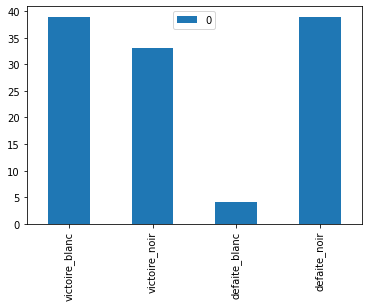

In [85]:
#Les défaites et victoires selon la couleur

taper_votre_joueur = "tieres cristiano"

hist = dict()

id_joueur = list(con.execute("select id from player where name = ?", (taper_votre_joueur,)))[0][0]
print(id_joueur)

hist['victoire_blanc']=0
for row in con.execute("select tournoi from match where white_player = ? and winner =1", (id_joueur,)):
    hist['victoire_blanc']+=1

    
hist['victoire_noir']=0
for row in con.execute("select tournoi from match where black_player = ? and winner =0", (id_joueur,)):
    hist['victoire_noir']+=1

    
hist['defaite_blanc']=0
for row in con.execute("select tournoi from match where white_player = ? and winner =0", (id_joueur,)):
    hist['defaite_blanc']+=1

    
hist['defaite_noir']=0
for row in con.execute("select tournoi from match where white_player = ? and winner =1", (id_joueur,)):
    hist['defaite_noir']+=1

print(hist)
import matplotlib.pyplot as plt
import pandas as pd

df = pd.DataFrame.from_dict(hist, orient='index')
df.plot(kind='bar')

    
#create table player (id integer not NULL primary key autoincrement, name text not NULL); 
#create table tournois (id integer not NULL primary key autoincrement, name text not NULL, date text not NULL, rondes integer, cadence string);
#create table match (id integer primary key autoincrement, tournoi integer, black_player integer, elo_black string, white_player integer, elo_white string, winner integer);"""
#winner : 0 pour les noirs, 3 pour les noirs au temps, 1 pour les blancs, 4 pour les blancs au temps, 2 pour ex aequo

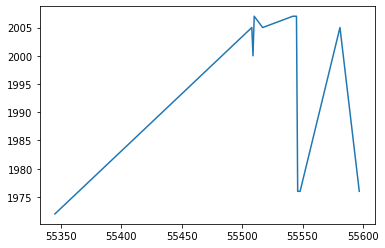

In [86]:
#L'évolution du elo

taper_votre_joueur = "tieres cristiano"

tournoi = []
elo = []

id_joueur = list(con.execute("select id from player where name = ?", (taper_votre_joueur,)))[0][0]

for row in list(con.execute("select tournoi,elo_black from match where black_player =?", (id_joueur,))):
    if not row[0] in tournoi:
        tournoi.append(row[0])
        elo.append(int(row[1][:-1]))
for row in list(con.execute("select tournoi,elo_white from match where white_player =?", (id_joueur,))):
    if not row[0] in tournoi:
        tournoi.append(row[0])
        elo.append(int(row[1][:-1]))

plt.plot(tournoi, elo)

#remarque : il faudrait tracer ça en fonction du temps car sinon ça ne veut rien dire 


3909


<AxesSubplot:>

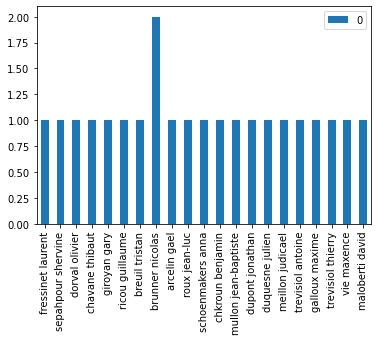

In [91]:
#Top 10 des adversaires rencontrés

taper_votre_joueur = "terekhov andrey"

adversaires = dict()

id_joueur = list(con.execute("select id from player where name = ?", (taper_votre_joueur,)))[0][0]
print(id_joueur)

for row in con.execute("select name from player join match on player.id = match.black_player where match.white_player = ?", (id_joueur, )):
    adversaire = row[0]
    if adversaire not in adversaires.keys():
        adversaires[adversaire]=1
    else :
        adversaires[adversaire]+=1
        
for row in con.execute("select name from player join match on player.id = match.white_player where match.black_player = ?", (id_joueur, )):
    adversaire = row[0]
    if adversaire not in adversaires.keys():
        adversaires[adversaire]=1
    else :
        adversaires[adversaire]+=1
        
df = pd.DataFrame.from_dict(adversaires, orient='index')
df.plot(kind='bar')

20


<AxesSubplot:>

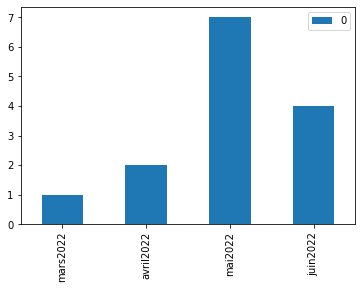

In [93]:
#Nombre de matchs par mois sur une période

taper_votre_joueur = "tieres cristiano"

matchs = dict()

id_joueur = list(con.execute("select id from player where name = ?", (taper_votre_joueur,)))[0][0]
print(id_joueur)

for row in con.execute("select distinct date from tournois join match on tournois.id = match.tournoi where match.white_player = ? or match.black_player =?", (id_joueur, id_joueur,)):
    mois =  date_debut(row[0])[2]
    annee = date_debut(row[0])[3]
    if mois+annee not in matchs.keys():
        matchs[mois+annee]=1
    else :
        matchs[mois+annee]+=1

    

import matplotlib.pyplot as plt
import pandas as pd

df = pd.DataFrame.from_dict(matchs, orient='index')
df.plot(kind='bar')

In [9]:
#Commandes SQL

buffer = ""

print("Enter your SQL command to execute")
print("Enter a blank line to exit")

while True:
    line = input()
    if line =="":
        break
    buffer += line
    if sqlite3.complete_statement(buffer):
        try:
            buffer = buffer.strip()
            con.execute(buffer)
            for row in con.execute(buffer):
                print(row)
            
            if buffer.lstrip().upper().startswitch("SELECT"):
                print(cur.fetchall())
        except sqlite.Error as e :
            print("An error occured:", e.args[0] )
        buffer = ""


Enter your SQL command to execute
Enter a blank line to exit


KeyboardInterrupt: Interrupted by user